In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
import sklearn

import matplotlib
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons


X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.091, min_samples=4)
dbscan.fit(X)  # ~tf: adapt()

DBSCAN(eps=0.091, min_samples=4)

In [3]:
from sklearn.cluster import KMeans


kmeans = KMeans(5, n_init=10)
clusters = kmeans.fit_predict(X)

kmeans.transform(X)  # Distances from cluster centroids

# Total loss of best clusters (cost)
kmeans.inertia_  # returns the best inertia

# Negative Inertia
kmeans.score(X)

-131.0145811709055

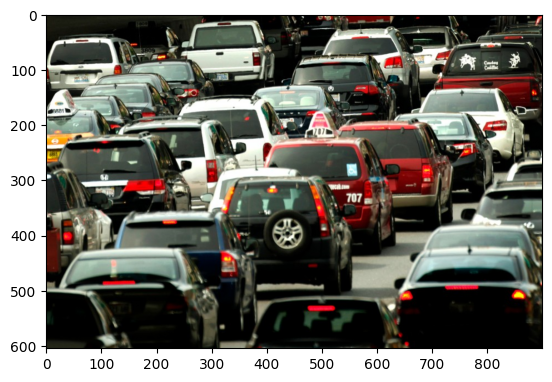

In [45]:
# Image segmentation
from matplotlib.image import imread

image = imread("../Data/cars.jpg")
image = image / 255.0
plt.imshow(image)

In [46]:
image.shape

(605, 900, 3)

In [47]:
image[0, 0, 0]

0.07058823529411765

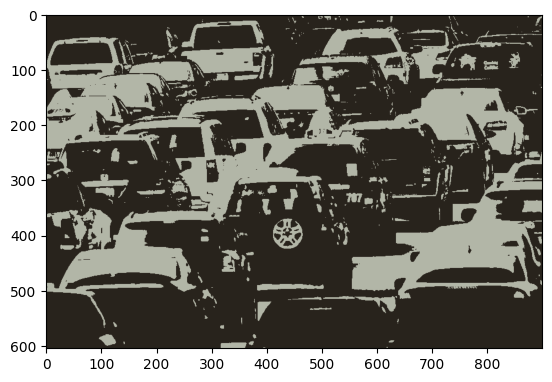

In [50]:
image_segmenter = KMeans(n_clusters=2, n_init=10)
image_segmenter.fit(image.reshape(-1, 3))

# Use cluster centers as colors to visualize
segmented_img = image_segmenter.cluster_centers_[image_segmenter.labels_]  # use labels (cluster #'s) as indices
segmented_img = segmented_img.reshape(image.shape)  # shape to be like original image

plt.imshow(segmented_img)

In [53]:
from sklearn.mixture import GaussianMixture


populations = 3  # clusters
gmm = GaussianMixture(n_components=populations, n_init=10)
gmm.fit(X)  # fit the clusters and create gaussian distributions for each of them

gmm.weights_      # populations weights, calculated by expectation maximization algorithm

# Gaussian Distributions
gmm.means_        # populations means
gmm.covariances_  # populations covariations

# EM
gmm.converged_   # True
gmm.n_iter_      # How many iterations did it take to converge?

# Get the clusters from EM
gmm.predict(X)        # Hard Clustering
gmm.predict_proba(X)  # Soft Clustering (confidences, but the official term is responsibilities)

# Sampling from the GMM
# GMM is a Generative Model!
X_new, y_new = gmm.sample(8)

X_new
# metrics
# EM makes clusters of all shapes and size 

array([[-0.92492962,  0.21270628],
       [ 1.34661181, -0.46838998],
       [ 2.03485989,  0.37994638],
       [-0.12438801,  0.44117969],
       [ 1.02134068,  0.07850698],
       [-0.43906029,  1.24903152],
       [ 0.74518837,  0.20657667],
       [ 0.34222376,  1.34347653]])

In [54]:
from sklearn.mixture import BayesianGaussianMixture


# BayesianGaussianMixture will use Bayesian Search Techniques to find the best number of clusters, weights, means, and variances
populations_guess = 5  # populations = clusters
bgmm = BayesianGaussianMixture(n_components=populations_guess, n_init=10)
bgmm.fit(X)

X_new_bayes, y_new_bayes = bgmm.sample(8)
X_new_bayes

array([[ 1.97130398,  0.05072873],
       [ 0.2672253 ,  1.146897  ],
       [-0.43671785,  0.80183778],
       [-0.36319643,  0.66435805],
       [ 0.52077753,  0.73494555],
       [ 0.9803305 ,  0.46412085],
       [ 0.20978504,  1.06446899],
       [ 1.20376618, -0.44561994]])

In [55]:
X_df = pd.DataFrame(X)
X_df.head(8)

0         1
0  1.532477 -0.336735
1  0.925979  0.580801
2 -0.474483  0.897948
3  0.662888  0.753491
4 -0.537418  0.902887
5  0.204247  1.026046
6  1.704535 -0.231408
7 -0.770592  0.618636

In [173]:
# more imports
import skopt
import seaborn as sns
import xgboost

In [57]:
from sklearn.datasets import fetch_olivetti_faces

dataset = fetch_olivetti_faces()

(X, y) = (dataset["data"], dataset["target"])

print(X.shape)
print(y.shape)

dataset.DESCR

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\night\scikit_learn_data
(400, 4096)
(400,)


'.. _olivetti_faces_dataset:\n\nThe Olivetti faces dataset\n--------------------------\n\n`This dataset contains a set of face images`_ taken between April 1992 and \nApril 1994 at AT&T Laboratories Cambridge. The\n:func:`sklearn.datasets.fetch_olivetti_faces` function is the data\nfetching / caching function that downloads the data\narchive from AT&T.\n\n.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html\n\nAs described on the original website:\n\n    There are ten different images of each of 40 distinct subjects. For some\n    subjects, the images were taken at different times, varying the lighting,\n    facial expressions (open / closed eyes, smiling / not smiling) and facial\n    details (glasses / no glasses). All the images were taken against a dark\n    homogeneous background with the subjects in an upright, frontal position \n    (with tolerance for some side movement).\n\n**Data Set Characteristics:**\n\n    =================   ============

In [62]:
y[:21]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2])

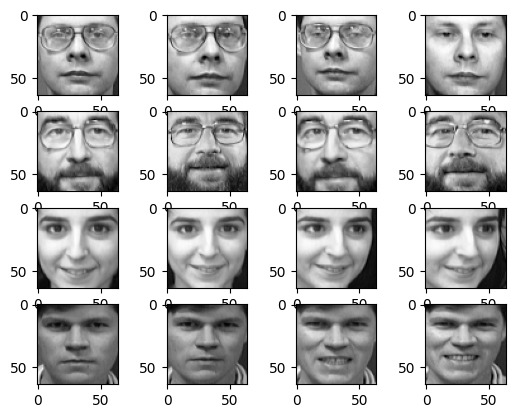

In [72]:
X_img = X.reshape(-1, 64, 64)

# There are 400 examples
EXAMPLES_PER_CLASS = 10
NUM_CLASSES = 40

X_img_per_class = np.array([X_img[(i * EXAMPLES_PER_CLASS):((i + 1) * EXAMPLES_PER_CLASS)] for i in range(NUM_CLASSES)])

def plotclass(label: int, rows: int, cols: int):
    f, axarr = plt.subplots(rows, cols)
    for row in range(rows):
        for col in range(cols):
            sample_index = int(np.random.rand() * EXAMPLES_PER_CLASS)
            axarr[row, col].imshow(X_img_per_class[label][sample_index], cmap="gray")
            
def plotclasses(labels, cols: int):
    f, axarr = plt.subplots(len(labels), cols)
    row = 0
    for label in labels:
        for col in range(cols):
            axarr[row, col].imshow(X_img_per_class[label][col], cmap="gray")
        
        row += 1
    
def plotclassesrandom(num_labels: int, examples_per_label: int):
    labels = [int(np.random.rand() * NUM_CLASSES) for i in range(num_labels)]
    plotclasses(labels, examples_per_label)
    

plotclasses([3, 27, 9, 32], 4)

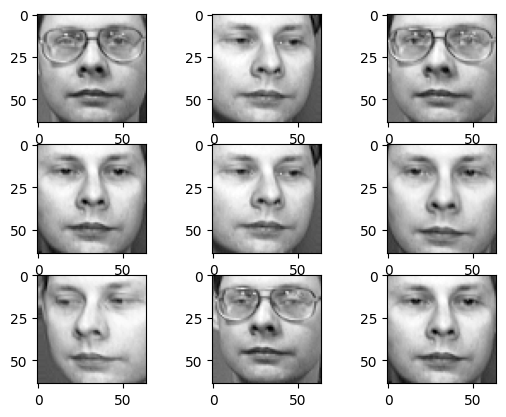

In [73]:
plotclass(3, 3, 3)

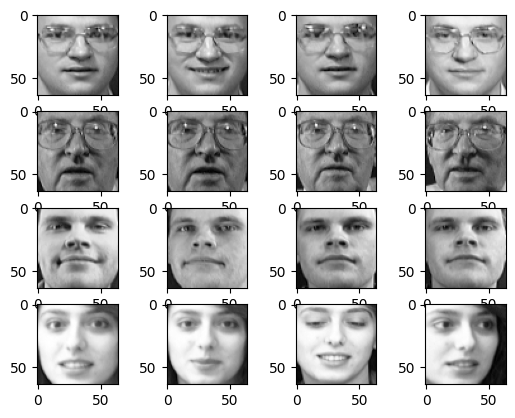

In [75]:
plotclassesrandom(4, 4)

In [91]:
from sklearn.model_selection import train_test_split

# partition into per class
X_per_class = np.array([X[(i * EXAMPLES_PER_CLASS):((i + 1) * EXAMPLES_PER_CLASS)] for i in range(NUM_CLASSES)])
y_per_class = np.array([y[(i * EXAMPLES_PER_CLASS):((i + 1) * EXAMPLES_PER_CLASS)] for i in range(NUM_CLASSES)])

print(X_per_class.shape)
print(y_per_class.shape)

def stratified_train_val_test_split(X_partitioned, y_partitioned, ideal_ratio: float, test_ratio=0.5):
    # shape is (num_classes, examples_per_class, ...data)
    num_classes = X_partitioned.shape[0]
    examples_per_class = X_partitioned.shape[1]
    
    train_set = (None, None)
    val_set = (None, None)
    test_set = (None, None)
    
    def accumulate(pair: tuple, target: tuple):
        (Xp, yp) = pair
        (Xt, yt) = target
        
        if Xt is None:
            Xt = Xp
        else:
            Xt = np.append(Xt, Xp, axis=0)
        
        if yt is None:
            yt = yp
        else:
            yt = np.append(yt, yp, axis=0)
        
        return (Xt, yt)
    
    for label in range(num_classes):
        (X_part, y_part) = (X_partitioned[label], y_partitioned[label])
        
        (X_part_train, X_part_ideal, y_part_train, y_part_ideal) = train_test_split(X_part, y_part, test_size=ideal_ratio)
        (X_part_val, X_part_test, y_part_val, y_part_test) = train_test_split(X_part_ideal, y_part_ideal, test_size=test_ratio)
        
        train_set = accumulate((X_part_train, y_part_train), train_set)
        val_set = accumulate((X_part_val, y_part_val), val_set)
        test_set = accumulate((X_part_test, y_part_test), test_set)
    
    return train_set, val_set, test_set

(X_train, y_train), (X_val, y_val), (X_test, y_test) = stratified_train_val_test_split(X_per_class, y_per_class, ideal_ratio=0.3)

(40, 10, 4096)
(40, 10)


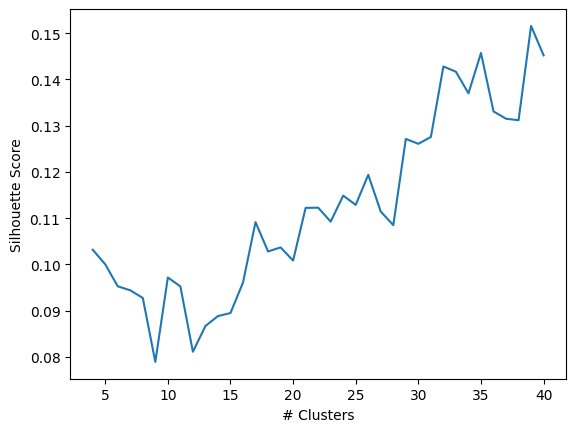

KMeans(n_clusters=39)

In [137]:
from sklearn.metrics import silhouette_score

def best_kmeans(X, rng: tuple, step=1, n_init=10):  # rng is inclusive
    (start, end) = rng
    clusters_inputs = range(start, end+1, step)
    
    best_kmeans = KMeans(n_clusters=clusters_inputs[0], n_init=n_init)
    best_kmeans.fit(X)
    best_score = silhouette_score(X, best_kmeans.labels_)
    
    scores = [best_score]
    
    for clusters in clusters_inputs[1:]:
        kmeans = KMeans(n_clusters=clusters, n_init=n_init)
        kmeans.fit(X)
        score = silhouette_score(X, kmeans.labels_)
        if score > best_score:
            best_score = score
            best_kmeans = kmeans
        
        scores.append(score)
    
    return best_kmeans, (clusters_inputs, scores)
        

kmeans_faces, (clusters_inputs, scores) = best_kmeans(X_train, (4, 40))

plt.plot(clusters_inputs, scores)
plt.xlabel("# Clusters")
plt.ylabel("Silhouette Score")
plt.show()

kmeans_faces

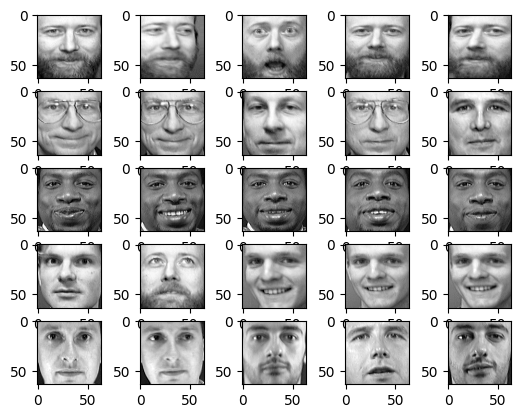

In [445]:
from sklearn.pipeline import Pipeline

IMG_PX = 64

def plotrandom(rows: int, cols: int, X_1D):
    (m, n) = X_1D.shape
    
    X_2D = X_1D.reshape(m, IMG_PX, IMG_PX)
    
    f, axarr = plt.subplots(rows, cols)
    for row in range(rows):
        for col in range(cols):
            sample_index = int(np.random.rand() * m)
            axarr[row, col].imshow(X_2D[sample_index], cmap="gray")

def sortby_discrete_transformation(X_, transformer, partition=False):  # transformer must already be fitted
    X_df = pd.DataFrame(X_)
    X_df["TransformOutput"] = transformer.predict(X_)
    
    X_sorted = X_df.sort_values(by="TransformOutput")
    
    if partition:
        num_categories = X_df["TransformOutput"].nunique()
        
        X_sorted_partitioned = []
        
        for category in range(num_categories):
            X_category = X_sorted[X_sorted["TransformOutput"] == category]
            X_category_data = X_category.drop(columns=["TransformOutput"]).to_numpy()  # shape: (m_per_partition, ...data)
            #print(X_category_data.shape)
            X_sorted_partitioned.append(X_category_data)
            
        return X_sorted_partitioned  # not a NumPy array
    else:
        X_sorted = X_sorted.drop(columns=["TransformOutput"]).to_numpy()
        return X_sorted
            
def plotclusters(X_1D, clusterer, clusters: int, cols: int):
    X_1D_partitioned = sortby_discrete_transformation(X_1D, clusterer, partition=True)
    
    f, axarr = plt.subplots(len(clusters), cols)
    row = 0
    for cluster in clusters:
        X_2D = X_1D_partitioned[cluster].reshape(-1, IMG_PX, IMG_PX)
        #print(X_2D.shape)
        for col in range(cols):
            axarr[row, col].imshow(X_2D[col], cmap="gray")
        
        row += 1

plotclusters(X_train, kmeans_faces, range(5), 5)

In [174]:
X_train.shape

(280, 4096)

In [209]:
X_val.shape

(40, 4096)

In [165]:
# Learning Rate Scheduler
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        keras.backend.set_value(self.model.optimizer.learning_rate, rate)

Epoch 1/100
2/2 [==============================] - 1s 344ms/step - loss: 4.1995 - sparse_categorical_accuracy: 0.0250 - val_loss: 169.5238 - val_sparse_categorical_accuracy: 0.0250
Epoch 2/100
2/2 [==============================] - 0s 165ms/step - loss: 3.3969 - sparse_categorical_accuracy: 0.1071 - val_loss: 85.6287 - val_sparse_categorical_accuracy: 0.0250
Epoch 3/100
2/2 [==============================] - 0s 174ms/step - loss: 3.1079 - sparse_categorical_accuracy: 0.1714 - val_loss: 53.8512 - val_sparse_categorical_accuracy: 0.0250
Epoch 4/100
2/2 [==============================] - 0s 166ms/step - loss: 2.7149 - sparse_categorical_accuracy: 0.2643 - val_loss: 42.3762 - val_sparse_categorical_accuracy: 0.0250
Epoch 5/100
2/2 [==============================] - 0s 165ms/step - loss: 2.6246 - sparse_categorical_accuracy: 0.2679 - val_loss: 35.3021 - val_sparse_categorical_accuracy: 0.0250
Epoch 6/100
2/2 [==============================] - 0s 160ms/step - loss: 2.3246 - sparse_categorica

2/2 [==============================] - 1s 164ms/step - loss: 0.0487 - sparse_categorical_accuracy: 0.9964 - val_loss: 7.3218 - val_sparse_categorical_accuracy: 0.0500
Epoch 47/100
2/2 [==============================] - 0s 167ms/step - loss: 0.0485 - sparse_categorical_accuracy: 1.0000 - val_loss: 7.1584 - val_sparse_categorical_accuracy: 0.0500
Epoch 48/100
2/2 [==============================] - 0s 166ms/step - loss: 0.0367 - sparse_categorical_accuracy: 1.0000 - val_loss: 7.0040 - val_sparse_categorical_accuracy: 0.0500
Epoch 49/100
2/2 [==============================] - 0s 170ms/step - loss: 0.0371 - sparse_categorical_accuracy: 1.0000 - val_loss: 6.8646 - val_sparse_categorical_accuracy: 0.0500
Epoch 50/100
2/2 [==============================] - 0s 162ms/step - loss: 0.0321 - sparse_categorical_accuracy: 1.0000 - val_loss: 6.7439 - val_sparse_categorical_accuracy: 0.0500
Epoch 51/100
2/2 [==============================] - 1s 213ms/step - loss: 0.0459 - sparse_categorical_accuracy: 0

2/2 [==============================] - 0s 160ms/step - loss: 0.0164 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.6459 - val_sparse_categorical_accuracy: 0.6500
Epoch 92/100
2/2 [==============================] - 0s 165ms/step - loss: 0.0278 - sparse_categorical_accuracy: 0.9964 - val_loss: 1.5608 - val_sparse_categorical_accuracy: 0.6500
Epoch 93/100
2/2 [==============================] - 0s 167ms/step - loss: 0.0307 - sparse_categorical_accuracy: 0.9857 - val_loss: 1.5107 - val_sparse_categorical_accuracy: 0.6500
Epoch 94/100
2/2 [==============================] - 0s 179ms/step - loss: 0.0219 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.4717 - val_sparse_categorical_accuracy: 0.6750
Epoch 95/100
2/2 [==============================] - 1s 173ms/step - loss: 0.0243 - sparse_categorical_accuracy: 0.9964 - val_loss: 1.4236 - val_sparse_categorical_accuracy: 0.6750
Epoch 96/100
2/2 [==============================] - 0s 174ms/step - loss: 0.0245 - sparse_categorical_accuracy: 0

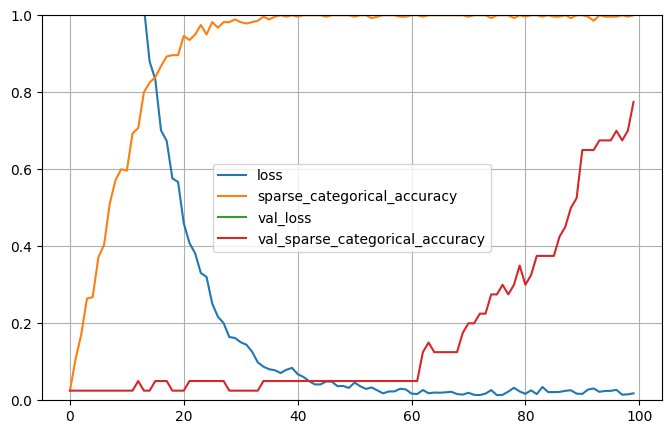

In [168]:
# wow! there are similar faces in these clusters!
# now, let's train a model
import math
from tensorflow import keras
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Reshape, Conv2D, SeparableConv2D, Activation, BatchNormalization, AlphaDropout
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.metrics import SparseCategoricalAccuracy

def noisify_activation(x, amp=0.125, freq=math.e):
    return x + (amp * tf.math.sin(tf.math.exp(freq) * x))

model = Sequential([
    Input(shape=(IMG_PX*IMG_PX,)),
    
    BatchNormalization(),
    
    Dense(IMG_PX*IMG_PX, kernel_initializer="he_uniform", use_bias=False, activation="linear"),  # encoding
    BatchNormalization(),
    
    Reshape((IMG_PX, IMG_PX, 1)),
    
    SeparableConv2D(filters=8, kernel_size=(2, 2), strides=(1, 1), depthwise_initializer="he_normal", use_bias=False),
    BatchNormalization(),
    Activation("relu"),
    
    SeparableConv2D(filters=16, kernel_size=(2, 2), strides=(1, 1), depthwise_initializer="he_normal", use_bias=False),
    BatchNormalization(),
    Activation("tanh"),
    
    Flatten(),
    
    Dense(IMG_PX, kernel_initializer="he_uniform"),
    BatchNormalization(),
    AlphaDropout(0.25),
    Activation(noisify_activation),
    
    Dense(NUM_CLASSES, activation="linear")
])

model.compile(loss=SparseCategoricalCrossentropy(from_logits=True), 
              optimizer=Adam(learning_rate=0.01), 
              metrics=[SparseCategoricalAccuracy()])

m = len(y_train)
n_epoch = 100
minibatch_size = 256

iterations_per_epoch = 1 + (m // minibatch_size)
n_iter = iterations_per_epoch * n_epoch

model_history = model.fit(X_train, y_train, batch_size=minibatch_size, epochs=n_epoch, 
                          validation_data=(X_val, y_val), 
                          callbacks=[EarlyStopping(patience=10, restore_best_weights=True)])

# Plot history
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Epoch 1/100
2/2 [==============================] - 1s 214ms/step - loss: 0.0253 - sparse_categorical_accuracy: 0.9964 - val_loss: 1.0957 - val_sparse_categorical_accuracy: 0.7750
Epoch 2/100
2/2 [==============================] - 0s 162ms/step - loss: 0.0175 - sparse_categorical_accuracy: 0.9964 - val_loss: 1.0622 - val_sparse_categorical_accuracy: 0.7750
Epoch 3/100
2/2 [==============================] - 0s 167ms/step - loss: 0.0191 - sparse_categorical_accuracy: 0.9964 - val_loss: 1.0206 - val_sparse_categorical_accuracy: 0.8000
Epoch 4/100
2/2 [==============================] - 0s 157ms/step - loss: 0.0202 - sparse_categorical_accuracy: 0.9964 - val_loss: 0.9603 - val_sparse_categorical_accuracy: 0.8000
Epoch 5/100
2/2 [==============================] - 0s 169ms/step - loss: 0.0128 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.8984 - val_sparse_categorical_accuracy: 0.8000
Epoch 6/100
2/2 [==============================] - 0s 166ms/step - loss: 0.0151 - sparse_categorical_accu

2/2 [==============================] - 0s 149ms/step - loss: 0.0254 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.5998 - val_sparse_categorical_accuracy: 0.8750


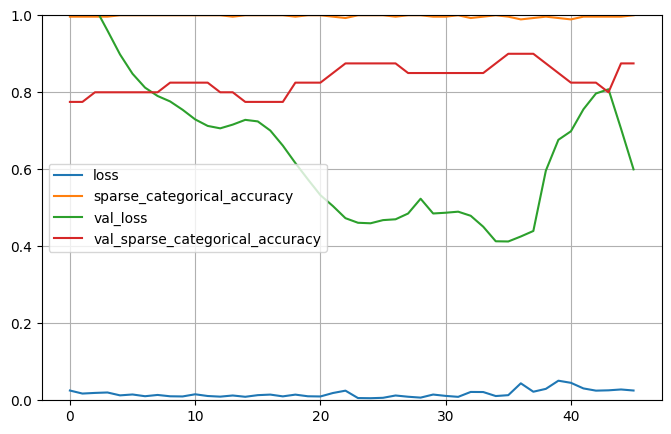

In [169]:
# fit more
model_history = model.fit(X_train, y_train, batch_size=minibatch_size, epochs=n_epoch, 
                          validation_data=(X_val, y_val), 
                          callbacks=[EarlyStopping(patience=10, restore_best_weights=True)])

# Plot history
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [486]:
# Look at generalization error
from keras.metrics import sparse_categorical_crossentropy

print(tf.reduce_mean(sparse_categorical_crossentropy(y_test, model.predict(X_test), from_logits=True)))
print(tf.reduce_mean(sparse_categorical_crossentropy(y_test, model(X_test))))
tf.reduce_mean(sparse_categorical_accuracy(y_test, tf.nn.softmax(model.predict(X_test))))

3/3 [==============================] - 0s 13ms/step
tf.Tensor(0.2784608, shape=(), dtype=float32)
tf.Tensor(2.7637846, shape=(), dtype=float32)
3/3 [==============================] - 0s 13ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=0.925>

2/2 [==============================] - 0s 9ms/step
Loss 0: 5.842477321624756
Loss 1: 3.3425941467285156
Loss 2: 2.9977223873138428
Loss 3: 1.2563518285751343
Loss 4: 0.6936206817626953
Loss 5: 0.5884339809417725


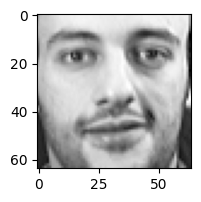

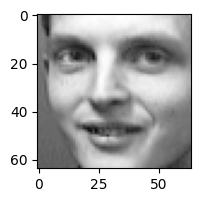

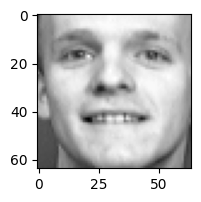

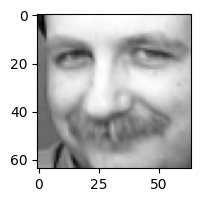

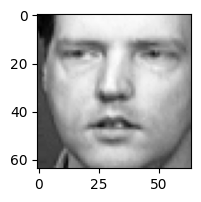

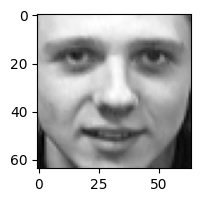

array([[0.59090906, 0.7066116 , 0.7355372 , ..., 0.45454547, 0.23966943,
        0.1983471 ],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752],
       [0.3264463 , 0.46280992, 0.553719  , ..., 0.3305785 , 0.35950413,
        0.36363637],
       [0.19008264, 0.19421488, 0.11157025, ..., 0.38016528, 0.338843  ,
        0.33471075],
       [0.12396694, 0.10330579, 0.11570248, ..., 0.45867768, 0.45041323,
        0.44214877],
       [0.61157024, 0.661157  , 0.6859504 , ..., 0.06198347, 0.06198347,
        0.09090909]], dtype=float32)

In [272]:
from keras.activations import softmax

# Error Analysis
# Order by most wrong
def show_worst(model, X, y, num_to_show=25, from_logits=True):
    logits = model.predict(X)
    
    X_df = pd.DataFrame(X)
    
    losses = sparse_categorical_crossentropy(y, logits, from_logits=from_logits)
    X_df["Loss"] = losses
    X_df_sorted = X_df.sort_values(by="Loss", ascending=False)
    
    sorted_losses = X_df_sorted["Loss"].to_numpy()
    X_sorted = X_df_sorted.drop(columns=["Loss"]).to_numpy()
    X_sorted_2D = X_sorted.reshape(-1, IMG_PX, IMG_PX)
    
    for i in range(num_to_show):
        X_image_i = X_sorted_2D[i]
        sorted_loss_i = sorted_losses[i]
        
        print(f"Loss {i}: {sorted_loss_i}")
        
        plt.figure(figsize=(2, 2))
        plt.imshow(X_image_i, cmap="gray")
    
    plt.show()
    return X_sorted_2D.reshape(-1, IMG_PX*IMG_PX)[0:num_to_show]
    
show_worst(model, X_val, y_val, 6)

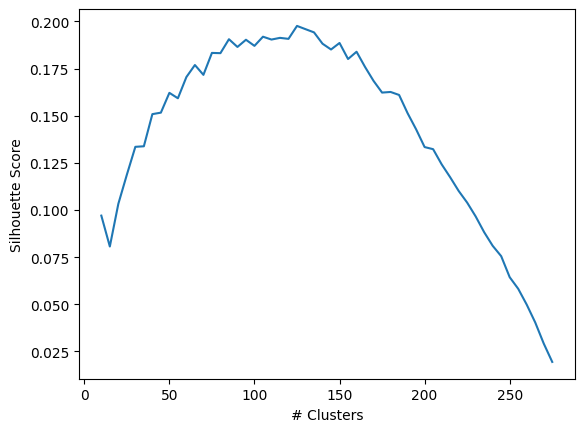

KMeans(n_clusters=125)

In [157]:
kmeans_dr, (clusters_inputs, scores) = best_kmeans(X_train, (10, 275), step=5)

plt.plot(clusters_inputs, scores)
plt.xlabel("# Clusters")
plt.ylabel("Silhouette Score")
plt.show()

kmeans_dr

In [208]:
y_train_oh = tf.one_hot(y_train, NUM_CLASSES).numpy()
y_val_oh = tf.one_hot(y_val, NUM_CLASSES).numpy()
y_test_oh = tf.one_hot(y_test, NUM_CLASSES).numpy()

print(y_train_oh.shape)

(280, 40)


In [307]:
import copy
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from keras.layers import PReLU
from keras.losses import CategoricalCrossentropy
from keras.models import clone_model

print(X_train.shape)
print(y_train.shape)

print(X_val.shape)
print(y_val.shape)

class AutoencoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, encoding_dim):
        self.encoding_dim = encoding_dim
        self.encoder = None
        self.autoencoder = None
    
    def fit(self, X, y=None, epochs=50): # X is assumed to be of shape (m, n)
        (m, input_length) = X.shape
        
        input_layer = Input(shape=(input_length,))
        
        # Encoder
        encoded = Dense(input_length, kernel_initializer="he_uniform")(input_layer)
        encoded = PReLU()(encoded)
        
        # Bottleneck
        encoded = Dense(self.encoding_dim, kernel_initializer="he_uniform")(encoded)
        encoded = PReLU()(encoded)
        
        # Decoder
        decoded = Dense(input_length, kernel_initializer="he_uniform")(encoded)
        decoded = PReLU()(decoded)
        
        decoded = Dense(input_length, activation="linear")(decoded)
        
        self.autoencoder = keras.Model(inputs=input_layer, outputs=decoded)
        self.autoencoder.compile(optimizer=Adam(learning_rate=0.01), loss=CategoricalCrossentropy(from_logits=True))
        
        # Batch Gradient Descent
        self.autoencoder.fit(X, X, batch_size=m, epochs=epochs)
        
        # Now, get the bottlenecked
        self.encoder = keras.Model(inputs=input_layer, outputs=encoded)
        
        return self
    
    def transform(self, X):
        return self.encoder.predict(X)
    
    def __deepcopy__(self, memo):
        instance_new = AutoencoderTransformer(encoding_dim=self.encoding_dim)
        instance_new.encoder = clone_model(self.encoder)
        instance_new.autoencoder = clone_model(self.autoencoder)
    
class OneHotClusterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters, n_init=10):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.kmeans = None
    
    def fit(self, X, y=None):
        self.kmeans = KMeans(n_clusters=self.n_clusters, n_init=self.n_init)
        self.kmeans.fit(X)
        return self
    
    def transform(self, X):
        clusters = self.kmeans.predict(X) # at this point, shape should be of (m,)
        onehot_clusters = tf.one_hot(clusters, self.kmeans.n_clusters).numpy()
        
        return onehot_clusters

AUTOENCODER_ENCODING_DIM = 16
cluster_encoding_preprocessor = Pipeline([
    ("clusterer_dr_and_encoder", OneHotClusterTransformer(n_clusters=kmeans_dr.n_clusters)),
    ("autoencoder", AutoencoderTransformer(encoding_dim=AUTOENCODER_ENCODING_DIM)),
])

(280, 4096)
(280,)
(40, 4096)
(40,)


In [308]:
# Testing cell

X_train_transformed = cluster_encoding_preprocessor.fit_transform(X_train)
X_val_transformed = cluster_encoding_preprocessor.transform(X_val)

Epoch 1/50
1/1 [==============================] - 0s 303ms/step - loss: 4.8353
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 4.7259
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 4.5829
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 4.3906
Epoch 5/50
1/1 [==============================] - 0s 4ms/step - loss: 4.1532
Epoch 6/50
1/1 [==============================] - 0s 4ms/step - loss: 3.8708
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 3.5386
Epoch 8/50
1/1 [==============================] - 0s 4ms/step - loss: 3.1484
Epoch 9/50
1/1 [==============================] - 0s 4ms/step - loss: 2.7067
Epoch 10/50
1/1 [==============================] - 0s 4ms/step - loss: 2.2368
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 1.7703
Epoch 12/50
1/1 [==============================] - 0s 4ms/step - loss: 1.3374
Epoch 13/50
1/1 [==============================] - 0s 4ms/step - loss: 

In [309]:
print("TRAIN")
print(X_train_transformed.shape)

print("VALIDATION")
print(X_val_transformed.shape)

X_val_transformed

TRAIN
(280, 16)
VALIDATION
(40, 16)


array([[ 3.53767753e+00,  2.08726668e+00, -7.76705891e-03,
         2.72385502e+00,  1.86360908e+00, -1.61990029e-04,
         1.11128044e+00,  1.10012853e+00,  4.86730528e+00,
        -3.43361013e-02,  7.66059816e-01,  8.77119660e-01,
         1.74383020e+00,  4.23988390e+00,  1.76463890e+00,
         3.71953702e+00],
       [ 2.24601030e+00,  5.00540197e-01,  1.40844750e+00,
         2.12509584e+00,  2.56384516e+00,  3.38159251e+00,
         9.78887141e-01,  2.07012820e+00, -3.26381028e-02,
         4.68610227e-01, -6.27185497e-03,  1.76324570e+00,
         1.03627443e+00,  1.55710483e+00,  4.76309633e+00,
         2.51405978e+00],
       [-4.99689169e-02,  1.34141159e+00,  1.63567632e-01,
         2.31252003e+00, -1.89412702e-02,  3.76700139e+00,
         4.85017240e-01,  3.68274078e-02,  2.03951550e+00,
        -1.74679887e-03, -3.68459783e-02,  3.11231613e+00,
         7.74158359e-01,  1.90071559e+00, -5.06955422e-02,
         3.80765796e+00],
       [ 1.84746051e+00, -4.92366143e

In [310]:
from xgboost import XGBClassifier

xgb = Pipeline([
    ("preprocessor", cluster_encoding_preprocessor),
    ("xgbmodel", XGBClassifier(n_estimators=128, learning_rate=0.1, early_stopping_rounds=10))
])


xgb.fit(X_train, y_train_oh, xgbmodel__eval_set=[(X_val_transformed, y_val_oh)])

Epoch 1/50
1/1 [==============================] - 0s 287ms/step - loss: 4.8242
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 4.7202
Epoch 3/50
1/1 [==============================] - 0s 4ms/step - loss: 4.5803
Epoch 4/50
1/1 [==============================] - 0s 4ms/step - loss: 4.3912
Epoch 5/50
1/1 [==============================] - 0s 4ms/step - loss: 4.1721
Epoch 6/50
1/1 [==============================] - 0s 4ms/step - loss: 3.9187
Epoch 7/50
1/1 [==============================] - 0s 5ms/step - loss: 3.6112
Epoch 8/50
1/1 [==============================] - 0s 4ms/step - loss: 3.2466
Epoch 9/50
1/1 [==============================] - 0s 4ms/step - loss: 2.8343
Epoch 10/50
1/1 [==============================] - 0s 4ms/step - loss: 2.3880
Epoch 11/50
1/1 [==============================] - 0s 4ms/step - loss: 1.9289
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 1.4835
Epoch 13/50
1/1 [==============================] - 0s 3ms/step - loss: 

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('clusterer_dr_and_encoder',
                                  OneHotClusterTransformer(n_clusters=125)),
                                 ('autoencoder',
                                  AutoencoderTransformer(encoding_dim=16))])),
                ('xgbmodel',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=10,
                               enable_categorica...,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.1, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=128, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
                               reg_lambda=1, ...))])

In [324]:
from skopt import BayesSearchCV

m = X_train.shape[0]

xgb_tune = BayesSearchCV(
    xgb,
    search_spaces=[
        {
            "preprocessor__clusterer_dr_and_encoder__n_clusters": [25, 50, 60, 75],
            "preprocessor__autoencoder__encoding_dim": [AUTOENCODER_ENCODING_DIM],
            "xgbmodel__n_estimators": [64, 128],
            "xgbmodel__learning_rate": [0.01, 0.1],
            #"xgbmodel__early_stopping_rounds": [10]
        }
    ],
    fit_params={
        "xgbmodel__eval_set": (X_val_transformed, y_val_oh)
    },
    scoring="neg_log_loss"
)

xgb_tune.fit(X_train, y_train_oh, xgbmodel__eval_set=[(X_val_transformed, y_val_oh)])

best_xgb_clf = xgb_tune.best_estimator_

Epoch 1/50
1/1 [==============================] - 0s 319ms/step - loss: 4.3514
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 4.2399
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 4.1412
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 4.0247
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 3.8794
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 3.7065
Epoch 7/50
1/1 [==============================] - 0s 4ms/step - loss: 3.5053
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 3.2765
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0172
Epoch 10/50
1/1 [==============================] - 0s 4ms/step - loss: 2.7273
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.4100
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 2.0744
Epoch 13/50
1/1 [==============================] - 0s 4ms/step - loss: 

1/1 [==============================] - 0s 3ms/step - loss: 0.0270
Epoch 28/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0155
Epoch 29/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0094
Epoch 30/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0074
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 32/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 33/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 34/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 35/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 36/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 37/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 38/50
1/1 [==============================] - 0s 3ms/step - loss: 8.3001e-04
Epoch 39/50
1/1 [==============================] - 0s 3ms/step - loss: 6

[4]	validation_0-logloss:0.46503
[5]	validation_0-logloss:0.43485
[6]	validation_0-logloss:0.40912
[7]	validation_0-logloss:0.38462
[8]	validation_0-logloss:0.36348
[9]	validation_0-logloss:0.34479
[10]	validation_0-logloss:0.32774
[11]	validation_0-logloss:0.31222
[12]	validation_0-logloss:0.29817
[13]	validation_0-logloss:0.28551
[14]	validation_0-logloss:0.27473
[15]	validation_0-logloss:0.26420
[16]	validation_0-logloss:0.25528
[17]	validation_0-logloss:0.24681
[18]	validation_0-logloss:0.23969
[19]	validation_0-logloss:0.23264
[20]	validation_0-logloss:0.22635
[21]	validation_0-logloss:0.22079
[22]	validation_0-logloss:0.21576
[23]	validation_0-logloss:0.21095
[24]	validation_0-logloss:0.20653
[25]	validation_0-logloss:0.20273
[26]	validation_0-logloss:0.19861
[27]	validation_0-logloss:0.19521
[28]	validation_0-logloss:0.19136
[29]	validation_0-logloss:0.18826
[30]	validation_0-logloss:0.18492
[31]	validation_0-logloss:0.18242
[32]	validation_0-logloss:0.17960
[33]	validation_0-lo

[52]	validation_0-logloss:0.13316
[53]	validation_0-logloss:0.13311
[54]	validation_0-logloss:0.13307
[55]	validation_0-logloss:0.13322
[56]	validation_0-logloss:0.13339
[57]	validation_0-logloss:0.13347
[58]	validation_0-logloss:0.13345
[59]	validation_0-logloss:0.13368
[60]	validation_0-logloss:0.13376
[61]	validation_0-logloss:0.13397
[62]	validation_0-logloss:0.13401
[63]	validation_0-logloss:0.13430
[64]	validation_0-logloss:0.13468
2/2 [==============================] - 0s 1ms/step
Epoch 1/50
1/1 [==============================] - 0s 297ms/step - loss: 4.3322
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 4.2427
Epoch 3/50
1/1 [==============================] - 0s 4ms/step - loss: 4.1594
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 4.0553
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 3.9237
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 3.7669
Epoch 7/50
1/1 [===========================

1/1 [==============================] - 0s 3ms/step - loss: 0.1242
Epoch 23/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0903
Epoch 24/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0642
Epoch 25/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0470
Epoch 26/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0362
Epoch 27/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0275
Epoch 28/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0199
Epoch 29/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0137
Epoch 30/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0090
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0057
Epoch 32/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 33/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 34/50
1/1 [==============================] - 0s 3ms/step - loss: 0.001

1/1 [==============================] - 0s 2ms/step - loss: 3.0542e-04
Epoch 46/50
1/1 [==============================] - 0s 3ms/step - loss: 2.6230e-04
Epoch 47/50
1/1 [==============================] - 0s 2ms/step - loss: 2.2909e-04
Epoch 48/50
1/1 [==============================] - 0s 3ms/step - loss: 2.0277e-04
Epoch 49/50
1/1 [==============================] - 0s 3ms/step - loss: 1.8147e-04
Epoch 50/50
7/7 [==============================] - 0s 667us/step
[0]	validation_0-logloss:0.63686
[1]	validation_0-logloss:0.58785
[2]	validation_0-logloss:0.54474
[3]	validation_0-logloss:0.50760
[4]	validation_0-logloss:0.47459
[5]	validation_0-logloss:0.44542
[6]	validation_0-logloss:0.41932
[7]	validation_0-logloss:0.39675
[8]	validation_0-logloss:0.37598
[9]	validation_0-logloss:0.35674
[10]	validation_0-logloss:0.33932
[11]	validation_0-logloss:0.32348
[12]	validation_0-logloss:0.30861
[13]	validation_0-logloss:0.29610
[14]	validation_0-logloss:0.28409
[15]	validation_0-logloss:0.27320
[16

[29]	validation_0-logloss:0.19685
[30]	validation_0-logloss:0.19373
[31]	validation_0-logloss:0.19071
[32]	validation_0-logloss:0.18732
[33]	validation_0-logloss:0.18494
[34]	validation_0-logloss:0.18224
[35]	validation_0-logloss:0.17966
[36]	validation_0-logloss:0.17759
[37]	validation_0-logloss:0.17519
[38]	validation_0-logloss:0.17273
[39]	validation_0-logloss:0.17072
[40]	validation_0-logloss:0.16858
[41]	validation_0-logloss:0.16688
[42]	validation_0-logloss:0.16503
[43]	validation_0-logloss:0.16372
[44]	validation_0-logloss:0.16253
[45]	validation_0-logloss:0.16124
[46]	validation_0-logloss:0.16006
[47]	validation_0-logloss:0.15887
[48]	validation_0-logloss:0.15769
[49]	validation_0-logloss:0.15711
[50]	validation_0-logloss:0.15614
[51]	validation_0-logloss:0.15542
[52]	validation_0-logloss:0.15452
[53]	validation_0-logloss:0.15420
[54]	validation_0-logloss:0.15345
[55]	validation_0-logloss:0.15290
[56]	validation_0-logloss:0.15247
[57]	validation_0-logloss:0.15190
[58]	validatio

2/2 [==============================] - 0s 3ms/step
Epoch 1/50
1/1 [==============================] - 0s 309ms/step - loss: 4.1342
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 4.0327
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 3.9494
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 3.8601
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 3.7493
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 3.6178
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 3.4590
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 3.2757
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0682
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 2.8385
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.5868
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 2.3146
Epoch 13/50
1/1 [===

1/1 [==============================] - 0s 3ms/step - loss: 0.1971
Epoch 22/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1336
Epoch 23/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0894
Epoch 24/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0582
Epoch 25/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0363
Epoch 26/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0234
Epoch 27/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 28/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 29/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0096
Epoch 30/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 32/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 33/50
1/1 [==============================] - 0s 3ms/step - loss: 0.001

1/1 [==============================] - 0s 3ms/step - loss: 1.7080e-04
Epoch 49/50
1/1 [==============================] - 0s 2ms/step - loss: 1.5795e-04
Epoch 50/50
7/7 [==============================] - 0s 833us/step
[0]	validation_0-logloss:0.61911
[1]	validation_0-logloss:0.55907
[2]	validation_0-logloss:0.50833
[3]	validation_0-logloss:0.46732
[4]	validation_0-logloss:0.43392
[5]	validation_0-logloss:0.40471
[6]	validation_0-logloss:0.38030
[7]	validation_0-logloss:0.35811
[8]	validation_0-logloss:0.33816
[9]	validation_0-logloss:0.32194
[10]	validation_0-logloss:0.30633
[11]	validation_0-logloss:0.29288
[12]	validation_0-logloss:0.28143
[13]	validation_0-logloss:0.27094
[14]	validation_0-logloss:0.26173
[15]	validation_0-logloss:0.25392
[16]	validation_0-logloss:0.24625
[17]	validation_0-logloss:0.23802
[18]	validation_0-logloss:0.23054
[19]	validation_0-logloss:0.22393
[20]	validation_0-logloss:0.21740
[21]	validation_0-logloss:0.21163
[22]	validation_0-logloss:0.20831
[23]	valida

[53]	validation_0-logloss:0.13475
2/2 [==============================] - 0s 2ms/step
Epoch 1/50
1/1 [==============================] - 0s 290ms/step - loss: 4.0925
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 3.9902
Epoch 3/50
1/1 [==============================] - 0s 4ms/step - loss: 3.8870
Epoch 4/50
1/1 [==============================] - 0s 2ms/step - loss: 3.7660
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 3.6209
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 3.4540
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 3.2628
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 3.0541
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 2.8300
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 2.5890
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.3306
Epoch 12/50
1/1 [==============================] - 0s 3ms/step -

1/1 [==============================] - 0s 3ms/step - loss: 0.0208
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0159
Epoch 32/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 33/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 34/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 35/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 36/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 37/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 38/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 39/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 40/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 41/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 42/50
1/1 [==============================] - 0s 4ms/step - loss: 0.001

[19]	validation_0-logloss:0.41253
[20]	validation_0-logloss:0.40380
[21]	validation_0-logloss:0.39577
[22]	validation_0-logloss:0.38757
[23]	validation_0-logloss:0.38006
[24]	validation_0-logloss:0.37248
[25]	validation_0-logloss:0.36549
[26]	validation_0-logloss:0.35863
[27]	validation_0-logloss:0.35223
[28]	validation_0-logloss:0.34606
[29]	validation_0-logloss:0.34003
[30]	validation_0-logloss:0.33414
[31]	validation_0-logloss:0.32874
[32]	validation_0-logloss:0.32317
[33]	validation_0-logloss:0.31771
[34]	validation_0-logloss:0.31241
[35]	validation_0-logloss:0.30744
[36]	validation_0-logloss:0.30243
[37]	validation_0-logloss:0.29762
[38]	validation_0-logloss:0.29294
[39]	validation_0-logloss:0.28818
[40]	validation_0-logloss:0.28377
[41]	validation_0-logloss:0.27976
[42]	validation_0-logloss:0.27549
[43]	validation_0-logloss:0.27161
[44]	validation_0-logloss:0.26770
[45]	validation_0-logloss:0.26384
[46]	validation_0-logloss:0.26037
[47]	validation_0-logloss:0.25672
[48]	validatio

[43]	validation_0-logloss:0.25382
[44]	validation_0-logloss:0.25002
[45]	validation_0-logloss:0.24642
[46]	validation_0-logloss:0.24296
[47]	validation_0-logloss:0.23939
[48]	validation_0-logloss:0.23623
[49]	validation_0-logloss:0.23310
[50]	validation_0-logloss:0.22991
[51]	validation_0-logloss:0.22695
[52]	validation_0-logloss:0.22419
[53]	validation_0-logloss:0.22143
[54]	validation_0-logloss:0.21863
[55]	validation_0-logloss:0.21594
[56]	validation_0-logloss:0.21337
[57]	validation_0-logloss:0.21083
[58]	validation_0-logloss:0.20840
[59]	validation_0-logloss:0.20621
[60]	validation_0-logloss:0.20409
[61]	validation_0-logloss:0.20183
[62]	validation_0-logloss:0.19970
[63]	validation_0-logloss:0.19764
[64]	validation_0-logloss:0.19562
[65]	validation_0-logloss:0.19349
[66]	validation_0-logloss:0.19173
[67]	validation_0-logloss:0.18984
[68]	validation_0-logloss:0.18804
[69]	validation_0-logloss:0.18634
[70]	validation_0-logloss:0.18459
[71]	validation_0-logloss:0.18292
[72]	validatio

[67]	validation_0-logloss:0.18105
[68]	validation_0-logloss:0.17922
[69]	validation_0-logloss:0.17752
[70]	validation_0-logloss:0.17577
[71]	validation_0-logloss:0.17405
[72]	validation_0-logloss:0.17246
[73]	validation_0-logloss:0.17091
[74]	validation_0-logloss:0.16933
[75]	validation_0-logloss:0.16785
[76]	validation_0-logloss:0.16634
[77]	validation_0-logloss:0.16502
[78]	validation_0-logloss:0.16375
[79]	validation_0-logloss:0.16233
[80]	validation_0-logloss:0.16110
[81]	validation_0-logloss:0.15998
[82]	validation_0-logloss:0.15877
[83]	validation_0-logloss:0.15765
[84]	validation_0-logloss:0.15658
[85]	validation_0-logloss:0.15560
[86]	validation_0-logloss:0.15460
[87]	validation_0-logloss:0.15367
[88]	validation_0-logloss:0.15278
[89]	validation_0-logloss:0.15183
[90]	validation_0-logloss:0.15102
[91]	validation_0-logloss:0.15023
[92]	validation_0-logloss:0.14943
[93]	validation_0-logloss:0.14870
[94]	validation_0-logloss:0.14800
[95]	validation_0-logloss:0.14728
[96]	validatio

[92]	validation_0-logloss:0.15490
[93]	validation_0-logloss:0.15422
[94]	validation_0-logloss:0.15356
[95]	validation_0-logloss:0.15294
[96]	validation_0-logloss:0.15243
[97]	validation_0-logloss:0.15185
2/2 [==============================] - 0s 2ms/step
Epoch 1/50
1/1 [==============================] - 0s 305ms/step - loss: 4.3072
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 4.2257
Epoch 3/50
1/1 [==============================] - 0s 4ms/step - loss: 4.1290
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 4.0034
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 3.8446
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 3.6556
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 3.4344
Epoch 8/50
1/1 [==============================] - 0s 4ms/step - loss: 3.1844
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 2.9092
Epoch 10/50
1/1 [==============================] -

1/1 [==============================] - 0s 4ms/step - loss: 3.1651
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 2.9412
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 2.6945
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.4324
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 2.1639
Epoch 13/50
1/1 [==============================] - 0s 3ms/step - loss: 1.8966
Epoch 14/50
1/1 [==============================] - 0s 3ms/step - loss: 1.6315
Epoch 15/50
1/1 [==============================] - 0s 3ms/step - loss: 1.3735
Epoch 16/50
1/1 [==============================] - 0s 3ms/step - loss: 1.1318
Epoch 17/50
1/1 [==============================] - 0s 3ms/step - loss: 0.9125
Epoch 18/50
1/1 [==============================] - 0s 3ms/step - loss: 0.7190
Epoch 19/50
1/1 [==============================] - 0s 3ms/step - loss: 0.5560
Epoch 20/50
1/1 [==============================] - 0s 2ms/step - loss: 0.4241

1/1 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 33/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 34/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0061
Epoch 35/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 36/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 37/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 38/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 39/50
1/1 [==============================] - 0s 3ms/step - loss: 8.3141e-04
Epoch 40/50
1/1 [==============================] - 0s 3ms/step - loss: 5.9149e-04
Epoch 41/50
1/1 [==============================] - 0s 3ms/step - loss: 4.4625e-04
Epoch 42/50
1/1 [==============================] - 0s 2ms/step - loss: 3.5435e-04
Epoch 43/50
1/1 [==============================] - 0s 3ms/step - loss: 2.9334e-04
Epoch 44/50
1/1 [==============================] - 0s 3m

[9]	validation_0-logloss:0.50146
[10]	validation_0-logloss:0.48771
[11]	validation_0-logloss:0.47430
[12]	validation_0-logloss:0.46181
[13]	validation_0-logloss:0.44971
[14]	validation_0-logloss:0.43845
[15]	validation_0-logloss:0.42729
[16]	validation_0-logloss:0.41745
[17]	validation_0-logloss:0.40755
[18]	validation_0-logloss:0.39832
[19]	validation_0-logloss:0.38948
[20]	validation_0-logloss:0.38096
[21]	validation_0-logloss:0.37246
[22]	validation_0-logloss:0.36451
[23]	validation_0-logloss:0.35669
[24]	validation_0-logloss:0.34944
[25]	validation_0-logloss:0.34230
[26]	validation_0-logloss:0.33572
[27]	validation_0-logloss:0.32899
[28]	validation_0-logloss:0.32287
[29]	validation_0-logloss:0.31675
[30]	validation_0-logloss:0.31105
[31]	validation_0-logloss:0.30549
[32]	validation_0-logloss:0.30033
[33]	validation_0-logloss:0.29507
[34]	validation_0-logloss:0.29022
[35]	validation_0-logloss:0.28548
[36]	validation_0-logloss:0.28105
[37]	validation_0-logloss:0.27673
[38]	validation

[64]	validation_0-logloss:0.19066
[65]	validation_0-logloss:0.18910
[66]	validation_0-logloss:0.18751
[67]	validation_0-logloss:0.18622
2/2 [==============================] - 0s 2ms/step
Epoch 1/50
1/1 [==============================] - 0s 297ms/step - loss: 4.0986
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 4.0192
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 3.9430
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 3.8501
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 3.7364
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 3.6025
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 3.4509
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 3.2820
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0980
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 2.8954
Epoch 11/50
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.0969
Epoch 23/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0665
Epoch 24/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0449
Epoch 25/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0319
Epoch 26/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0250
Epoch 27/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0194
Epoch 28/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0127
Epoch 29/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 30/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 32/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 33/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 34/50
1/1 [==============================] - 0s 3ms/step - loss: 0.001

1/1 [==============================] - 0s 3ms/step - loss: 1.5181e-04
Epoch 48/50
1/1 [==============================] - 0s 3ms/step - loss: 1.3564e-04
Epoch 49/50
1/1 [==============================] - 0s 3ms/step - loss: 1.2224e-04
Epoch 50/50
7/7 [==============================] - 0s 667us/step
[0]	validation_0-logloss:0.63840
[1]	validation_0-logloss:0.59029
[2]	validation_0-logloss:0.54765
[3]	validation_0-logloss:0.51062
[4]	validation_0-logloss:0.47726
[5]	validation_0-logloss:0.44828
[6]	validation_0-logloss:0.42187
[7]	validation_0-logloss:0.39876
[8]	validation_0-logloss:0.37713
[9]	validation_0-logloss:0.35806
[10]	validation_0-logloss:0.34054
[11]	validation_0-logloss:0.32472
[12]	validation_0-logloss:0.30984
[13]	validation_0-logloss:0.29699
[14]	validation_0-logloss:0.28438
[15]	validation_0-logloss:0.27305
[16]	validation_0-logloss:0.26322
[17]	validation_0-logloss:0.25389
[18]	validation_0-logloss:0.24476
[19]	validation_0-logloss:0.23666
[20]	validation_0-logloss:0.229

[44]	validation_0-logloss:0.14817
[45]	validation_0-logloss:0.14743
[46]	validation_0-logloss:0.14669
[47]	validation_0-logloss:0.14585
[48]	validation_0-logloss:0.14526
[49]	validation_0-logloss:0.14484
[50]	validation_0-logloss:0.14457
[51]	validation_0-logloss:0.14435
[52]	validation_0-logloss:0.14400
[53]	validation_0-logloss:0.14379
[54]	validation_0-logloss:0.14364
[55]	validation_0-logloss:0.14352
[56]	validation_0-logloss:0.14327
[57]	validation_0-logloss:0.14319
[58]	validation_0-logloss:0.14317
[59]	validation_0-logloss:0.14320
[60]	validation_0-logloss:0.14320
[61]	validation_0-logloss:0.14313
[62]	validation_0-logloss:0.14318
[63]	validation_0-logloss:0.14325
[64]	validation_0-logloss:0.14323
[65]	validation_0-logloss:0.14342
[66]	validation_0-logloss:0.14354
[67]	validation_0-logloss:0.14355
[68]	validation_0-logloss:0.14366
[69]	validation_0-logloss:0.14379
[70]	validation_0-logloss:0.14400
[71]	validation_0-logloss:0.14400
2/2 [==============================] - 0s 2ms/st

1/1 [==============================] - 0s 3ms/step - loss: 2.3697
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 2.0589
Epoch 13/50
1/1 [==============================] - 0s 3ms/step - loss: 1.7536
Epoch 14/50
1/1 [==============================] - 0s 3ms/step - loss: 1.4603
Epoch 15/50
1/1 [==============================] - 0s 3ms/step - loss: 1.1863
Epoch 16/50
1/1 [==============================] - 0s 3ms/step - loss: 0.9429
Epoch 17/50
1/1 [==============================] - 0s 3ms/step - loss: 0.7363
Epoch 18/50
1/1 [==============================] - 0s 3ms/step - loss: 0.5706
Epoch 19/50
1/1 [==============================] - 0s 4ms/step - loss: 0.4461
Epoch 20/50
1/1 [==============================] - 0s 3ms/step - loss: 0.3500
Epoch 21/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2658
Epoch 22/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1912
Epoch 23/50
1/1 [==============================] - 0s 3ms/step - loss: 0.133

1/1 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 34/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0075
Epoch 35/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 36/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 37/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 38/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 39/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 40/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 41/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 42/50
1/1 [==============================] - 0s 3ms/step - loss: 9.0662e-04
Epoch 43/50
1/1 [==============================] - 0s 3ms/step - loss: 7.4954e-04
Epoch 44/50
1/1 [==============================] - 0s 3ms/step - loss: 6.4642e-04
Epoch 45/50
1/1 [==============================] - 0s 3ms/step -

[12]	validation_0-logloss:0.38450
[13]	validation_0-logloss:0.37221
[14]	validation_0-logloss:0.36016
[15]	validation_0-logloss:0.34937
[16]	validation_0-logloss:0.33882
[17]	validation_0-logloss:0.32883
[18]	validation_0-logloss:0.31950
[19]	validation_0-logloss:0.31116
[20]	validation_0-logloss:0.30263
[21]	validation_0-logloss:0.29517
[22]	validation_0-logloss:0.28799
[23]	validation_0-logloss:0.28067
[24]	validation_0-logloss:0.27391
[25]	validation_0-logloss:0.26769
[26]	validation_0-logloss:0.26187
[27]	validation_0-logloss:0.25636
[28]	validation_0-logloss:0.25116
[29]	validation_0-logloss:0.24607
[30]	validation_0-logloss:0.24154
[31]	validation_0-logloss:0.23696
[32]	validation_0-logloss:0.23238
[33]	validation_0-logloss:0.22808
[34]	validation_0-logloss:0.22410
[35]	validation_0-logloss:0.22071
[36]	validation_0-logloss:0.21697
[37]	validation_0-logloss:0.21358
[38]	validation_0-logloss:0.21049
[39]	validation_0-logloss:0.20756
[40]	validation_0-logloss:0.20454
[41]	validatio

[67]	validation_0-logloss:0.14939
2/2 [==============================] - 0s 2ms/step
Epoch 1/50
1/1 [==============================] - 0s 300ms/step - loss: 3.9245
Epoch 2/50
1/1 [==============================] - 0s 4ms/step - loss: 3.8558
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 3.7819
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 3.6935
Epoch 5/50
1/1 [==============================] - 0s 2ms/step - loss: 3.5856
Epoch 6/50
1/1 [==============================] - 0s 2ms/step - loss: 3.4579
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 3.3120
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 3.1524
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 2.9790
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 2.7917
Epoch 11/50
1/1 [==============================] - 0s 2ms/step - loss: 2.5888
Epoch 12/50
1/1 [==============================] - 0s 3ms/step -

1/1 [==============================] - 0s 3ms/step - loss: 0.4375
Epoch 24/50
1/1 [==============================] - 0s 3ms/step - loss: 0.3408
Epoch 25/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2665
Epoch 26/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2068
Epoch 27/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1572
Epoch 28/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1161
Epoch 29/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0821
Epoch 30/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0551
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0365
Epoch 32/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0256
Epoch 33/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0198
Epoch 34/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0158
Epoch 35/50
1/1 [==============================] - 0s 2ms/step - loss: 0.012

1/1 [==============================] - 0s 3ms/step - loss: 0.0086
Epoch 48/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 49/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 50/50
7/7 [==============================] - 0s 667us/step
[0]	validation_0-logloss:0.66832
[1]	validation_0-logloss:0.64493
[2]	validation_0-logloss:0.62287
[3]	validation_0-logloss:0.60212
[4]	validation_0-logloss:0.58256
[5]	validation_0-logloss:0.56407
[6]	validation_0-logloss:0.54625
[7]	validation_0-logloss:0.52966
[8]	validation_0-logloss:0.51394
[9]	validation_0-logloss:0.49846
[10]	validation_0-logloss:0.48411
[11]	validation_0-logloss:0.47026
[12]	validation_0-logloss:0.45732
[13]	validation_0-logloss:0.44465
[14]	validation_0-logloss:0.43313
[15]	validation_0-logloss:0.42165
[16]	validation_0-logloss:0.41108
[17]	validation_0-logloss:0.40078
[18]	validation_0-logloss:0.39119
[19]	validation_0-logloss:0.38168
[20]	validation_0-logloss:0.37295
[21]	vali

7/7 [==============================] - 0s 834us/step
[0]	validation_0-logloss:0.66812
[1]	validation_0-logloss:0.64428
[2]	validation_0-logloss:0.62186
[3]	validation_0-logloss:0.60070
[4]	validation_0-logloss:0.58063
[5]	validation_0-logloss:0.56182
[6]	validation_0-logloss:0.54392
[7]	validation_0-logloss:0.52702
[8]	validation_0-logloss:0.51099
[9]	validation_0-logloss:0.49583
[10]	validation_0-logloss:0.48140
[11]	validation_0-logloss:0.46773
[12]	validation_0-logloss:0.45474
[13]	validation_0-logloss:0.44240
[14]	validation_0-logloss:0.43080
[15]	validation_0-logloss:0.41966
[16]	validation_0-logloss:0.40906
[17]	validation_0-logloss:0.39902
[18]	validation_0-logloss:0.38943
[19]	validation_0-logloss:0.38024
[20]	validation_0-logloss:0.37152
[21]	validation_0-logloss:0.36330
[22]	validation_0-logloss:0.35546
[23]	validation_0-logloss:0.34795
[24]	validation_0-logloss:0.34085
[25]	validation_0-logloss:0.33391
[26]	validation_0-logloss:0.32731
[27]	validation_0-logloss:0.32098
[28]	

[5]	validation_0-logloss:0.56363
[6]	validation_0-logloss:0.54602
[7]	validation_0-logloss:0.52952
[8]	validation_0-logloss:0.51381
[9]	validation_0-logloss:0.49889
[10]	validation_0-logloss:0.48471
[11]	validation_0-logloss:0.47126
[12]	validation_0-logloss:0.45852
[13]	validation_0-logloss:0.44636
[14]	validation_0-logloss:0.43486
[15]	validation_0-logloss:0.42393
[16]	validation_0-logloss:0.41343
[17]	validation_0-logloss:0.40360
[18]	validation_0-logloss:0.39412
[19]	validation_0-logloss:0.38534
[20]	validation_0-logloss:0.37680
[21]	validation_0-logloss:0.36873
[22]	validation_0-logloss:0.36096
[23]	validation_0-logloss:0.35350
[24]	validation_0-logloss:0.34653
[25]	validation_0-logloss:0.33970
[26]	validation_0-logloss:0.33327
[27]	validation_0-logloss:0.32702
[28]	validation_0-logloss:0.32113
[29]	validation_0-logloss:0.31550
[30]	validation_0-logloss:0.31013
[31]	validation_0-logloss:0.30495
[32]	validation_0-logloss:0.30004
[33]	validation_0-logloss:0.29542
[34]	validation_0-l

[14]	validation_0-logloss:0.43613
[15]	validation_0-logloss:0.42532
[16]	validation_0-logloss:0.41503
[17]	validation_0-logloss:0.40489
[18]	validation_0-logloss:0.39549
[19]	validation_0-logloss:0.38646
[20]	validation_0-logloss:0.37759
[21]	validation_0-logloss:0.36923
[22]	validation_0-logloss:0.36134
[23]	validation_0-logloss:0.35363
[24]	validation_0-logloss:0.34634
[25]	validation_0-logloss:0.33943
[26]	validation_0-logloss:0.33259
[27]	validation_0-logloss:0.32614
[28]	validation_0-logloss:0.32005
[29]	validation_0-logloss:0.31406
[30]	validation_0-logloss:0.30848
[31]	validation_0-logloss:0.30298
[32]	validation_0-logloss:0.29784
[33]	validation_0-logloss:0.29285
[34]	validation_0-logloss:0.28800
[35]	validation_0-logloss:0.28345
[36]	validation_0-logloss:0.27892
[37]	validation_0-logloss:0.27476
[38]	validation_0-logloss:0.27070
[39]	validation_0-logloss:0.26672
[40]	validation_0-logloss:0.26297
[41]	validation_0-logloss:0.25937
[42]	validation_0-logloss:0.25585
[43]	validatio

[23]	validation_0-logloss:0.33659
[24]	validation_0-logloss:0.32864
[25]	validation_0-logloss:0.32094
[26]	validation_0-logloss:0.31392
[27]	validation_0-logloss:0.30681
[28]	validation_0-logloss:0.30013
[29]	validation_0-logloss:0.29370
[30]	validation_0-logloss:0.28773
[31]	validation_0-logloss:0.28182
[32]	validation_0-logloss:0.27617
[33]	validation_0-logloss:0.27084
[34]	validation_0-logloss:0.26573
[35]	validation_0-logloss:0.26064
[36]	validation_0-logloss:0.25590
[37]	validation_0-logloss:0.25146
[38]	validation_0-logloss:0.24706
[39]	validation_0-logloss:0.24280
[40]	validation_0-logloss:0.23880
[41]	validation_0-logloss:0.23498
[42]	validation_0-logloss:0.23122
[43]	validation_0-logloss:0.22759
[44]	validation_0-logloss:0.22419
[45]	validation_0-logloss:0.22089
[46]	validation_0-logloss:0.21775
[47]	validation_0-logloss:0.21460
[48]	validation_0-logloss:0.21182
[49]	validation_0-logloss:0.20897
[50]	validation_0-logloss:0.20622
[51]	validation_0-logloss:0.20360
[52]	validatio

[31]	validation_0-logloss:0.25287
[32]	validation_0-logloss:0.24822
[33]	validation_0-logloss:0.24408
[34]	validation_0-logloss:0.24001
[35]	validation_0-logloss:0.23624
[36]	validation_0-logloss:0.23231
[37]	validation_0-logloss:0.22872
[38]	validation_0-logloss:0.22513
[39]	validation_0-logloss:0.22174
[40]	validation_0-logloss:0.21880
[41]	validation_0-logloss:0.21574
[42]	validation_0-logloss:0.21325
[43]	validation_0-logloss:0.21061
[44]	validation_0-logloss:0.20825
[45]	validation_0-logloss:0.20572
[46]	validation_0-logloss:0.20362
[47]	validation_0-logloss:0.20151
[48]	validation_0-logloss:0.19949
[49]	validation_0-logloss:0.19763
[50]	validation_0-logloss:0.19592
[51]	validation_0-logloss:0.19433
[52]	validation_0-logloss:0.19269
[53]	validation_0-logloss:0.19125
[54]	validation_0-logloss:0.18987
[55]	validation_0-logloss:0.18853
[56]	validation_0-logloss:0.18729
[57]	validation_0-logloss:0.18616
[58]	validation_0-logloss:0.18509
[59]	validation_0-logloss:0.18402
[60]	validatio

[27]	validation_0-logloss:0.26351
[28]	validation_0-logloss:0.25772
[29]	validation_0-logloss:0.25201
[30]	validation_0-logloss:0.24667
[31]	validation_0-logloss:0.24154
[32]	validation_0-logloss:0.23684
[33]	validation_0-logloss:0.23217
[34]	validation_0-logloss:0.22773
[35]	validation_0-logloss:0.22341
[36]	validation_0-logloss:0.21957
[37]	validation_0-logloss:0.21587
[38]	validation_0-logloss:0.21216
[39]	validation_0-logloss:0.20878
[40]	validation_0-logloss:0.20535
[41]	validation_0-logloss:0.20230
[42]	validation_0-logloss:0.19922
[43]	validation_0-logloss:0.19649
[44]	validation_0-logloss:0.19358
[45]	validation_0-logloss:0.19094
[46]	validation_0-logloss:0.18837
[47]	validation_0-logloss:0.18596
[48]	validation_0-logloss:0.18376
[49]	validation_0-logloss:0.18166
[50]	validation_0-logloss:0.17961
[51]	validation_0-logloss:0.17775
[52]	validation_0-logloss:0.17591
[53]	validation_0-logloss:0.17417
[54]	validation_0-logloss:0.17250
[55]	validation_0-logloss:0.17088
[56]	validatio

[30]	validation_0-logloss:0.26029
[31]	validation_0-logloss:0.25548
[32]	validation_0-logloss:0.25059
[33]	validation_0-logloss:0.24619
[34]	validation_0-logloss:0.24204
[35]	validation_0-logloss:0.23790
[36]	validation_0-logloss:0.23413
[37]	validation_0-logloss:0.23018
[38]	validation_0-logloss:0.22675
[39]	validation_0-logloss:0.22328
[40]	validation_0-logloss:0.21998
[41]	validation_0-logloss:0.21710
[42]	validation_0-logloss:0.21416
[43]	validation_0-logloss:0.21140
[44]	validation_0-logloss:0.20867
[45]	validation_0-logloss:0.20598
[46]	validation_0-logloss:0.20367
[47]	validation_0-logloss:0.20110
[48]	validation_0-logloss:0.19880
[49]	validation_0-logloss:0.19664
[50]	validation_0-logloss:0.19428
[51]	validation_0-logloss:0.19226
[52]	validation_0-logloss:0.19037
[53]	validation_0-logloss:0.18861
[54]	validation_0-logloss:0.18675
[55]	validation_0-logloss:0.18494
[56]	validation_0-logloss:0.18328
[57]	validation_0-logloss:0.18183
[58]	validation_0-logloss:0.18063
[59]	validatio

[26]	validation_0-logloss:0.29088
[27]	validation_0-logloss:0.28478
[28]	validation_0-logloss:0.27924
[29]	validation_0-logloss:0.27394
[30]	validation_0-logloss:0.26887
[31]	validation_0-logloss:0.26393
[32]	validation_0-logloss:0.25959
[33]	validation_0-logloss:0.25520
[34]	validation_0-logloss:0.25103
[35]	validation_0-logloss:0.24728
[36]	validation_0-logloss:0.24347
[37]	validation_0-logloss:0.24008
[38]	validation_0-logloss:0.23682
[39]	validation_0-logloss:0.23352
[40]	validation_0-logloss:0.23049
[41]	validation_0-logloss:0.22782
[42]	validation_0-logloss:0.22512
[43]	validation_0-logloss:0.22263
[44]	validation_0-logloss:0.22006
[45]	validation_0-logloss:0.21770
[46]	validation_0-logloss:0.21547
[47]	validation_0-logloss:0.21339
[48]	validation_0-logloss:0.21106
[49]	validation_0-logloss:0.20919
[50]	validation_0-logloss:0.20724
[51]	validation_0-logloss:0.20560
[52]	validation_0-logloss:0.20376
[53]	validation_0-logloss:0.20227
[54]	validation_0-logloss:0.20063
[55]	validatio

[22]	validation_0-logloss:0.29430
[23]	validation_0-logloss:0.28654
[24]	validation_0-logloss:0.27971
[25]	validation_0-logloss:0.27286
[26]	validation_0-logloss:0.26654
[27]	validation_0-logloss:0.26005
[28]	validation_0-logloss:0.25384
[29]	validation_0-logloss:0.24794
[30]	validation_0-logloss:0.24247
[31]	validation_0-logloss:0.23715
[32]	validation_0-logloss:0.23218
[33]	validation_0-logloss:0.22747
[34]	validation_0-logloss:0.22287
[35]	validation_0-logloss:0.21859
[36]	validation_0-logloss:0.21466
[37]	validation_0-logloss:0.21072
[38]	validation_0-logloss:0.20710
[39]	validation_0-logloss:0.20368
[40]	validation_0-logloss:0.20032
[41]	validation_0-logloss:0.19718
[42]	validation_0-logloss:0.19416
[43]	validation_0-logloss:0.19119
[44]	validation_0-logloss:0.18835
[45]	validation_0-logloss:0.18598
[46]	validation_0-logloss:0.18343
[47]	validation_0-logloss:0.18104
[48]	validation_0-logloss:0.17883
[49]	validation_0-logloss:0.17667
[50]	validation_0-logloss:0.17480
[51]	validatio

[35]	validation_0-logloss:0.18401
[36]	validation_0-logloss:0.18069
[37]	validation_0-logloss:0.17797
[38]	validation_0-logloss:0.17517
[39]	validation_0-logloss:0.17277
[40]	validation_0-logloss:0.17040
[41]	validation_0-logloss:0.16825
[42]	validation_0-logloss:0.16601
[43]	validation_0-logloss:0.16424
[44]	validation_0-logloss:0.16246
[45]	validation_0-logloss:0.16066
[46]	validation_0-logloss:0.15904
[47]	validation_0-logloss:0.15763
[48]	validation_0-logloss:0.15642
[49]	validation_0-logloss:0.15487
[50]	validation_0-logloss:0.15356
[51]	validation_0-logloss:0.15229
[52]	validation_0-logloss:0.15103
[53]	validation_0-logloss:0.15012
[54]	validation_0-logloss:0.14911
[55]	validation_0-logloss:0.14834
[56]	validation_0-logloss:0.14760
[57]	validation_0-logloss:0.14664
[58]	validation_0-logloss:0.14600
[59]	validation_0-logloss:0.14533
[60]	validation_0-logloss:0.14475
[61]	validation_0-logloss:0.14423
[62]	validation_0-logloss:0.14369
[63]	validation_0-logloss:0.14320
[64]	validatio

[71]	validation_0-logloss:0.14356
[72]	validation_0-logloss:0.14304
[73]	validation_0-logloss:0.14273
[74]	validation_0-logloss:0.14257
[75]	validation_0-logloss:0.14233
[76]	validation_0-logloss:0.14196
[77]	validation_0-logloss:0.14176
[78]	validation_0-logloss:0.14166
[79]	validation_0-logloss:0.14161
[80]	validation_0-logloss:0.14141
[81]	validation_0-logloss:0.14131
[82]	validation_0-logloss:0.14123
[83]	validation_0-logloss:0.14114
[84]	validation_0-logloss:0.14109
[85]	validation_0-logloss:0.14103
2/2 [==============================] - 0s 2ms/step
Epoch 1/50
1/1 [==============================] - 0s 299ms/step - loss: 4.1205
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 4.0140
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 3.9187
Epoch 4/50
1/1 [==============================] - 0s 4ms/step - loss: 3.8126
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 3.6876
Epoch 6/50
1/1 [==============================] - 0s

1/1 [==============================] - 0s 3ms/step - loss: 3.0723
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 2.8489
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.6091
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 2.3549
Epoch 13/50
1/1 [==============================] - 0s 3ms/step - loss: 2.0927
Epoch 14/50
1/1 [==============================] - 0s 3ms/step - loss: 1.8272
Epoch 15/50
1/1 [==============================] - 0s 2ms/step - loss: 1.5636
Epoch 16/50
1/1 [==============================] - 0s 3ms/step - loss: 1.3032
Epoch 17/50
1/1 [==============================] - 0s 3ms/step - loss: 1.0561
Epoch 18/50
1/1 [==============================] - 0s 3ms/step - loss: 0.8363
Epoch 19/50
1/1 [==============================] - 0s 3ms/step - loss: 0.6539
Epoch 20/50
1/1 [==============================] - 0s 3ms/step - loss: 0.5061
Epoch 21/50
1/1 [==============================] - 0s 2ms/step - loss: 0.381

Epoch 25/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0631
Epoch 26/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0436
Epoch 27/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0296
Epoch 28/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0191
Epoch 29/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 30/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0084
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 32/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 33/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 34/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 35/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 36/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 37/50
1/1 [==============================] - 0s 4ms/step -

1/1 [==============================] - 0s 3ms/step - loss: 2.3642e-04
Epoch 41/50
1/1 [==============================] - 0s 3ms/step - loss: 1.8355e-04
Epoch 42/50
1/1 [==============================] - 0s 3ms/step - loss: 1.4840e-04
Epoch 43/50
1/1 [==============================] - 0s 2ms/step - loss: 1.2441e-04
Epoch 44/50
1/1 [==============================] - 0s 4ms/step - loss: 1.0750e-04
Epoch 45/50
1/1 [==============================] - 0s 3ms/step - loss: 9.5348e-05
Epoch 46/50
1/1 [==============================] - 0s 2ms/step - loss: 8.6353e-05
Epoch 47/50
1/1 [==============================] - 0s 3ms/step - loss: 7.9373e-05
Epoch 48/50
1/1 [==============================] - 0s 3ms/step - loss: 7.3759e-05
Epoch 49/50
1/1 [==============================] - 0s 3ms/step - loss: 6.9052e-05
Epoch 50/50
7/7 [==============================] - 0s 667us/step
[0]	validation_0-logloss:0.68179
[1]	validation_0-logloss:0.67079
[2]	validation_0-logloss:0.66030
[3]	validation_0-logloss:0.6

[24]	validation_0-logloss:0.48451
[25]	validation_0-logloss:0.47842
[26]	validation_0-logloss:0.47241
[27]	validation_0-logloss:0.46659
[28]	validation_0-logloss:0.46097
[29]	validation_0-logloss:0.45536
[30]	validation_0-logloss:0.44999
[31]	validation_0-logloss:0.44463
[32]	validation_0-logloss:0.43936
[33]	validation_0-logloss:0.43427
[34]	validation_0-logloss:0.42926
[35]	validation_0-logloss:0.42425
[36]	validation_0-logloss:0.41956
[37]	validation_0-logloss:0.41480
[38]	validation_0-logloss:0.41025
[39]	validation_0-logloss:0.40566
[40]	validation_0-logloss:0.40128
[41]	validation_0-logloss:0.39690
[42]	validation_0-logloss:0.39265
[43]	validation_0-logloss:0.38846
[44]	validation_0-logloss:0.38433
[45]	validation_0-logloss:0.38029
[46]	validation_0-logloss:0.37643
[47]	validation_0-logloss:0.37251
[48]	validation_0-logloss:0.36871
[49]	validation_0-logloss:0.36500
[50]	validation_0-logloss:0.36132
[51]	validation_0-logloss:0.35774
[52]	validation_0-logloss:0.35420
[53]	validatio

1/1 [==============================] - 0s 3ms/step - loss: 4.2362
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 4.1438
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 4.0259
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 3.8832
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 3.7129
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 3.5143
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 3.2869
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0289
Epoch 10/50
1/1 [==============================] - 0s 4ms/step - loss: 2.7455
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.4439
Epoch 12/50
1/1 [==============================] - 0s 2ms/step - loss: 2.1309
Epoch 13/50
1/1 [==============================] - 0s 4ms/step - loss: 1.8095
Epoch 14/50
1/1 [==============================] - 0s 3ms/step - loss: 1.4887
Epoch

1/1 [==============================] - 0s 3ms/step - loss: 0.0622
Epoch 25/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0458
Epoch 26/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0336
Epoch 27/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0245
Epoch 28/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 29/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0113
Epoch 30/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 32/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 33/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 34/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 35/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 36/50
1/1 [==============================] - 0s 3ms/step - loss: 0.001

Epoch 46/50
1/1 [==============================] - 0s 2ms/step - loss: 9.5305e-05
Epoch 47/50
1/1 [==============================] - 0s 3ms/step - loss: 8.1558e-05
Epoch 48/50
1/1 [==============================] - 0s 3ms/step - loss: 7.0791e-05
Epoch 49/50
1/1 [==============================] - 0s 3ms/step - loss: 6.2302e-05
Epoch 50/50
7/7 [==============================] - 0s 500us/step
[0]	validation_0-logloss:0.68479
[1]	validation_0-logloss:0.67666
[2]	validation_0-logloss:0.66866
[3]	validation_0-logloss:0.66081
[4]	validation_0-logloss:0.65315
[5]	validation_0-logloss:0.64560
[6]	validation_0-logloss:0.63826
[7]	validation_0-logloss:0.63103
[8]	validation_0-logloss:0.62393
[9]	validation_0-logloss:0.61694
[10]	validation_0-logloss:0.61016
[11]	validation_0-logloss:0.60347
[12]	validation_0-logloss:0.59686
[13]	validation_0-logloss:0.59045
[14]	validation_0-logloss:0.58411
[15]	validation_0-logloss:0.57786
[16]	validation_0-logloss:0.57183
[17]	validation_0-logloss:0.56585
[18]	

[3]	validation_0-logloss:0.66118
[4]	validation_0-logloss:0.65358
[5]	validation_0-logloss:0.64611
[6]	validation_0-logloss:0.63881
[7]	validation_0-logloss:0.63166
[8]	validation_0-logloss:0.62460
[9]	validation_0-logloss:0.61772
[10]	validation_0-logloss:0.61094
[11]	validation_0-logloss:0.60429
[12]	validation_0-logloss:0.59777
[13]	validation_0-logloss:0.59137
[14]	validation_0-logloss:0.58503
[15]	validation_0-logloss:0.57892
[16]	validation_0-logloss:0.57287
[17]	validation_0-logloss:0.56698
[18]	validation_0-logloss:0.56114
[19]	validation_0-logloss:0.55545
[20]	validation_0-logloss:0.54977
[21]	validation_0-logloss:0.54425
[22]	validation_0-logloss:0.53881
[23]	validation_0-logloss:0.53349
[24]	validation_0-logloss:0.52821
[25]	validation_0-logloss:0.52306
[26]	validation_0-logloss:0.51796
[27]	validation_0-logloss:0.51300
[28]	validation_0-logloss:0.50810
[29]	validation_0-logloss:0.50322
[30]	validation_0-logloss:0.49848
[31]	validation_0-logloss:0.49374
[32]	validation_0-log

[19]	validation_0-logloss:0.55227
[20]	validation_0-logloss:0.54645
[21]	validation_0-logloss:0.54085
[22]	validation_0-logloss:0.53529
[23]	validation_0-logloss:0.52988
[24]	validation_0-logloss:0.52442
[25]	validation_0-logloss:0.51917
[26]	validation_0-logloss:0.51396
[27]	validation_0-logloss:0.50889
[28]	validation_0-logloss:0.50381
[29]	validation_0-logloss:0.49890
[30]	validation_0-logloss:0.49398
[31]	validation_0-logloss:0.48916
[32]	validation_0-logloss:0.48438
[33]	validation_0-logloss:0.47984
[34]	validation_0-logloss:0.47526
[35]	validation_0-logloss:0.47075
[36]	validation_0-logloss:0.46639
[37]	validation_0-logloss:0.46200
[38]	validation_0-logloss:0.45773
[39]	validation_0-logloss:0.45353
[40]	validation_0-logloss:0.44942
[41]	validation_0-logloss:0.44533
[42]	validation_0-logloss:0.44137
[43]	validation_0-logloss:0.43740
[44]	validation_0-logloss:0.43353
[45]	validation_0-logloss:0.42971
[46]	validation_0-logloss:0.42597
[47]	validation_0-logloss:0.42226
[48]	validatio

[35]	validation_0-logloss:0.46692
[36]	validation_0-logloss:0.46230
[37]	validation_0-logloss:0.45783
[38]	validation_0-logloss:0.45337
[39]	validation_0-logloss:0.44904
[40]	validation_0-logloss:0.44474
[41]	validation_0-logloss:0.44052
[42]	validation_0-logloss:0.43632
[43]	validation_0-logloss:0.43229
[44]	validation_0-logloss:0.42819
[45]	validation_0-logloss:0.42422
[46]	validation_0-logloss:0.42026
[47]	validation_0-logloss:0.41637
[48]	validation_0-logloss:0.41254
[49]	validation_0-logloss:0.40880
[50]	validation_0-logloss:0.40502
[51]	validation_0-logloss:0.40144
[52]	validation_0-logloss:0.39779
[53]	validation_0-logloss:0.39424
[54]	validation_0-logloss:0.39069
[55]	validation_0-logloss:0.38726
[56]	validation_0-logloss:0.38379
[57]	validation_0-logloss:0.38047
[58]	validation_0-logloss:0.37717
[59]	validation_0-logloss:0.37386
[60]	validation_0-logloss:0.37063
[61]	validation_0-logloss:0.36742
[62]	validation_0-logloss:0.36431
[63]	validation_0-logloss:0.36122
[64]	validatio

[51]	validation_0-logloss:0.41256
[52]	validation_0-logloss:0.40914
[53]	validation_0-logloss:0.40583
[54]	validation_0-logloss:0.40257
[55]	validation_0-logloss:0.39933
[56]	validation_0-logloss:0.39615
[57]	validation_0-logloss:0.39299
[58]	validation_0-logloss:0.38994
[59]	validation_0-logloss:0.38689
[60]	validation_0-logloss:0.38389
[61]	validation_0-logloss:0.38090
[62]	validation_0-logloss:0.37799
[63]	validation_0-logloss:0.37503
[64]	validation_0-logloss:0.37215
[65]	validation_0-logloss:0.36927
[66]	validation_0-logloss:0.36647
[67]	validation_0-logloss:0.36377
[68]	validation_0-logloss:0.36100
[69]	validation_0-logloss:0.35832
[70]	validation_0-logloss:0.35571
[71]	validation_0-logloss:0.35313
[72]	validation_0-logloss:0.35053
[73]	validation_0-logloss:0.34801
[74]	validation_0-logloss:0.34548
[75]	validation_0-logloss:0.34302
[76]	validation_0-logloss:0.34062
[77]	validation_0-logloss:0.33820
[78]	validation_0-logloss:0.33579
[79]	validation_0-logloss:0.33350
[80]	validatio

[69]	validation_0-logloss:0.38386
[70]	validation_0-logloss:0.38149
[71]	validation_0-logloss:0.37916
[72]	validation_0-logloss:0.37687
[73]	validation_0-logloss:0.37459
[74]	validation_0-logloss:0.37239
[75]	validation_0-logloss:0.37016
[76]	validation_0-logloss:0.36801
[77]	validation_0-logloss:0.36588
[78]	validation_0-logloss:0.36377
[79]	validation_0-logloss:0.36170
[80]	validation_0-logloss:0.35967
[81]	validation_0-logloss:0.35765
[82]	validation_0-logloss:0.35566
[83]	validation_0-logloss:0.35370
[84]	validation_0-logloss:0.35180
[85]	validation_0-logloss:0.34987
[86]	validation_0-logloss:0.34802
2/2 [==============================] - 0s 2ms/step
Epoch 1/50
1/1 [==============================] - 0s 289ms/step - loss: 3.2315
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 3.1603
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 3.1012
Epoch 4/50
1/1 [==============================] - 0s 2ms/step - loss: 3.0431
Epoch 5/50
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 2.6914
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 2.5910
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 2.4808
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.3615
Epoch 12/50
1/1 [==============================] - 0s 2ms/step - loss: 2.2335
Epoch 13/50
1/1 [==============================] - 0s 2ms/step - loss: 2.0989
Epoch 14/50
1/1 [==============================] - 0s 3ms/step - loss: 1.9601
Epoch 15/50
1/1 [==============================] - 0s 2ms/step - loss: 1.8199
Epoch 16/50
1/1 [==============================] - 0s 3ms/step - loss: 1.6776
Epoch 17/50
1/1 [==============================] - 0s 3ms/step - loss: 1.5351
Epoch 18/50
1/1 [==============================] - 0s 3ms/step - loss: 1.3941
Epoch 19/50
1/1 [==============================] - 0s 3ms/step - loss: 1.2539
Epoch 20/50
1/1 [==============================] - 0s 2ms/step - loss: 1.1152

1/1 [==============================] - 0s 3ms/step - loss: 0.6224
Epoch 25/50
1/1 [==============================] - 0s 3ms/step - loss: 0.5445
Epoch 26/50
1/1 [==============================] - 0s 2ms/step - loss: 0.4722
Epoch 27/50
1/1 [==============================] - 0s 3ms/step - loss: 0.4049
Epoch 28/50
1/1 [==============================] - 0s 2ms/step - loss: 0.3430
Epoch 29/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2870
Epoch 30/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2376
Epoch 31/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1944
Epoch 32/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1574
Epoch 33/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1269
Epoch 34/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1022
Epoch 35/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0820
Epoch 36/50
1/1 [==============================] - 0s 2ms/step - loss: 0.065

1/1 [==============================] - 0s 3ms/step - loss: 0.0370
Epoch 41/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0286
Epoch 42/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0216
Epoch 43/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0162
Epoch 44/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 45/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0094
Epoch 46/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 47/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 48/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 49/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 50/50
7/7 [==============================] - 0s 667us/step
[0]	validation_0-logloss:0.68473
[1]	validation_0-logloss:0.67642
[2]	validation_0-logloss:0.66828
[3]	validation_0-logloss:0.66029
[4]	validation_0-logloss:0.65247
[5

[9]	validation_0-logloss:0.61769
[10]	validation_0-logloss:0.61090
[11]	validation_0-logloss:0.60421
[12]	validation_0-logloss:0.59775
[13]	validation_0-logloss:0.59127
[14]	validation_0-logloss:0.58502
[15]	validation_0-logloss:0.57888
[16]	validation_0-logloss:0.57278
[17]	validation_0-logloss:0.56688
[18]	validation_0-logloss:0.56104
[19]	validation_0-logloss:0.55534
[20]	validation_0-logloss:0.54973
[21]	validation_0-logloss:0.54417
[22]	validation_0-logloss:0.53875
[23]	validation_0-logloss:0.53337
[24]	validation_0-logloss:0.52819
[25]	validation_0-logloss:0.52304
[26]	validation_0-logloss:0.51796
[27]	validation_0-logloss:0.51304
[28]	validation_0-logloss:0.50809
[29]	validation_0-logloss:0.50326
[30]	validation_0-logloss:0.49854
[31]	validation_0-logloss:0.49383
[32]	validation_0-logloss:0.48926
[33]	validation_0-logloss:0.48477
[34]	validation_0-logloss:0.48035
[35]	validation_0-logloss:0.47593
[36]	validation_0-logloss:0.47168
[37]	validation_0-logloss:0.46746
[38]	validation

1/1 [==============================] - 0s 288ms/step - loss: 4.3256
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 4.2064
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 4.0881
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 3.9507
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 3.7919
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 3.6122
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 3.4121
Epoch 8/50
1/1 [==============================] - 0s 4ms/step - loss: 3.1873
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 2.9349
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 2.6591
Epoch 11/50
1/1 [==============================] - 0s 4ms/step - loss: 2.3627
Epoch 12/50
1/1 [==============================] - 0s 2ms/step - loss: 2.0520
Epoch 13/50
1/1 [==============================] - 0s 3ms/step - loss: 1.7336
Epoc

1/1 [==============================] - 0s 3ms/step - loss: 0.0196
Epoch 27/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0142
Epoch 28/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 29/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 30/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 32/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 33/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 34/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 35/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 36/50
1/1 [==============================] - 0s 3ms/step - loss: 8.1026e-04
Epoch 37/50
1/1 [==============================] - 0s 3ms/step - loss: 5.7422e-04
Epoch 38/50
1/1 [==============================] - 0s 3ms/step - los

7/7 [==============================] - 0s 667us/step
[0]	validation_0-logloss:0.68553
[1]	validation_0-logloss:0.67795
[2]	validation_0-logloss:0.67053
[3]	validation_0-logloss:0.66334
[4]	validation_0-logloss:0.65621
[5]	validation_0-logloss:0.64919
[6]	validation_0-logloss:0.64259
[7]	validation_0-logloss:0.63586
[8]	validation_0-logloss:0.62938
[9]	validation_0-logloss:0.62299
[10]	validation_0-logloss:0.61667
[11]	validation_0-logloss:0.61066
[12]	validation_0-logloss:0.60452
[13]	validation_0-logloss:0.59865
[14]	validation_0-logloss:0.59284
[15]	validation_0-logloss:0.58717
[16]	validation_0-logloss:0.58158
[17]	validation_0-logloss:0.57601
[18]	validation_0-logloss:0.57058
[19]	validation_0-logloss:0.56524
[20]	validation_0-logloss:0.56009
[21]	validation_0-logloss:0.55495
[22]	validation_0-logloss:0.55005
[23]	validation_0-logloss:0.54493
[24]	validation_0-logloss:0.54019
[25]	validation_0-logloss:0.53521
[26]	validation_0-logloss:0.53062
[27]	validation_0-logloss:0.52594
[28]	

[57]	validation_0-logloss:0.38827
[58]	validation_0-logloss:0.38513
[59]	validation_0-logloss:0.38207
[60]	validation_0-logloss:0.37902
[61]	validation_0-logloss:0.37605
[62]	validation_0-logloss:0.37310
[63]	validation_0-logloss:0.37021
[64]	validation_0-logloss:0.36736
[65]	validation_0-logloss:0.36456
[66]	validation_0-logloss:0.36179
[67]	validation_0-logloss:0.35907
[68]	validation_0-logloss:0.35638
[69]	validation_0-logloss:0.35374
[70]	validation_0-logloss:0.35112
[71]	validation_0-logloss:0.34855
[72]	validation_0-logloss:0.34602
[73]	validation_0-logloss:0.34352
[74]	validation_0-logloss:0.34104
[75]	validation_0-logloss:0.33862
[76]	validation_0-logloss:0.33622
[77]	validation_0-logloss:0.33386
[78]	validation_0-logloss:0.33154
[79]	validation_0-logloss:0.32924
[80]	validation_0-logloss:0.32697
[81]	validation_0-logloss:0.32476
[82]	validation_0-logloss:0.32256
[83]	validation_0-logloss:0.32040
[84]	validation_0-logloss:0.31827
[85]	validation_0-logloss:0.31617
[86]	validatio

[52]	validation_0-logloss:0.41428
[53]	validation_0-logloss:0.41104
[54]	validation_0-logloss:0.40784
[55]	validation_0-logloss:0.40448
[56]	validation_0-logloss:0.40137
[57]	validation_0-logloss:0.39810
[58]	validation_0-logloss:0.39510
[59]	validation_0-logloss:0.39193
[60]	validation_0-logloss:0.38902
[61]	validation_0-logloss:0.38595
[62]	validation_0-logloss:0.38312
[63]	validation_0-logloss:0.38013
[64]	validation_0-logloss:0.37740
[65]	validation_0-logloss:0.37449
[66]	validation_0-logloss:0.37183
[67]	validation_0-logloss:0.36901
[68]	validation_0-logloss:0.36642
[69]	validation_0-logloss:0.36368
[70]	validation_0-logloss:0.36117
[71]	validation_0-logloss:0.35870
[72]	validation_0-logloss:0.35607
[73]	validation_0-logloss:0.35366
[74]	validation_0-logloss:0.35108
[75]	validation_0-logloss:0.34877
[76]	validation_0-logloss:0.34627
[77]	validation_0-logloss:0.34401
[78]	validation_0-logloss:0.34158
[79]	validation_0-logloss:0.33939
[80]	validation_0-logloss:0.33703
[81]	validatio

[47]	validation_0-logloss:0.42689
[48]	validation_0-logloss:0.42331
[49]	validation_0-logloss:0.41981
[50]	validation_0-logloss:0.41634
[51]	validation_0-logloss:0.41290
[52]	validation_0-logloss:0.40951
[53]	validation_0-logloss:0.40617
[54]	validation_0-logloss:0.40291
[55]	validation_0-logloss:0.39971
[56]	validation_0-logloss:0.39653
[57]	validation_0-logloss:0.39340
[58]	validation_0-logloss:0.39033
[59]	validation_0-logloss:0.38725
[60]	validation_0-logloss:0.38430
[61]	validation_0-logloss:0.38136
[62]	validation_0-logloss:0.37845
[63]	validation_0-logloss:0.37559
[64]	validation_0-logloss:0.37275
[65]	validation_0-logloss:0.36999
[66]	validation_0-logloss:0.36726
[67]	validation_0-logloss:0.36459
[68]	validation_0-logloss:0.36188
[69]	validation_0-logloss:0.35926
[70]	validation_0-logloss:0.35663
[71]	validation_0-logloss:0.35410
[72]	validation_0-logloss:0.35163
[73]	validation_0-logloss:0.34913
[74]	validation_0-logloss:0.34666
[75]	validation_0-logloss:0.34426
[76]	validatio

[42]	validation_0-logloss:0.45290
[43]	validation_0-logloss:0.44909
[44]	validation_0-logloss:0.44542
[45]	validation_0-logloss:0.44172
[46]	validation_0-logloss:0.43810
[47]	validation_0-logloss:0.43460
[48]	validation_0-logloss:0.43106
[49]	validation_0-logloss:0.42755
[50]	validation_0-logloss:0.42410
[51]	validation_0-logloss:0.42085
[52]	validation_0-logloss:0.41752
[53]	validation_0-logloss:0.41424
[54]	validation_0-logloss:0.41109
[55]	validation_0-logloss:0.40794
[56]	validation_0-logloss:0.40479
[57]	validation_0-logloss:0.40165
[58]	validation_0-logloss:0.39874
[59]	validation_0-logloss:0.39571
[60]	validation_0-logloss:0.39276
[61]	validation_0-logloss:0.38995
[62]	validation_0-logloss:0.38707
[63]	validation_0-logloss:0.38422
[64]	validation_0-logloss:0.38157
[65]	validation_0-logloss:0.37879
[66]	validation_0-logloss:0.37607
[67]	validation_0-logloss:0.37339
[68]	validation_0-logloss:0.37089
[69]	validation_0-logloss:0.36827
[70]	validation_0-logloss:0.36573
[71]	validatio

[37]	validation_0-logloss:0.46890
[38]	validation_0-logloss:0.46478
[39]	validation_0-logloss:0.46071
[40]	validation_0-logloss:0.45673
[41]	validation_0-logloss:0.45280
[42]	validation_0-logloss:0.44895
[43]	validation_0-logloss:0.44517
[44]	validation_0-logloss:0.44142
[45]	validation_0-logloss:0.43775
[46]	validation_0-logloss:0.43412
[47]	validation_0-logloss:0.43055
[48]	validation_0-logloss:0.42698
[49]	validation_0-logloss:0.42355
[50]	validation_0-logloss:0.42009
[51]	validation_0-logloss:0.41672
[52]	validation_0-logloss:0.41341
[53]	validation_0-logloss:0.41013
[54]	validation_0-logloss:0.40690
[55]	validation_0-logloss:0.40376
[56]	validation_0-logloss:0.40061
[57]	validation_0-logloss:0.39755
[58]	validation_0-logloss:0.39454
[59]	validation_0-logloss:0.39155
[60]	validation_0-logloss:0.38863
[61]	validation_0-logloss:0.38576
[62]	validation_0-logloss:0.38289
[63]	validation_0-logloss:0.38011
[64]	validation_0-logloss:0.37729
[65]	validation_0-logloss:0.37460
[66]	validatio

[31]	validation_0-logloss:0.49166
[32]	validation_0-logloss:0.48700
[33]	validation_0-logloss:0.48243
[34]	validation_0-logloss:0.47795
[35]	validation_0-logloss:0.47351
[36]	validation_0-logloss:0.46918
[37]	validation_0-logloss:0.46490
[38]	validation_0-logloss:0.46076
[39]	validation_0-logloss:0.45662
[40]	validation_0-logloss:0.45254
[41]	validation_0-logloss:0.44857
[42]	validation_0-logloss:0.44464
[43]	validation_0-logloss:0.44076
[44]	validation_0-logloss:0.43692
[45]	validation_0-logloss:0.43315
[46]	validation_0-logloss:0.42947
[47]	validation_0-logloss:0.42585
[48]	validation_0-logloss:0.42223
[49]	validation_0-logloss:0.41867
[50]	validation_0-logloss:0.41518
[51]	validation_0-logloss:0.41174
[52]	validation_0-logloss:0.40832
[53]	validation_0-logloss:0.40505
[54]	validation_0-logloss:0.40167
[55]	validation_0-logloss:0.39842
[56]	validation_0-logloss:0.39521
[57]	validation_0-logloss:0.39209
[58]	validation_0-logloss:0.38885
[59]	validation_0-logloss:0.38579
[60]	validatio

1/1 [==============================] - 0s 2ms/step - loss: 4.1352
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 4.0093
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 3.8525
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 3.6743
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 3.4787
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 3.2613
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0154
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 2.7405
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.4470
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 2.1421
Epoch 13/50
1/1 [==============================] - 0s 3ms/step - loss: 1.8313
Epoch 14/50
1/1 [==============================] - 0s 3ms/step - loss: 1.5236
Epoch 15/50
1/1 [==============================] - 0s 3ms/step - loss: 1.2328
Epoc

1/1 [==============================] - 0s 3ms/step - loss: 0.0672
Epoch 25/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0465
Epoch 26/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0311
Epoch 27/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0205
Epoch 28/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0143
Epoch 29/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0110
Epoch 30/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0077
Epoch 32/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0046
Epoch 33/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 34/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 35/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 36/50
1/1 [==============================] - 0s 3ms/step - loss: 8.545

1/1 [==============================] - 0s 3ms/step - loss: 1.4693e-04
Epoch 46/50
1/1 [==============================] - 0s 3ms/step - loss: 1.3443e-04
Epoch 47/50
1/1 [==============================] - 0s 3ms/step - loss: 1.2406e-04
Epoch 48/50
1/1 [==============================] - 0s 3ms/step - loss: 1.1515e-04
Epoch 49/50
1/1 [==============================] - 0s 3ms/step - loss: 1.0735e-04
Epoch 50/50
7/7 [==============================] - 0s 667us/step
[0]	validation_0-logloss:0.68512
[1]	validation_0-logloss:0.67711
[2]	validation_0-logloss:0.66926
[3]	validation_0-logloss:0.66158
[4]	validation_0-logloss:0.65412
[5]	validation_0-logloss:0.64676
[6]	validation_0-logloss:0.63946
[7]	validation_0-logloss:0.63246
[8]	validation_0-logloss:0.62559
[9]	validation_0-logloss:0.61893
[10]	validation_0-logloss:0.61222
[11]	validation_0-logloss:0.60570
[12]	validation_0-logloss:0.59928
[13]	validation_0-logloss:0.59303
[14]	validation_0-logloss:0.58682
[15]	validation_0-logloss:0.58084
[16

[36]	validation_0-logloss:0.46572
[37]	validation_0-logloss:0.46136
[38]	validation_0-logloss:0.45709
[39]	validation_0-logloss:0.45283
[40]	validation_0-logloss:0.44867
[41]	validation_0-logloss:0.44457
[42]	validation_0-logloss:0.44056
[43]	validation_0-logloss:0.43657
[44]	validation_0-logloss:0.43268
[45]	validation_0-logloss:0.42882
[46]	validation_0-logloss:0.42503
[47]	validation_0-logloss:0.42130
[48]	validation_0-logloss:0.41763
[49]	validation_0-logloss:0.41398
[50]	validation_0-logloss:0.41042
[51]	validation_0-logloss:0.40691
[52]	validation_0-logloss:0.40347
[53]	validation_0-logloss:0.40008
[54]	validation_0-logloss:0.39675
[55]	validation_0-logloss:0.39343
[56]	validation_0-logloss:0.39019
[57]	validation_0-logloss:0.38699
[58]	validation_0-logloss:0.38385
[59]	validation_0-logloss:0.38075
[60]	validation_0-logloss:0.37769
[61]	validation_0-logloss:0.37466
[62]	validation_0-logloss:0.37170
[63]	validation_0-logloss:0.36877
2/2 [==============================] - 0s 2ms/st

1/1 [==============================] - 0s 2ms/step - loss: 1.7812
Epoch 15/50
1/1 [==============================] - 0s 2ms/step - loss: 1.6264
Epoch 16/50
1/1 [==============================] - 0s 3ms/step - loss: 1.4712
Epoch 17/50
1/1 [==============================] - 0s 2ms/step - loss: 1.3173
Epoch 18/50
1/1 [==============================] - 0s 2ms/step - loss: 1.1666
Epoch 19/50
1/1 [==============================] - 0s 2ms/step - loss: 1.0202
Epoch 20/50
1/1 [==============================] - 0s 3ms/step - loss: 0.8823
Epoch 21/50
1/1 [==============================] - 0s 2ms/step - loss: 0.7560
Epoch 22/50
1/1 [==============================] - 0s 3ms/step - loss: 0.6431
Epoch 23/50
1/1 [==============================] - 0s 3ms/step - loss: 0.5434
Epoch 24/50
1/1 [==============================] - 0s 2ms/step - loss: 0.4565
Epoch 25/50
1/1 [==============================] - 0s 3ms/step - loss: 0.3815
Epoch 26/50
1/1 [==============================] - 0s 3ms/step - loss: 0.317

1/1 [==============================] - 0s 3ms/step - loss: 0.0136
Epoch 41/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 42/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0089
Epoch 43/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 44/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 45/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 46/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 47/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 48/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 49/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 50/50
7/7 [==============================] - 0s 834us/step
[0]	validation_0-logloss:0.68467
[1]	validation_0-logloss:0.67636
[2]	validation_0-logloss:0.66821
[3]	validation_0-logloss:0.66023
[4]	validation_0-logloss:0.65238
[5

[34]	validation_0-logloss:0.47664
[35]	validation_0-logloss:0.47218
[36]	validation_0-logloss:0.46782
[37]	validation_0-logloss:0.46352
[38]	validation_0-logloss:0.45927
[39]	validation_0-logloss:0.45514
[40]	validation_0-logloss:0.45102
[41]	validation_0-logloss:0.44698
[42]	validation_0-logloss:0.44303
[43]	validation_0-logloss:0.43911
[44]	validation_0-logloss:0.43524
[45]	validation_0-logloss:0.43148
[46]	validation_0-logloss:0.42773
[47]	validation_0-logloss:0.42405
[48]	validation_0-logloss:0.42046
[49]	validation_0-logloss:0.41687
[50]	validation_0-logloss:0.41336
[51]	validation_0-logloss:0.40991
[52]	validation_0-logloss:0.40650
[53]	validation_0-logloss:0.40312
[54]	validation_0-logloss:0.39984
[55]	validation_0-logloss:0.39656
[56]	validation_0-logloss:0.39334
[57]	validation_0-logloss:0.39019
[58]	validation_0-logloss:0.38707
[59]	validation_0-logloss:0.38399
[60]	validation_0-logloss:0.38100
[61]	validation_0-logloss:0.37800
[62]	validation_0-logloss:0.37506
[63]	validatio

1/1 [==============================] - 0s 4ms/step - loss: 2.1319
Epoch 13/50
1/1 [==============================] - 0s 3ms/step - loss: 1.7984
Epoch 14/50
1/1 [==============================] - 0s 3ms/step - loss: 1.4704
Epoch 15/50
1/1 [==============================] - 0s 3ms/step - loss: 1.1649
Epoch 16/50
1/1 [==============================] - 0s 3ms/step - loss: 0.8970
Epoch 17/50
1/1 [==============================] - 0s 4ms/step - loss: 0.6771
Epoch 18/50
1/1 [==============================] - 0s 3ms/step - loss: 0.5038
Epoch 19/50
1/1 [==============================] - 0s 3ms/step - loss: 0.3694
Epoch 20/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2664
Epoch 21/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1902
Epoch 22/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1322
Epoch 23/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0889
Epoch 24/50
1/1 [==============================] - 0s 3ms/step - loss: 0.060

1/1 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 38/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 39/50
1/1 [==============================] - 0s 3ms/step - loss: 8.9516e-04
Epoch 40/50
1/1 [==============================] - 0s 2ms/step - loss: 6.7223e-04
Epoch 41/50
1/1 [==============================] - 0s 3ms/step - loss: 5.1424e-04
Epoch 42/50
1/1 [==============================] - 0s 4ms/step - loss: 4.0100e-04
Epoch 43/50
1/1 [==============================] - 0s 3ms/step - loss: 3.1930e-04
Epoch 44/50
1/1 [==============================] - 0s 3ms/step - loss: 2.5996e-04
Epoch 45/50
1/1 [==============================] - 0s 3ms/step - loss: 2.1617e-04
Epoch 46/50
1/1 [==============================] - 0s 3ms/step - loss: 1.8348e-04
Epoch 47/50
1/1 [==============================] - 0s 4ms/step - loss: 1.5837e-04
Epoch 48/50
1/1 [==============================] - 0s 3ms/step - loss: 1.3870e-04
Epoch 49/50
1/1 [===================

[24]	validation_0-logloss:0.41914
[25]	validation_0-logloss:0.41213
[26]	validation_0-logloss:0.40535
[27]	validation_0-logloss:0.39868
[28]	validation_0-logloss:0.39221
[29]	validation_0-logloss:0.38597
[30]	validation_0-logloss:0.37981
[31]	validation_0-logloss:0.37392
[32]	validation_0-logloss:0.36819
[33]	validation_0-logloss:0.36272
[34]	validation_0-logloss:0.35733
[35]	validation_0-logloss:0.35224
[36]	validation_0-logloss:0.34695
[37]	validation_0-logloss:0.34207
[38]	validation_0-logloss:0.33726
[39]	validation_0-logloss:0.33269
[40]	validation_0-logloss:0.32809
[41]	validation_0-logloss:0.32375
[42]	validation_0-logloss:0.31932
[43]	validation_0-logloss:0.31521
[44]	validation_0-logloss:0.31124
[45]	validation_0-logloss:0.30726
[46]	validation_0-logloss:0.30349
[47]	validation_0-logloss:0.29980
[48]	validation_0-logloss:0.29603
[49]	validation_0-logloss:0.29253
[50]	validation_0-logloss:0.28916
[51]	validation_0-logloss:0.28579
[52]	validation_0-logloss:0.28250
[53]	validatio

C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Epoch 1/50
1/1 [==============================] - 0s 288ms/step - loss: 4.3384
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 4.2457
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 4.1602
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 4.0486
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 3.9084
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 3.7431
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 3.5541
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 3.3420
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 3.1034
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 2.8335
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.5344
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 2.2125
Epoch 13/50
1/1 [==============================] - 0s 3ms/step - loss: 

1/1 [==============================] - 0s 3ms/step - loss: 0.0265
Epoch 27/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0208
Epoch 28/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0129
Epoch 29/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 30/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 32/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 33/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 34/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 35/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 36/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 37/50
1/1 [==============================] - 0s 3ms/step - loss: 7.4616e-04
Epoch 38/50
1/1 [==============================] - 0s 3ms/step - loss: 5

7/7 [==============================] - 0s 667us/step
[0]	validation_0-logloss:0.68531
[1]	validation_0-logloss:0.67772
[2]	validation_0-logloss:0.67030
[3]	validation_0-logloss:0.66297
[4]	validation_0-logloss:0.65584
[5]	validation_0-logloss:0.64885
[6]	validation_0-logloss:0.64198
[7]	validation_0-logloss:0.63527
[8]	validation_0-logloss:0.62860
[9]	validation_0-logloss:0.62222
[10]	validation_0-logloss:0.61592
[11]	validation_0-logloss:0.60966
[12]	validation_0-logloss:0.60356
[13]	validation_0-logloss:0.59755
[14]	validation_0-logloss:0.59165
[15]	validation_0-logloss:0.58587
[16]	validation_0-logloss:0.58016
[17]	validation_0-logloss:0.57459
[18]	validation_0-logloss:0.56916
[19]	validation_0-logloss:0.56373
[20]	validation_0-logloss:0.55844
[21]	validation_0-logloss:0.55320
[22]	validation_0-logloss:0.54812
[23]	validation_0-logloss:0.54307
[24]	validation_0-logloss:0.53813
[25]	validation_0-logloss:0.53324
[26]	validation_0-logloss:0.52839
[27]	validation_0-logloss:0.52368
[28]	

[55]	validation_0-logloss:0.40433
[56]	validation_0-logloss:0.40125
[57]	validation_0-logloss:0.39814
[58]	validation_0-logloss:0.39498
[59]	validation_0-logloss:0.39195
[60]	validation_0-logloss:0.38903
[61]	validation_0-logloss:0.38602
[62]	validation_0-logloss:0.38315
[63]	validation_0-logloss:0.38030
2/2 [==============================] - 0s 2ms/step
Epoch 1/50
1/1 [==============================] - 0s 291ms/step - loss: 4.3350
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 4.2191
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 4.1068
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 3.9757
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 3.8219
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 3.6469
Epoch 7/50
1/1 [==============================] - 0s 4ms/step - loss: 3.4563
Epoch 8/50
1/1 [==============================] - 0s 4ms/step - loss: 3.2492
Epoch 9/50
1/1 [=========

1/1 [==============================] - 0s 2ms/step - loss: 0.6882
Epoch 23/50
1/1 [==============================] - 0s 3ms/step - loss: 0.5973
Epoch 24/50
1/1 [==============================] - 0s 2ms/step - loss: 0.5133
Epoch 25/50
1/1 [==============================] - 0s 3ms/step - loss: 0.4370
Epoch 26/50
1/1 [==============================] - 0s 2ms/step - loss: 0.3681
Epoch 27/50
1/1 [==============================] - 0s 2ms/step - loss: 0.3060
Epoch 28/50
1/1 [==============================] - 0s 2ms/step - loss: 0.2513
Epoch 29/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2040
Epoch 30/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1643
Epoch 31/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1306
Epoch 32/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1023
Epoch 33/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0796
Epoch 34/50
1/1 [==============================] - 0s 3ms/step - loss: 0.061

1/1 [==============================] - 0s 2ms/step - loss: 0.0436
Epoch 36/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0321
Epoch 37/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0236
Epoch 38/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0175
Epoch 39/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 40/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0101
Epoch 41/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 42/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 43/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 44/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 45/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 46/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 47/50
1/1 [==============================] - 0s 3ms/step - loss: 0.002

1/1 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 49/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 50/50
7/7 [==============================] - 0s 1ms/step
[0]	validation_0-logloss:0.68121
[1]	validation_0-logloss:0.66958
[2]	validation_0-logloss:0.65830
[3]	validation_0-logloss:0.64733
[4]	validation_0-logloss:0.63667
[5]	validation_0-logloss:0.62631
[6]	validation_0-logloss:0.61622
[7]	validation_0-logloss:0.60642
[8]	validation_0-logloss:0.59688
[9]	validation_0-logloss:0.58760
[10]	validation_0-logloss:0.57856
[11]	validation_0-logloss:0.56977
[12]	validation_0-logloss:0.56115
[13]	validation_0-logloss:0.55281
[14]	validation_0-logloss:0.54467
[15]	validation_0-logloss:0.53669
[16]	validation_0-logloss:0.52896
[17]	validation_0-logloss:0.52142
[18]	validation_0-logloss:0.51400
[19]	validation_0-logloss:0.50683
[20]	validation_0-logloss:0.49984
[21]	validation_0-logloss:0.49295
[22]	validation_0-logloss:0.48629
[23]	validation_0-log

[22]	validation_0-logloss:0.47542
[23]	validation_0-logloss:0.46854
[24]	validation_0-logloss:0.46184
[25]	validation_0-logloss:0.45527
[26]	validation_0-logloss:0.44886
[27]	validation_0-logloss:0.44263
[28]	validation_0-logloss:0.43652
[29]	validation_0-logloss:0.43061
[30]	validation_0-logloss:0.42482
[31]	validation_0-logloss:0.41919
[32]	validation_0-logloss:0.41369
[33]	validation_0-logloss:0.40826
[34]	validation_0-logloss:0.40299
[35]	validation_0-logloss:0.39782
[36]	validation_0-logloss:0.39276
[37]	validation_0-logloss:0.38782
[38]	validation_0-logloss:0.38298
[39]	validation_0-logloss:0.37821
[40]	validation_0-logloss:0.37358
[41]	validation_0-logloss:0.36904
[42]	validation_0-logloss:0.36461
[43]	validation_0-logloss:0.36027
[44]	validation_0-logloss:0.35601
[45]	validation_0-logloss:0.35186
[46]	validation_0-logloss:0.34777
[47]	validation_0-logloss:0.34378
[48]	validation_0-logloss:0.33984
[49]	validation_0-logloss:0.33597
[50]	validation_0-logloss:0.33219
[51]	validatio

[52]	validation_0-logloss:0.34395
[53]	validation_0-logloss:0.34064
[54]	validation_0-logloss:0.33742
[55]	validation_0-logloss:0.33424
[56]	validation_0-logloss:0.33116
[57]	validation_0-logloss:0.32809
[58]	validation_0-logloss:0.32515
[59]	validation_0-logloss:0.32222
[60]	validation_0-logloss:0.31940
[61]	validation_0-logloss:0.31659
[62]	validation_0-logloss:0.31388
[63]	validation_0-logloss:0.31118
[64]	validation_0-logloss:0.30858
[65]	validation_0-logloss:0.30598
[66]	validation_0-logloss:0.30350
[67]	validation_0-logloss:0.30103
[68]	validation_0-logloss:0.29863
[69]	validation_0-logloss:0.29625
[70]	validation_0-logloss:0.29396
[71]	validation_0-logloss:0.29167
[72]	validation_0-logloss:0.28947
[73]	validation_0-logloss:0.28729
[74]	validation_0-logloss:0.28515
[75]	validation_0-logloss:0.28304
[76]	validation_0-logloss:0.28098
[77]	validation_0-logloss:0.27893
[78]	validation_0-logloss:0.27696
[79]	validation_0-logloss:0.27500
[80]	validation_0-logloss:0.27310
[81]	validatio

1/1 [==============================] - 0s 3ms/step - loss: 2.8357
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 2.7488
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 2.6508
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 2.5425
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.4242
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 2.2988
Epoch 13/50
1/1 [==============================] - 0s 3ms/step - loss: 2.1690
Epoch 14/50
1/1 [==============================] - 0s 3ms/step - loss: 2.0370
Epoch 15/50
1/1 [==============================] - 0s 3ms/step - loss: 1.9075
Epoch 16/50
1/1 [==============================] - 0s 3ms/step - loss: 1.7772
Epoch 17/50
1/1 [==============================] - 0s 2ms/step - loss: 1.6448
Epoch 18/50
1/1 [==============================] - 0s 3ms/step - loss: 1.5096
Epoch 19/50
1/1 [==============================] - 0s 3ms/step - loss: 1.3725


1/1 [==============================] - 0s 3ms/step - loss: 0.0979
Epoch 33/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0748
Epoch 34/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0561
Epoch 35/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0415
Epoch 36/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0306
Epoch 37/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0226
Epoch 38/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 39/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0128
Epoch 40/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 41/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 42/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 43/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 44/50
1/1 [==============================] - 0s 2ms/step - loss: 0.004

[14]	validation_0-logloss:0.58667
[15]	validation_0-logloss:0.58057
[16]	validation_0-logloss:0.57460
[17]	validation_0-logloss:0.56873
[18]	validation_0-logloss:0.56297
[19]	validation_0-logloss:0.55731
[20]	validation_0-logloss:0.55175
[21]	validation_0-logloss:0.54627
[22]	validation_0-logloss:0.54091
[23]	validation_0-logloss:0.53564
[24]	validation_0-logloss:0.53045
[25]	validation_0-logloss:0.52534
[26]	validation_0-logloss:0.52033
[27]	validation_0-logloss:0.51541
[28]	validation_0-logloss:0.51056
[29]	validation_0-logloss:0.50583
[30]	validation_0-logloss:0.50117
[31]	validation_0-logloss:0.49654
[32]	validation_0-logloss:0.49204
[33]	validation_0-logloss:0.48760
[34]	validation_0-logloss:0.48321
[35]	validation_0-logloss:0.47891
[36]	validation_0-logloss:0.47466
[37]	validation_0-logloss:0.47051
[38]	validation_0-logloss:0.46641
[39]	validation_0-logloss:0.46237
[40]	validation_0-logloss:0.45841
[41]	validation_0-logloss:0.45449
[42]	validation_0-logloss:0.45064
[43]	validatio

C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Epoch 1/50
1/1 [==============================] - 0s 282ms/step - loss: 3.2475
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 3.1686
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 3.1022
Epoch 4/50
1/1 [==============================] - 0s 2ms/step - loss: 3.0366
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 2.9668
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 2.8904
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 2.8080
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 2.7187
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 2.6219
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 2.5184
Epoch 11/50
1/1 [==============================] - 0s 2ms/step - loss: 2.4092
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 2.2930
Epoch 13/50
1/1 [==============================] - 0s 3ms/step - loss: 

1/1 [==============================] - 0s 3ms/step - loss: 0.2166
Epoch 28/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1641
Epoch 29/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1212
Epoch 30/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0881
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0638
Epoch 32/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0465
Epoch 33/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0346
Epoch 34/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0258
Epoch 35/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0190
Epoch 36/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0138
Epoch 37/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0100
Epoch 38/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0074
Epoch 39/50
1/1 [==============================] - 0s 3ms/step - loss: 0.005

[4]	validation_0-logloss:0.65384
[5]	validation_0-logloss:0.64641
[6]	validation_0-logloss:0.63912
[7]	validation_0-logloss:0.63205
[8]	validation_0-logloss:0.62504
[9]	validation_0-logloss:0.61823
[10]	validation_0-logloss:0.61156
[11]	validation_0-logloss:0.60503
[12]	validation_0-logloss:0.59867
[13]	validation_0-logloss:0.59238
[14]	validation_0-logloss:0.58620
[15]	validation_0-logloss:0.58018
[16]	validation_0-logloss:0.57428
[17]	validation_0-logloss:0.56844
[18]	validation_0-logloss:0.56269
[19]	validation_0-logloss:0.55711
[20]	validation_0-logloss:0.55158
[21]	validation_0-logloss:0.54620
[22]	validation_0-logloss:0.54089
[23]	validation_0-logloss:0.53565
[24]	validation_0-logloss:0.53049
[25]	validation_0-logloss:0.52548
[26]	validation_0-logloss:0.52054
[27]	validation_0-logloss:0.51565
[28]	validation_0-logloss:0.51088
[29]	validation_0-logloss:0.50616
[30]	validation_0-logloss:0.50151
[31]	validation_0-logloss:0.49698
[32]	validation_0-logloss:0.49253
[33]	validation_0-lo

2/2 [==============================] - 0s 2ms/step
Epoch 1/50
1/1 [==============================] - 0s 300ms/step - loss: 3.1840
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 3.0965
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0138
Epoch 4/50
1/1 [==============================] - 0s 2ms/step - loss: 2.9295
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 2.8363
Epoch 6/50
1/1 [==============================] - 0s 2ms/step - loss: 2.7323
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 2.6204
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 2.4964
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 2.3641
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 2.2247
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.0801
Epoch 12/50
1/1 [==============================] - 0s 2ms/step - loss: 1.9350
Epoch 13/50
1/1 [===

1/1 [==============================] - 0s 2ms/step - loss: 0.5418
Epoch 27/50
1/1 [==============================] - 0s 3ms/step - loss: 0.4520
Epoch 28/50
1/1 [==============================] - 0s 3ms/step - loss: 0.3695
Epoch 29/50
1/1 [==============================] - 0s 2ms/step - loss: 0.2974
Epoch 30/50
1/1 [==============================] - 0s 2ms/step - loss: 0.2374
Epoch 31/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1888
Epoch 32/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1502
Epoch 33/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1199
Epoch 34/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0959
Epoch 35/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0758
Epoch 36/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0594
Epoch 37/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0464
Epoch 38/50
1/1 [==============================] - 0s 3ms/step - loss: 0.036

[2]	validation_0-logloss:0.66358
[3]	validation_0-logloss:0.65427
[4]	validation_0-logloss:0.64519
[5]	validation_0-logloss:0.63631
[6]	validation_0-logloss:0.62765
[7]	validation_0-logloss:0.61918
[8]	validation_0-logloss:0.61076
[9]	validation_0-logloss:0.60267
[10]	validation_0-logloss:0.59479
[11]	validation_0-logloss:0.58705
[12]	validation_0-logloss:0.57950
[13]	validation_0-logloss:0.57211
[14]	validation_0-logloss:0.56487
[15]	validation_0-logloss:0.55781
[16]	validation_0-logloss:0.55087
[17]	validation_0-logloss:0.54410
[18]	validation_0-logloss:0.53753
[19]	validation_0-logloss:0.53103
[20]	validation_0-logloss:0.52464
[21]	validation_0-logloss:0.51842
[22]	validation_0-logloss:0.51229
[23]	validation_0-logloss:0.50634
[24]	validation_0-logloss:0.50045
[25]	validation_0-logloss:0.49475
[26]	validation_0-logloss:0.48905
[27]	validation_0-logloss:0.48363
[28]	validation_0-logloss:0.47816
[29]	validation_0-logloss:0.47290
[30]	validation_0-logloss:0.46771
[31]	validation_0-logl

[62]	validation_0-logloss:0.34077
[63]	validation_0-logloss:0.33788
2/2 [==============================] - 0s 2ms/step
Epoch 1/50
1/1 [==============================] - 0s 298ms/step - loss: 3.2730
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 3.1749
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0946
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0177
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 2.9367
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 2.8483
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 2.7504
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 2.6404
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 2.5178
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 2.3863
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.2497
Epoch 12/50
1/1 [=============

1/1 [==============================] - 0s 2ms/step - loss: 0.4890
Epoch 26/50
1/1 [==============================] - 0s 2ms/step - loss: 0.4135
Epoch 27/50
1/1 [==============================] - 0s 3ms/step - loss: 0.3460
Epoch 28/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2864
Epoch 29/50
1/1 [==============================] - 0s 2ms/step - loss: 0.2339
Epoch 30/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1891
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1511
Epoch 32/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1198
Epoch 33/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0953
Epoch 34/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0766
Epoch 35/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0614
Epoch 36/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0487
Epoch 37/50
1/1 [==============================] - 0s 2ms/step - loss: 0.038

C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Epoch 1/50
1/1 [==============================] - 0s 289ms/step - loss: 4.3208
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 4.2179
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 4.1121
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 3.9810
Epoch 5/50
1/1 [==============================] - 0s 4ms/step - loss: 3.8208
Epoch 6/50
1/1 [==============================] - 0s 2ms/step - loss: 3.6291
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 3.4128
Epoch 8/50
1/1 [==============================] - 0s 4ms/step - loss: 3.1726
Epoch 9/50
1/1 [==============================] - 0s 2ms/step - loss: 2.9055
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 2.6083
Epoch 11/50
1/1 [==============================] - 0s 4ms/step - loss: 2.2899
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 1.9597
Epoch 13/50
1/1 [==============================] - 0s 3ms/step - loss: 

1/1 [==============================] - 0s 3ms/step - loss: 0.0340
Epoch 27/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0210
Epoch 28/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0134
Epoch 29/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0110
Epoch 30/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0079
Epoch 32/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 33/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 34/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 35/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 36/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 37/50
1/1 [==============================] - 0s 3ms/step - loss: 9.3028e-04
Epoch 38/50
1/1 [==============================] - 0s 4ms/step - loss: 7

7/7 [==============================] - 0s 667us/step
[0]	validation_0-logloss:0.68477
[1]	validation_0-logloss:0.67648
[2]	validation_0-logloss:0.66838
[3]	validation_0-logloss:0.66047
[4]	validation_0-logloss:0.65263
[5]	validation_0-logloss:0.64506
[6]	validation_0-logloss:0.63768
[7]	validation_0-logloss:0.63035
[8]	validation_0-logloss:0.62313
[9]	validation_0-logloss:0.61612
[10]	validation_0-logloss:0.60917
[11]	validation_0-logloss:0.60236
[12]	validation_0-logloss:0.59571
[13]	validation_0-logloss:0.58914
[14]	validation_0-logloss:0.58269
[15]	validation_0-logloss:0.57645
[16]	validation_0-logloss:0.57023
[17]	validation_0-logloss:0.56421
[18]	validation_0-logloss:0.55822
[19]	validation_0-logloss:0.55238
[20]	validation_0-logloss:0.54661
[21]	validation_0-logloss:0.54096
[22]	validation_0-logloss:0.53541
[23]	validation_0-logloss:0.52996
[24]	validation_0-logloss:0.52451
[25]	validation_0-logloss:0.51929
[26]	validation_0-logloss:0.51413
[27]	validation_0-logloss:0.50898
[28]	

[55]	validation_0-logloss:0.39496
[56]	validation_0-logloss:0.39175
[57]	validation_0-logloss:0.38850
[58]	validation_0-logloss:0.38536
[59]	validation_0-logloss:0.38205
[60]	validation_0-logloss:0.37908
[61]	validation_0-logloss:0.37600
[62]	validation_0-logloss:0.37306
[63]	validation_0-logloss:0.37012
2/2 [==============================] - 0s 2ms/step
Epoch 1/50
1/1 [==============================] - 0s 296ms/step - loss: 4.3141
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 4.2072
Epoch 3/50
1/1 [==============================] - 0s 4ms/step - loss: 4.0945
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 3.9523
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 3.7801
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 3.5804
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 3.3553
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 3.1059
Epoch 9/50
1/1 [=========

C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Epoch 1/50
1/1 [==============================] - 0s 294ms/step - loss: 4.3255
Epoch 2/50
1/1 [==============================] - 0s 4ms/step - loss: 4.2345
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 4.1424
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 4.0242
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 3.8790
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 3.7041
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 3.4972
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 3.2564
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 2.9834
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 2.6840
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.3622
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 2.0286
Epoch 13/50
1/1 [==============================] - 0s 3ms/step - loss: 

1/1 [==============================] - 0s 4ms/step - loss: 0.0152
Epoch 27/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 28/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 29/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 30/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 31/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0040
Epoch 32/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 33/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 34/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 35/50
1/1 [==============================] - 0s 3ms/step - loss: 9.6934e-04
Epoch 36/50
1/1 [==============================] - 0s 4ms/step - loss: 6.8237e-04
Epoch 37/50
1/1 [==============================] - 0s 3ms/step - loss: 5.0352e-04
Epoch 38/50
1/1 [==============================] - 0s 3ms/step -

7/7 [==============================] - 0s 667us/step
[0]	validation_0-logloss:0.68474
[1]	validation_0-logloss:0.67648
[2]	validation_0-logloss:0.66838
[3]	validation_0-logloss:0.66045
[4]	validation_0-logloss:0.65266
[5]	validation_0-logloss:0.64504
[6]	validation_0-logloss:0.63755
[7]	validation_0-logloss:0.63021
[8]	validation_0-logloss:0.62300
[9]	validation_0-logloss:0.61595
[10]	validation_0-logloss:0.60901
[11]	validation_0-logloss:0.60223
[12]	validation_0-logloss:0.59556
[13]	validation_0-logloss:0.58901
[14]	validation_0-logloss:0.58259
[15]	validation_0-logloss:0.57627
[16]	validation_0-logloss:0.57007
[17]	validation_0-logloss:0.56400
[18]	validation_0-logloss:0.55801
[19]	validation_0-logloss:0.55220
[20]	validation_0-logloss:0.54647
[21]	validation_0-logloss:0.54084
[22]	validation_0-logloss:0.53537
[23]	validation_0-logloss:0.52997
[24]	validation_0-logloss:0.52464
[25]	validation_0-logloss:0.51938
[26]	validation_0-logloss:0.51419
[27]	validation_0-logloss:0.50912
[28]	

[55]	validation_0-logloss:0.39902
[56]	validation_0-logloss:0.39588
[57]	validation_0-logloss:0.39267
[58]	validation_0-logloss:0.38949
[59]	validation_0-logloss:0.38644
[60]	validation_0-logloss:0.38337
[61]	validation_0-logloss:0.38039
[62]	validation_0-logloss:0.37747
[63]	validation_0-logloss:0.37455
2/2 [==============================] - 0s 2ms/step
Epoch 1/50
1/1 [==============================] - 0s 286ms/step - loss: 4.3357
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 4.2408
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 4.1485
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 4.0292
Epoch 5/50
1/1 [==============================] - 0s 4ms/step - loss: 3.8840
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 3.7126
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 3.5150
Epoch 8/50
1/1 [==============================] - 0s 4ms/step - loss: 3.2929
Epoch 9/50
1/1 [=========

C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Epoch 1/50
1/1 [==============================] - 0s 323ms/step - loss: 3.3562
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 3.2454
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 3.1593
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0893
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0257
Epoch 6/50
1/1 [==============================] - 0s 4ms/step - loss: 2.9575
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 2.8831
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 2.8009
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 2.7105
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 2.6104
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.5008
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 2.3817
Epoch 13/50
1/1 [==============================] - 0s 2ms/step - loss: 

1/1 [==============================] - 0s 3ms/step - loss: 0.6210
Epoch 28/50
1/1 [==============================] - 0s 2ms/step - loss: 0.5353
Epoch 29/50
1/1 [==============================] - 0s 2ms/step - loss: 0.4574
Epoch 30/50
1/1 [==============================] - 0s 2ms/step - loss: 0.3874
Epoch 31/50
1/1 [==============================] - 0s 2ms/step - loss: 0.3258
Epoch 32/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2718
Epoch 33/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2255
Epoch 34/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1849
Epoch 35/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1498
Epoch 36/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1195
Epoch 37/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0934
Epoch 38/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0724
Epoch 39/50
1/1 [==============================] - 0s 3ms/step - loss: 0.057

[4]	validation_0-logloss:0.65311
[5]	validation_0-logloss:0.64555
[6]	validation_0-logloss:0.63812
[7]	validation_0-logloss:0.63085
[8]	validation_0-logloss:0.62373
[9]	validation_0-logloss:0.61672
[10]	validation_0-logloss:0.60983
[11]	validation_0-logloss:0.60308
[12]	validation_0-logloss:0.59645
[13]	validation_0-logloss:0.58995
[14]	validation_0-logloss:0.58355
[15]	validation_0-logloss:0.57727
[16]	validation_0-logloss:0.57112
[17]	validation_0-logloss:0.56507
[18]	validation_0-logloss:0.55912
[19]	validation_0-logloss:0.55326
[20]	validation_0-logloss:0.54752
[21]	validation_0-logloss:0.54187
[22]	validation_0-logloss:0.53633
[23]	validation_0-logloss:0.53089
[24]	validation_0-logloss:0.52554
[25]	validation_0-logloss:0.52026
[26]	validation_0-logloss:0.51508
[27]	validation_0-logloss:0.50998
[28]	validation_0-logloss:0.50498
[29]	validation_0-logloss:0.50001
[30]	validation_0-logloss:0.49518
[31]	validation_0-logloss:0.49037
[32]	validation_0-logloss:0.48571
[33]	validation_0-lo

2/2 [==============================] - 0s 1ms/step
Epoch 1/50
1/1 [==============================] - 0s 306ms/step - loss: 3.2277
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 3.1437
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0623
Epoch 4/50
1/1 [==============================] - 0s 2ms/step - loss: 2.9860
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 2.9063
Epoch 6/50
1/1 [==============================] - 0s 2ms/step - loss: 2.8202
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 2.7272
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 2.6262
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 2.5169
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 2.3982
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.2749
Epoch 12/50
1/1 [==============================] - 0s 2ms/step - loss: 2.1493
Epoch 13/50
1/1 [===

C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Epoch 1/50
1/1 [==============================] - 0s 323ms/step - loss: 4.3247
Epoch 2/50
1/1 [==============================] - 0s 4ms/step - loss: 4.2328
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 4.1317
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 4.0104
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 3.8649
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 3.6922
Epoch 7/50
1/1 [==============================] - 0s 4ms/step - loss: 3.4883
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 3.2564
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 2.9975
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 2.7098
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.3970
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 2.0670
Epoch 13/50
1/1 [==============================] - 0s 3ms/step - loss: 

1/1 [==============================] - 0s 2ms/step - loss: 0.0396
Epoch 27/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0249
Epoch 28/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0151
Epoch 29/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0103
Epoch 30/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0090
Epoch 32/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 33/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 34/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 35/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 36/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 37/50
1/1 [==============================] - 0s 4ms/step - loss: 8.7650e-04
Epoch 38/50
1/1 [==============================] - 0s 3ms/step - loss: 6

7/7 [==============================] - 0s 667us/step
[0]	validation_0-logloss:0.68449
[1]	validation_0-logloss:0.67609
[2]	validation_0-logloss:0.66787
[3]	validation_0-logloss:0.65973
[4]	validation_0-logloss:0.65180
[5]	validation_0-logloss:0.64399
[6]	validation_0-logloss:0.63633
[7]	validation_0-logloss:0.62890
[8]	validation_0-logloss:0.62155
[9]	validation_0-logloss:0.61440
[10]	validation_0-logloss:0.60737
[11]	validation_0-logloss:0.60044
[12]	validation_0-logloss:0.59361
[13]	validation_0-logloss:0.58692
[14]	validation_0-logloss:0.58035
[15]	validation_0-logloss:0.57388
[16]	validation_0-logloss:0.56760
[17]	validation_0-logloss:0.56138
[18]	validation_0-logloss:0.55526
[19]	validation_0-logloss:0.54926
[20]	validation_0-logloss:0.54335
[21]	validation_0-logloss:0.53759
[22]	validation_0-logloss:0.53199
[23]	validation_0-logloss:0.52637
[24]	validation_0-logloss:0.52087
[25]	validation_0-logloss:0.51543
[26]	validation_0-logloss:0.51007
[27]	validation_0-logloss:0.50487
[28]	

[55]	validation_0-logloss:0.39264
[56]	validation_0-logloss:0.38934
[57]	validation_0-logloss:0.38603
[58]	validation_0-logloss:0.38281
[59]	validation_0-logloss:0.37969
[60]	validation_0-logloss:0.37652
[61]	validation_0-logloss:0.37348
[62]	validation_0-logloss:0.37043
[63]	validation_0-logloss:0.36745
2/2 [==============================] - 0s 2ms/step
Epoch 1/50
1/1 [==============================] - 0s 293ms/step - loss: 4.3175
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 4.2129
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 4.1085
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 3.9817
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 3.8234
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 3.6326
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 3.4099
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 3.1618
Epoch 9/50
1/1 [=========

C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Epoch 1/50
1/1 [==============================] - 0s 296ms/step - loss: 3.3028
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 3.1882
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 3.0914
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0046
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 2.9107
Epoch 6/50
1/1 [==============================] - 0s 2ms/step - loss: 2.8111
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 2.7034
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 2.5873
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 2.4637
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 2.3350
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.2070
Epoch 12/50
1/1 [==============================] - 0s 2ms/step - loss: 2.0822
Epoch 13/50
1/1 [==============================] - 0s 3ms/step - loss: 

1/1 [==============================] - 0s 3ms/step - loss: 0.3131
Epoch 28/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2570
Epoch 29/50
1/1 [==============================] - 0s 2ms/step - loss: 0.2097
Epoch 30/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1704
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1381
Epoch 32/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1121
Epoch 33/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0911
Epoch 34/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0744
Epoch 35/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0607
Epoch 36/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0493
Epoch 37/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0396
Epoch 38/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0315
Epoch 39/50
1/1 [==============================] - 0s 2ms/step - loss: 0.024

[4]	validation_0-logloss:0.65281
[5]	validation_0-logloss:0.64522
[6]	validation_0-logloss:0.63779
[7]	validation_0-logloss:0.63049
[8]	validation_0-logloss:0.62332
[9]	validation_0-logloss:0.61630
[10]	validation_0-logloss:0.60940
[11]	validation_0-logloss:0.60264
[12]	validation_0-logloss:0.59600
[13]	validation_0-logloss:0.58947
[14]	validation_0-logloss:0.58307
[15]	validation_0-logloss:0.57678
[16]	validation_0-logloss:0.57061
[17]	validation_0-logloss:0.56456
[18]	validation_0-logloss:0.55860
[19]	validation_0-logloss:0.55277
[20]	validation_0-logloss:0.54702
[21]	validation_0-logloss:0.54138
[22]	validation_0-logloss:0.53584
[23]	validation_0-logloss:0.53040
[24]	validation_0-logloss:0.52503
[25]	validation_0-logloss:0.51976
[26]	validation_0-logloss:0.51459
[27]	validation_0-logloss:0.50949
[28]	validation_0-logloss:0.50448
[29]	validation_0-logloss:0.49956
[30]	validation_0-logloss:0.49473
[31]	validation_0-logloss:0.48997
[32]	validation_0-logloss:0.48529
[33]	validation_0-lo

2/2 [==============================] - 0s 2ms/step
Epoch 1/50
1/1 [==============================] - 0s 287ms/step - loss: 3.2045
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 3.1301
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 3.0618
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 2.9917
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 2.9165
Epoch 6/50
1/1 [==============================] - 0s 2ms/step - loss: 2.8307
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 2.7342
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 2.6272
Epoch 9/50
1/1 [==============================] - 0s 2ms/step - loss: 2.5128
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 2.3901
Epoch 11/50
1/1 [==============================] - 0s 2ms/step - loss: 2.2611
Epoch 12/50
1/1 [==============================] - 0s 2ms/step - loss: 2.1267
Epoch 13/50
1/1 [===

C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Epoch 1/50
1/1 [==============================] - 0s 290ms/step - loss: 3.2475
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 3.1573
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 3.0760
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 2.9973
Epoch 5/50
1/1 [==============================] - 0s 2ms/step - loss: 2.9167
Epoch 6/50
1/1 [==============================] - 0s 2ms/step - loss: 2.8277
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 2.7293
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 2.6232
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 2.5048
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 2.3745
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.2338
Epoch 12/50
1/1 [==============================] - 0s 2ms/step - loss: 2.0873
Epoch 13/50
1/1 [==============================] - 0s 2ms/step - loss: 

1/1 [==============================] - 0s 2ms/step - loss: 0.4534
Epoch 28/50
1/1 [==============================] - 0s 3ms/step - loss: 0.3929
Epoch 29/50
1/1 [==============================] - 0s 2ms/step - loss: 0.3381
Epoch 30/50
1/1 [==============================] - 0s 2ms/step - loss: 0.2879
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2416
Epoch 32/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1981
Epoch 33/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1586
Epoch 34/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1242
Epoch 35/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0957
Epoch 36/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0733
Epoch 37/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0569
Epoch 38/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0453
Epoch 39/50
1/1 [==============================] - 0s 3ms/step - loss: 0.036

[4]	validation_0-logloss:0.65277
[5]	validation_0-logloss:0.64511
[6]	validation_0-logloss:0.63760
[7]	validation_0-logloss:0.63031
[8]	validation_0-logloss:0.62308
[9]	validation_0-logloss:0.61602
[10]	validation_0-logloss:0.60912
[11]	validation_0-logloss:0.60225
[12]	validation_0-logloss:0.59560
[13]	validation_0-logloss:0.58897
[14]	validation_0-logloss:0.58248
[15]	validation_0-logloss:0.57615
[16]	validation_0-logloss:0.56997
[17]	validation_0-logloss:0.56383
[18]	validation_0-logloss:0.55776
[19]	validation_0-logloss:0.55190
[20]	validation_0-logloss:0.54604
[21]	validation_0-logloss:0.54038
[22]	validation_0-logloss:0.53478
[23]	validation_0-logloss:0.52924
[24]	validation_0-logloss:0.52383
[25]	validation_0-logloss:0.51848
[26]	validation_0-logloss:0.51317
[27]	validation_0-logloss:0.50806
[28]	validation_0-logloss:0.50293
[29]	validation_0-logloss:0.49797
[30]	validation_0-logloss:0.49307
[31]	validation_0-logloss:0.48821
[32]	validation_0-logloss:0.48341
[33]	validation_0-lo

2/2 [==============================] - 0s 2ms/step
Epoch 1/50
1/1 [==============================] - 0s 290ms/step - loss: 3.2420
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 3.1558
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 3.0798
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0050
Epoch 5/50
1/1 [==============================] - 0s 2ms/step - loss: 2.9267
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 2.8374
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 2.7364
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 2.6252
Epoch 9/50
1/1 [==============================] - 0s 2ms/step - loss: 2.5031
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 2.3730
Epoch 11/50
1/1 [==============================] - 0s 2ms/step - loss: 2.2386
Epoch 12/50
1/1 [==============================] - 0s 2ms/step - loss: 2.1006
Epoch 13/50
1/1 [===

C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Epoch 1/50
1/1 [==============================] - 0s 288ms/step - loss: 3.2020
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 3.1095
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 3.0216
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 2.9362
Epoch 5/50
1/1 [==============================] - 0s 2ms/step - loss: 2.8519
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 2.7663
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 2.6769
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 2.5835
Epoch 9/50
1/1 [==============================] - 0s 2ms/step - loss: 2.4877
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 2.3879
Epoch 11/50
1/1 [==============================] - 0s 2ms/step - loss: 2.2844
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 2.1772
Epoch 13/50
1/1 [==============================] - 0s 3ms/step - loss: 

1/1 [==============================] - 0s 2ms/step - loss: 0.2990
Epoch 28/50
1/1 [==============================] - 0s 2ms/step - loss: 0.2418
Epoch 29/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1936
Epoch 30/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1539
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1220
Epoch 32/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0966
Epoch 33/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0763
Epoch 34/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0596
Epoch 35/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0461
Epoch 36/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0358
Epoch 37/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0279
Epoch 38/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 39/50
1/1 [==============================] - 0s 3ms/step - loss: 0.016

[4]	validation_0-logloss:0.65382
[5]	validation_0-logloss:0.64635
[6]	validation_0-logloss:0.63904
[7]	validation_0-logloss:0.63185
[8]	validation_0-logloss:0.62481
[9]	validation_0-logloss:0.61788
[10]	validation_0-logloss:0.61110
[11]	validation_0-logloss:0.60442
[12]	validation_0-logloss:0.59789
[13]	validation_0-logloss:0.59145
[14]	validation_0-logloss:0.58514
[15]	validation_0-logloss:0.57892
[16]	validation_0-logloss:0.57284
[17]	validation_0-logloss:0.56681
[18]	validation_0-logloss:0.56094
[19]	validation_0-logloss:0.55503
[20]	validation_0-logloss:0.54934
[21]	validation_0-logloss:0.54365
[22]	validation_0-logloss:0.53816
[23]	validation_0-logloss:0.53264
[24]	validation_0-logloss:0.52733
[25]	validation_0-logloss:0.52201
[26]	validation_0-logloss:0.51688
[27]	validation_0-logloss:0.51172
[28]	validation_0-logloss:0.50676
[29]	validation_0-logloss:0.50179
[30]	validation_0-logloss:0.49699
[31]	validation_0-logloss:0.49222
[32]	validation_0-logloss:0.48753
[33]	validation_0-lo

2/2 [==============================] - 0s 2ms/step
Epoch 1/50
1/1 [==============================] - 0s 290ms/step - loss: 3.2478
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 3.1682
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 3.1012
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0393
Epoch 5/50
1/1 [==============================] - 0s 2ms/step - loss: 2.9737
Epoch 6/50
1/1 [==============================] - 0s 2ms/step - loss: 2.9017
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 2.8226
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 2.7344
Epoch 9/50
1/1 [==============================] - 0s 2ms/step - loss: 2.6361
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 2.5287
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.4125
Epoch 12/50
1/1 [==============================] - 0s 2ms/step - loss: 2.2886
Epoch 13/50
1/1 [===

C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Epoch 1/50
1/1 [==============================] - 0s 288ms/step - loss: 3.2610
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 3.1966
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 3.1484
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 3.1074
Epoch 5/50
1/1 [==============================] - 0s 2ms/step - loss: 3.0625
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0110
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 2.9525
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 2.8861
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 2.8118
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 2.7298
Epoch 11/50
1/1 [==============================] - 0s 2ms/step - loss: 2.6357
Epoch 12/50
1/1 [==============================] - 0s 2ms/step - loss: 2.5309
Epoch 13/50
1/1 [==============================] - 0s 2ms/step - loss: 

1/1 [==============================] - 0s 2ms/step - loss: 0.3165
Epoch 28/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2678
Epoch 29/50
1/1 [==============================] - 0s 2ms/step - loss: 0.2261
Epoch 30/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1903
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1596
Epoch 32/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1330
Epoch 33/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1105
Epoch 34/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0921
Epoch 35/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0770
Epoch 36/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0647
Epoch 37/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0540
Epoch 38/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0445
Epoch 39/50
1/1 [==============================] - 0s 2ms/step - loss: 0.036

[4]	validation_0-logloss:0.65368
[5]	validation_0-logloss:0.64629
[6]	validation_0-logloss:0.63903
[7]	validation_0-logloss:0.63185
[8]	validation_0-logloss:0.62482
[9]	validation_0-logloss:0.61798
[10]	validation_0-logloss:0.61128
[11]	validation_0-logloss:0.60461
[12]	validation_0-logloss:0.59809
[13]	validation_0-logloss:0.59175
[14]	validation_0-logloss:0.58558
[15]	validation_0-logloss:0.57945
[16]	validation_0-logloss:0.57344
[17]	validation_0-logloss:0.56753
[18]	validation_0-logloss:0.56168
[19]	validation_0-logloss:0.55604
[20]	validation_0-logloss:0.55045
[21]	validation_0-logloss:0.54500
[22]	validation_0-logloss:0.53958
[23]	validation_0-logloss:0.53432
[24]	validation_0-logloss:0.52906
[25]	validation_0-logloss:0.52398
[26]	validation_0-logloss:0.51894
[27]	validation_0-logloss:0.51403
[28]	validation_0-logloss:0.50920
[29]	validation_0-logloss:0.50444
[30]	validation_0-logloss:0.49976
[31]	validation_0-logloss:0.49519
[32]	validation_0-logloss:0.49068
[33]	validation_0-lo

2/2 [==============================] - 0s 2ms/step
Epoch 1/50
1/1 [==============================] - 0s 286ms/step - loss: 3.1697
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 3.0663
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 2.9647
Epoch 4/50
1/1 [==============================] - 0s 2ms/step - loss: 2.8636
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 2.7564
Epoch 6/50
1/1 [==============================] - 0s 2ms/step - loss: 2.6448
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 2.5280
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 2.4040
Epoch 9/50
1/1 [==============================] - 0s 2ms/step - loss: 2.2766
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 2.1474
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.0191
Epoch 12/50
1/1 [==============================] - 0s 2ms/step - loss: 1.8896
Epoch 13/50
1/1 [===

C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Epoch 1/50
1/1 [==============================] - 0s 291ms/step - loss: 3.2536
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 3.1693
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0877
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0127
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 2.9356
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 2.8519
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 2.7649
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 2.6696
Epoch 9/50
1/1 [==============================] - 0s 4ms/step - loss: 2.5632
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 2.4482
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.3267
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 2.1973
Epoch 13/50
1/1 [==============================] - 0s 2ms/step - loss: 

1/1 [==============================] - 0s 2ms/step - loss: 0.3823
Epoch 28/50
1/1 [==============================] - 0s 2ms/step - loss: 0.3230
Epoch 29/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2728
Epoch 30/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2296
Epoch 31/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1917
Epoch 32/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1589
Epoch 33/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1314
Epoch 34/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1085
Epoch 35/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0891
Epoch 36/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0723
Epoch 37/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0576
Epoch 38/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0451
Epoch 39/50
1/1 [==============================] - 0s 3ms/step - loss: 0.035

[4]	validation_0-logloss:0.65354
[5]	validation_0-logloss:0.64606
[6]	validation_0-logloss:0.63878
[7]	validation_0-logloss:0.63159
[8]	validation_0-logloss:0.62453
[9]	validation_0-logloss:0.61767
[10]	validation_0-logloss:0.61088
[11]	validation_0-logloss:0.60423
[12]	validation_0-logloss:0.59770
[13]	validation_0-logloss:0.59128
[14]	validation_0-logloss:0.58499
[15]	validation_0-logloss:0.57881
[16]	validation_0-logloss:0.57279
[17]	validation_0-logloss:0.56683
[18]	validation_0-logloss:0.56093
[19]	validation_0-logloss:0.55522
[20]	validation_0-logloss:0.54957
[21]	validation_0-logloss:0.54398
[22]	validation_0-logloss:0.53857
[23]	validation_0-logloss:0.53322
[24]	validation_0-logloss:0.52797
[25]	validation_0-logloss:0.52276
[26]	validation_0-logloss:0.51772
[27]	validation_0-logloss:0.51273
[28]	validation_0-logloss:0.50779
[29]	validation_0-logloss:0.50300
[30]	validation_0-logloss:0.49826
[31]	validation_0-logloss:0.49356
[32]	validation_0-logloss:0.48899
[33]	validation_0-lo

2/2 [==============================] - 0s 2ms/step
Epoch 1/50
1/1 [==============================] - 0s 287ms/step - loss: 3.2057
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 3.1347
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0649
Epoch 4/50
1/1 [==============================] - 0s 2ms/step - loss: 3.0006
Epoch 5/50
1/1 [==============================] - 0s 2ms/step - loss: 2.9322
Epoch 6/50
1/1 [==============================] - 0s 2ms/step - loss: 2.8555
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 2.7700
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 2.6746
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 2.5698
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 2.4567
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.3348
Epoch 12/50
1/1 [==============================] - 0s 2ms/step - loss: 2.2072
Epoch 13/50
1/1 [===

C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Epoch 1/50
1/1 [==============================] - 0s 300ms/step - loss: 4.3272
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 4.2303
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 4.1282
Epoch 4/50
1/1 [==============================] - 0s 4ms/step - loss: 4.0034
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 3.8500
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 3.6682
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 3.4610
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 3.2289
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 2.9708
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 2.6804
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.3627
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 2.0299
Epoch 13/50
1/1 [==============================] - 0s 3ms/step - loss: 

1/1 [==============================] - 0s 3ms/step - loss: 0.0603
Epoch 27/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0412
Epoch 28/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0290
Epoch 29/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0214
Epoch 30/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0145
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 32/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 33/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 34/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 35/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 36/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 37/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 38/50
1/1 [==============================] - 0s 3ms/step - loss: 0.001

7/7 [==============================] - 0s 667us/step
[0]	validation_0-logloss:0.68473
[1]	validation_0-logloss:0.67649
[2]	validation_0-logloss:0.66841
[3]	validation_0-logloss:0.66049
[4]	validation_0-logloss:0.65275
[5]	validation_0-logloss:0.64514
[6]	validation_0-logloss:0.63772
[7]	validation_0-logloss:0.63045
[8]	validation_0-logloss:0.62327
[9]	validation_0-logloss:0.61628
[10]	validation_0-logloss:0.60942
[11]	validation_0-logloss:0.60264
[12]	validation_0-logloss:0.59599
[13]	validation_0-logloss:0.58954
[14]	validation_0-logloss:0.58317
[15]	validation_0-logloss:0.57695
[16]	validation_0-logloss:0.57073
[17]	validation_0-logloss:0.56472
[18]	validation_0-logloss:0.55877
[19]	validation_0-logloss:0.55291
[20]	validation_0-logloss:0.54718
[21]	validation_0-logloss:0.54154
[22]	validation_0-logloss:0.53600
[23]	validation_0-logloss:0.53056
[24]	validation_0-logloss:0.52518
[25]	validation_0-logloss:0.51997
[26]	validation_0-logloss:0.51475
[27]	validation_0-logloss:0.50967
[28]	

[57]	validation_0-logloss:0.39495
[58]	validation_0-logloss:0.39186
[59]	validation_0-logloss:0.38877
[60]	validation_0-logloss:0.38571
[61]	validation_0-logloss:0.38268
[62]	validation_0-logloss:0.37976
[63]	validation_0-logloss:0.37684
2/2 [==============================] - 0s 2ms/step
Epoch 1/50
1/1 [==============================] - 0s 290ms/step - loss: 4.3289
Epoch 2/50
1/1 [==============================] - 0s 4ms/step - loss: 4.2382
Epoch 3/50
1/1 [==============================] - 0s 4ms/step - loss: 4.1497
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 4.0395
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 3.9033
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 3.7395
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 3.5478
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 3.3232
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0658
Epoch 10/50
1/1 

C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Epoch 1/50
1/1 [==============================] - 0s 291ms/step - loss: 4.3185
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 4.2175
Epoch 3/50
1/1 [==============================] - 0s 4ms/step - loss: 4.1084
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 3.9764
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 3.8200
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 3.6354
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 3.4203
Epoch 8/50
1/1 [==============================] - 0s 4ms/step - loss: 3.1753
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 2.9056
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 2.6107
Epoch 11/50
1/1 [==============================] - 0s 2ms/step - loss: 2.2985
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 1.9774
Epoch 13/50
1/1 [==============================] - 0s 3ms/step - loss: 

1/1 [==============================] - 0s 3ms/step - loss: 0.0205
Epoch 27/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0143
Epoch 28/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0105
Epoch 29/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 30/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 32/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 33/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 34/50
1/1 [==============================] - 0s 3ms/step - loss: 9.9958e-04
Epoch 35/50
1/1 [==============================] - 0s 3ms/step - loss: 8.8316e-04
Epoch 36/50
1/1 [==============================] - 0s 3ms/step - loss: 7.9494e-04
Epoch 37/50
1/1 [==============================] - 0s 3ms/step - loss: 7.1252e-04
Epoch 38/50
1/1 [==============================] - 0s 3ms/st

7/7 [==============================] - 0s 667us/step
[0]	validation_0-logloss:0.68484
[1]	validation_0-logloss:0.67675
[2]	validation_0-logloss:0.66882
[3]	validation_0-logloss:0.66104
[4]	validation_0-logloss:0.65343
[5]	validation_0-logloss:0.64595
[6]	validation_0-logloss:0.63862
[7]	validation_0-logloss:0.63143
[8]	validation_0-logloss:0.62438
[9]	validation_0-logloss:0.61745
[10]	validation_0-logloss:0.61067
[11]	validation_0-logloss:0.60402
[12]	validation_0-logloss:0.59748
[13]	validation_0-logloss:0.59106
[14]	validation_0-logloss:0.58476
[15]	validation_0-logloss:0.57858
[16]	validation_0-logloss:0.57254
[17]	validation_0-logloss:0.56657
[18]	validation_0-logloss:0.56075
[19]	validation_0-logloss:0.55497
[20]	validation_0-logloss:0.54933
[21]	validation_0-logloss:0.54375
[22]	validation_0-logloss:0.53831
[23]	validation_0-logloss:0.53293
[24]	validation_0-logloss:0.52767
[25]	validation_0-logloss:0.52248
[26]	validation_0-logloss:0.51737
[27]	validation_0-logloss:0.51235
[28]	

[55]	validation_0-logloss:0.39862
[56]	validation_0-logloss:0.39546
[57]	validation_0-logloss:0.39235
[58]	validation_0-logloss:0.38918
[59]	validation_0-logloss:0.38603
[60]	validation_0-logloss:0.38303
[61]	validation_0-logloss:0.37998
[62]	validation_0-logloss:0.37709
[63]	validation_0-logloss:0.37414
2/2 [==============================] - 0s 2ms/step
Epoch 1/50
1/1 [==============================] - 0s 294ms/step - loss: 4.3229
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 4.2198
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 4.1112
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 3.9749
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 3.8121
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 3.6276
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 3.4215
Epoch 8/50
1/1 [==============================] - 0s 4ms/step - loss: 3.1901
Epoch 9/50
1/1 [=========

C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Epoch 1/50
1/1 [==============================] - 0s 296ms/step - loss: 4.3149
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 4.2029
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 4.0811
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 3.9354
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 3.7643
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 3.5667
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 3.3428
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0915
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 2.8094
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 2.5009
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.1742
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 1.8412
Epoch 13/50
1/1 [==============================] - 0s 3ms/step - loss: 

1/1 [==============================] - 0s 3ms/step - loss: 0.0339
Epoch 27/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0244
Epoch 28/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0173
Epoch 29/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0119
Epoch 30/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 32/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 33/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0030
Epoch 34/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 35/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 36/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 37/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 38/50
1/1 [==============================] - 0s 3ms/step - loss: 8.933

7/7 [==============================] - 0s 500us/step
[0]	validation_0-logloss:0.68502
[1]	validation_0-logloss:0.67691
[2]	validation_0-logloss:0.66898
[3]	validation_0-logloss:0.66096
[4]	validation_0-logloss:0.65333
[5]	validation_0-logloss:0.64563
[6]	validation_0-logloss:0.63805
[7]	validation_0-logloss:0.63098
[8]	validation_0-logloss:0.62393
[9]	validation_0-logloss:0.61693
[10]	validation_0-logloss:0.61006
[11]	validation_0-logloss:0.60345
[12]	validation_0-logloss:0.59681
[13]	validation_0-logloss:0.59058
[14]	validation_0-logloss:0.58435
[15]	validation_0-logloss:0.57806
[16]	validation_0-logloss:0.57182
[17]	validation_0-logloss:0.56597
[18]	validation_0-logloss:0.56019
[19]	validation_0-logloss:0.55426
[20]	validation_0-logloss:0.54873
[21]	validation_0-logloss:0.54303
[22]	validation_0-logloss:0.53760
[23]	validation_0-logloss:0.53226
[24]	validation_0-logloss:0.52711
[25]	validation_0-logloss:0.52184
[26]	validation_0-logloss:0.51672
[27]	validation_0-logloss:0.51182
[28]	

[55]	validation_0-logloss:0.39040
[56]	validation_0-logloss:0.38713
[57]	validation_0-logloss:0.38387
[58]	validation_0-logloss:0.38070
[59]	validation_0-logloss:0.37749
[60]	validation_0-logloss:0.37439
[61]	validation_0-logloss:0.37132
[62]	validation_0-logloss:0.36837
[63]	validation_0-logloss:0.36531
2/2 [==============================] - 0s 1000us/step
Epoch 1/50
1/1 [==============================] - 0s 303ms/step - loss: 4.3173
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 4.2355
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 4.1443
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 4.0352
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 3.9016
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 3.7413
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 3.5561
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 3.3394
Epoch 9/50
1/1 [======

C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Epoch 1/50
1/1 [==============================] - 0s 291ms/step - loss: 4.3366
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 4.2584
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 4.1865
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 4.0927
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 3.9712
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 3.8238
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 3.6475
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 3.4450
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 3.2161
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 2.9650
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.6906
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 2.3930
Epoch 13/50
1/1 [==============================] - 0s 3ms/step - loss: 

1/1 [==============================] - 0s 4ms/step - loss: 0.0301
Epoch 27/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0190
Epoch 28/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0127
Epoch 29/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0104
Epoch 30/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0077
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 32/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0043
Epoch 33/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 34/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 35/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 36/50
1/1 [==============================] - 0s 3ms/step - loss: 7.6915e-04
Epoch 37/50
1/1 [==============================] - 0s 3ms/step - loss: 5.9953e-04
Epoch 38/50
1/1 [==============================] - 0s 3ms/step - los

7/7 [==============================] - 0s 667us/step
[0]	validation_0-logloss:0.68492
[1]	validation_0-logloss:0.67681
[2]	validation_0-logloss:0.66886
[3]	validation_0-logloss:0.66103
[4]	validation_0-logloss:0.65339
[5]	validation_0-logloss:0.64588
[6]	validation_0-logloss:0.63853
[7]	validation_0-logloss:0.63139
[8]	validation_0-logloss:0.62439
[9]	validation_0-logloss:0.61744
[10]	validation_0-logloss:0.61073
[11]	validation_0-logloss:0.60412
[12]	validation_0-logloss:0.59755
[13]	validation_0-logloss:0.59118
[14]	validation_0-logloss:0.58487
[15]	validation_0-logloss:0.57867
[16]	validation_0-logloss:0.57262
[17]	validation_0-logloss:0.56669
[18]	validation_0-logloss:0.56089
[19]	validation_0-logloss:0.55515
[20]	validation_0-logloss:0.54951
[21]	validation_0-logloss:0.54395
[22]	validation_0-logloss:0.53855
[23]	validation_0-logloss:0.53320
[24]	validation_0-logloss:0.52798
[25]	validation_0-logloss:0.52271
[26]	validation_0-logloss:0.51769
[27]	validation_0-logloss:0.51268
[28]	

[55]	validation_0-logloss:0.39174
[56]	validation_0-logloss:0.38842
[57]	validation_0-logloss:0.38517
[58]	validation_0-logloss:0.38193
[59]	validation_0-logloss:0.37878
[60]	validation_0-logloss:0.37560
[61]	validation_0-logloss:0.37253
[62]	validation_0-logloss:0.36947
[63]	validation_0-logloss:0.36649
2/2 [==============================] - 0s 2ms/step
Epoch 1/50
1/1 [==============================] - 0s 296ms/step - loss: 4.3165
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 4.2015
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 4.0769
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 3.9254
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 3.7452
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 3.5390
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 3.3055
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0379
Epoch 9/50
1/1 [=========

C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Epoch 1/50
1/1 [==============================] - 0s 295ms/step - loss: 3.2802
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 3.1981
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 3.1285
Epoch 4/50
1/1 [==============================] - 0s 2ms/step - loss: 3.0623
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 2.9974
Epoch 6/50
1/1 [==============================] - 0s 2ms/step - loss: 2.9287
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 2.8520
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 2.7651
Epoch 9/50
1/1 [==============================] - 0s 2ms/step - loss: 2.6684
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 2.5614
Epoch 11/50
1/1 [==============================] - 0s 2ms/step - loss: 2.4448
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 2.3200
Epoch 13/50
1/1 [==============================] - 0s 2ms/step - loss: 

1/1 [==============================] - 0s 3ms/step - loss: 0.7097
Epoch 28/50
1/1 [==============================] - 0s 2ms/step - loss: 0.6214
Epoch 29/50
1/1 [==============================] - 0s 2ms/step - loss: 0.5391
Epoch 30/50
1/1 [==============================] - 0s 3ms/step - loss: 0.4641
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 0.3959
Epoch 32/50
1/1 [==============================] - 0s 3ms/step - loss: 0.3345
Epoch 33/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2769
Epoch 34/50
1/1 [==============================] - 0s 2ms/step - loss: 0.2230
Epoch 35/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1755
Epoch 36/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1344
Epoch 37/50
1/1 [==============================] - 0s 1ms/step - loss: 0.1012
Epoch 38/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0760
Epoch 39/50
1/1 [==============================] - 0s 2ms/step - loss: 0.057

[4]	validation_0-logloss:0.65310
[5]	validation_0-logloss:0.64556
[6]	validation_0-logloss:0.63816
[7]	validation_0-logloss:0.63106
[8]	validation_0-logloss:0.62393
[9]	validation_0-logloss:0.61710
[10]	validation_0-logloss:0.61039
[11]	validation_0-logloss:0.60381
[12]	validation_0-logloss:0.59719
[13]	validation_0-logloss:0.59085
[14]	validation_0-logloss:0.58451
[15]	validation_0-logloss:0.57826
[16]	validation_0-logloss:0.57214
[17]	validation_0-logloss:0.56626
[18]	validation_0-logloss:0.56033
[19]	validation_0-logloss:0.55465
[20]	validation_0-logloss:0.54907
[21]	validation_0-logloss:0.54357
[22]	validation_0-logloss:0.53817
[23]	validation_0-logloss:0.53287
[24]	validation_0-logloss:0.52765
[25]	validation_0-logloss:0.52247
[26]	validation_0-logloss:0.51730
[27]	validation_0-logloss:0.51235
[28]	validation_0-logloss:0.50748
[29]	validation_0-logloss:0.50268
[30]	validation_0-logloss:0.49797
[31]	validation_0-logloss:0.49332
[32]	validation_0-logloss:0.48877
[33]	validation_0-lo

2/2 [==============================] - 0s 2ms/step
Epoch 1/50
1/1 [==============================] - 0s 349ms/step - loss: 3.2826
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 3.1862
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 3.1096
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0393
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 2.9673
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 2.8882
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 2.8003
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 2.7046
Epoch 9/50
1/1 [==============================] - 0s 2ms/step - loss: 2.5965
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 2.4758
Epoch 11/50
1/1 [==============================] - 0s 2ms/step - loss: 2.3453
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 2.2083
Epoch 13/50
1/1 [===

C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Epoch 1/50
1/1 [==============================] - 0s 305ms/step - loss: 4.3378
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 4.2335
Epoch 3/50
1/1 [==============================] - 0s 4ms/step - loss: 4.1299
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 4.0098
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 3.8632
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 3.6879
Epoch 7/50
1/1 [==============================] - 0s 4ms/step - loss: 3.4847
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 3.2576
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0104
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 2.7387
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.4436
Epoch 12/50
1/1 [==============================] - 0s 2ms/step - loss: 2.1346
Epoch 13/50
1/1 [==============================] - 0s 3ms/step - loss: 

1/1 [==============================] - 0s 3ms/step - loss: 0.0345
Epoch 27/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0265
Epoch 28/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0206
Epoch 29/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0162
Epoch 30/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0120
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 32/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0046
Epoch 33/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 34/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 35/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 36/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 37/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 38/50
1/1 [==============================] - 0s 4ms/step - loss: 8.872

7/7 [==============================] - 0s 667us/step
[0]	validation_0-logloss:0.68482
[1]	validation_0-logloss:0.67662
[2]	validation_0-logloss:0.66859
[3]	validation_0-logloss:0.66069
[4]	validation_0-logloss:0.65296
[5]	validation_0-logloss:0.64539
[6]	validation_0-logloss:0.63799
[7]	validation_0-logloss:0.63074
[8]	validation_0-logloss:0.62360
[9]	validation_0-logloss:0.61663
[10]	validation_0-logloss:0.60981
[11]	validation_0-logloss:0.60306
[12]	validation_0-logloss:0.59648
[13]	validation_0-logloss:0.59003
[14]	validation_0-logloss:0.58370
[15]	validation_0-logloss:0.57752
[16]	validation_0-logloss:0.57141
[17]	validation_0-logloss:0.56541
[18]	validation_0-logloss:0.55961
[19]	validation_0-logloss:0.55381
[20]	validation_0-logloss:0.54818
[21]	validation_0-logloss:0.54263
[22]	validation_0-logloss:0.53714
[23]	validation_0-logloss:0.53181
[24]	validation_0-logloss:0.52657
[25]	validation_0-logloss:0.52144
[26]	validation_0-logloss:0.51643
[27]	validation_0-logloss:0.51138
[28]	

[55]	validation_0-logloss:0.40172
[56]	validation_0-logloss:0.39855
[57]	validation_0-logloss:0.39548
[58]	validation_0-logloss:0.39238
[59]	validation_0-logloss:0.38935
[60]	validation_0-logloss:0.38637
[61]	validation_0-logloss:0.38344
[62]	validation_0-logloss:0.38056
[63]	validation_0-logloss:0.37767
2/2 [==============================] - 0s 2ms/step
Epoch 1/50
1/1 [==============================] - 0s 294ms/step - loss: 4.3335
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 4.2555
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 4.1759
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 4.0703
Epoch 5/50
1/1 [==============================] - 0s 2ms/step - loss: 3.9350
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 3.7682
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 3.5718
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 3.3486
Epoch 9/50
1/1 [=========

C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Epoch 1/50
1/1 [==============================] - 0s 291ms/step - loss: 4.3350
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 4.2182
Epoch 3/50
1/1 [==============================] - 0s 4ms/step - loss: 4.1074
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 3.9711
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 3.8074
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 3.6167
Epoch 7/50
1/1 [==============================] - 0s 4ms/step - loss: 3.4040
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 3.1690
Epoch 9/50
1/1 [==============================] - 0s 4ms/step - loss: 2.9060
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 2.6178
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.3105
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 1.9951
Epoch 13/50
1/1 [==============================] - 0s 3ms/step - loss: 

1/1 [==============================] - 0s 3ms/step - loss: 0.0367
Epoch 27/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0260
Epoch 28/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0176
Epoch 29/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0116
Epoch 30/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0080
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 32/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 33/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0039
Epoch 34/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 35/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 36/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 37/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 38/50
1/1 [==============================] - 0s 3ms/step - loss: 7.610

7/7 [==============================] - 0s 667us/step
[0]	validation_0-logloss:0.68477
[1]	validation_0-logloss:0.67659
[2]	validation_0-logloss:0.66853
[3]	validation_0-logloss:0.66072
[4]	validation_0-logloss:0.65299
[5]	validation_0-logloss:0.64548
[6]	validation_0-logloss:0.63807
[7]	validation_0-logloss:0.63084
[8]	validation_0-logloss:0.62368
[9]	validation_0-logloss:0.61677
[10]	validation_0-logloss:0.60990
[11]	validation_0-logloss:0.60323
[12]	validation_0-logloss:0.59657
[13]	validation_0-logloss:0.59010
[14]	validation_0-logloss:0.58374
[15]	validation_0-logloss:0.57745
[16]	validation_0-logloss:0.57131
[17]	validation_0-logloss:0.56529
[18]	validation_0-logloss:0.55936
[19]	validation_0-logloss:0.55355
[20]	validation_0-logloss:0.54776
[21]	validation_0-logloss:0.54216
[22]	validation_0-logloss:0.53663
[23]	validation_0-logloss:0.53123
[24]	validation_0-logloss:0.52589
[25]	validation_0-logloss:0.52066
[26]	validation_0-logloss:0.51549
[27]	validation_0-logloss:0.51042
[28]	

[55]	validation_0-logloss:0.39483
[56]	validation_0-logloss:0.39163
[57]	validation_0-logloss:0.38844
[58]	validation_0-logloss:0.38525
[59]	validation_0-logloss:0.38218
[60]	validation_0-logloss:0.37916
[61]	validation_0-logloss:0.37618
[62]	validation_0-logloss:0.37326
[63]	validation_0-logloss:0.37035
2/2 [==============================] - 0s 1ms/step
Epoch 1/50
1/1 [==============================] - 0s 291ms/step - loss: 4.3255
Epoch 2/50
1/1 [==============================] - 0s 4ms/step - loss: 4.2388
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 4.1518
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 4.0462
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 3.9168
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 3.7608
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 3.5740
Epoch 8/50
1/1 [==============================] - 0s 4ms/step - loss: 3.3573
Epoch 9/50
1/1 [=========

C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Epoch 1/50
1/1 [==============================] - 0s 297ms/step - loss: 4.3283
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 4.2375
Epoch 3/50
1/1 [==============================] - 0s 4ms/step - loss: 4.1446
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 4.0264
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 3.8800
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 3.7043
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 3.4951
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 3.2516
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 2.9762
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 2.6727
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.3466
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 2.0076
Epoch 13/50
1/1 [==============================] - 0s 3ms/step - loss: 

1/1 [==============================] - 0s 3ms/step - loss: 0.0250
Epoch 27/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0198
Epoch 28/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0150
Epoch 29/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0100
Epoch 30/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0063
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 32/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 33/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 34/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 35/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 36/50
1/1 [==============================] - 0s 3ms/step - loss: 7.5486e-04
Epoch 37/50
1/1 [==============================] - 0s 3ms/step - loss: 5.6837e-04
Epoch 38/50
1/1 [==============================] - 0s 3ms/step - los

7/7 [==============================] - 0s 667us/step
[0]	validation_0-logloss:0.68518
[1]	validation_0-logloss:0.67743
[2]	validation_0-logloss:0.66984
[3]	validation_0-logloss:0.66243
[4]	validation_0-logloss:0.65514
[5]	validation_0-logloss:0.64799
[6]	validation_0-logloss:0.64100
[7]	validation_0-logloss:0.63414
[8]	validation_0-logloss:0.62744
[9]	validation_0-logloss:0.62087
[10]	validation_0-logloss:0.61441
[11]	validation_0-logloss:0.60802
[12]	validation_0-logloss:0.60180
[13]	validation_0-logloss:0.59573
[14]	validation_0-logloss:0.58971
[15]	validation_0-logloss:0.58378
[16]	validation_0-logloss:0.57801
[17]	validation_0-logloss:0.57229
[18]	validation_0-logloss:0.56661
[19]	validation_0-logloss:0.56103
[20]	validation_0-logloss:0.55560
[21]	validation_0-logloss:0.55027
[22]	validation_0-logloss:0.54504
[23]	validation_0-logloss:0.53986
[24]	validation_0-logloss:0.53474
[25]	validation_0-logloss:0.52976
[26]	validation_0-logloss:0.52481
[27]	validation_0-logloss:0.51991
[28]	

[55]	validation_0-logloss:0.40415
[56]	validation_0-logloss:0.40090
[57]	validation_0-logloss:0.39769
[58]	validation_0-logloss:0.39460
[59]	validation_0-logloss:0.39153
[60]	validation_0-logloss:0.38851
[61]	validation_0-logloss:0.38552
[62]	validation_0-logloss:0.38264
[63]	validation_0-logloss:0.37986
2/2 [==============================] - 0s 2ms/step
Epoch 1/50
1/1 [==============================] - 0s 294ms/step - loss: 4.3348
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 4.2397
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 4.1479
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 4.0355
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 3.8950
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 3.7262
Epoch 7/50
1/1 [==============================] - 0s 4ms/step - loss: 3.5304
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 3.3072
Epoch 9/50
1/1 [=========

C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Epoch 1/50
1/1 [==============================] - 0s 288ms/step - loss: 3.2423
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 3.1551
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 3.0755
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 2.9979
Epoch 5/50
1/1 [==============================] - 0s 2ms/step - loss: 2.9173
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 2.8313
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 2.7403
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 2.6389
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 2.5284
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 2.4096
Epoch 11/50
1/1 [==============================] - 0s 2ms/step - loss: 2.2858
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 2.1566
Epoch 13/50
1/1 [==============================] - 0s 2ms/step - loss: 

1/1 [==============================] - 0s 3ms/step - loss: 0.4307
Epoch 28/50
1/1 [==============================] - 0s 2ms/step - loss: 0.3482
Epoch 29/50
1/1 [==============================] - 0s 2ms/step - loss: 0.2760
Epoch 30/50
1/1 [==============================] - 0s 2ms/step - loss: 0.2169
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1699
Epoch 32/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1326
Epoch 33/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1032
Epoch 34/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0809
Epoch 35/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0643
Epoch 36/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0519
Epoch 37/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0421
Epoch 38/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0343
Epoch 39/50
1/1 [==============================] - 0s 2ms/step - loss: 0.027

[4]	validation_0-logloss:0.65321
[5]	validation_0-logloss:0.64569
[6]	validation_0-logloss:0.63827
[7]	validation_0-logloss:0.63105
[8]	validation_0-logloss:0.62393
[9]	validation_0-logloss:0.61697
[10]	validation_0-logloss:0.61011
[11]	validation_0-logloss:0.60341
[12]	validation_0-logloss:0.59682
[13]	validation_0-logloss:0.59038
[14]	validation_0-logloss:0.58404
[15]	validation_0-logloss:0.57783
[16]	validation_0-logloss:0.57169
[17]	validation_0-logloss:0.56568
[18]	validation_0-logloss:0.55978
[19]	validation_0-logloss:0.55402
[20]	validation_0-logloss:0.54834
[21]	validation_0-logloss:0.54274
[22]	validation_0-logloss:0.53727
[23]	validation_0-logloss:0.53187
[24]	validation_0-logloss:0.52658
[25]	validation_0-logloss:0.52135
[26]	validation_0-logloss:0.51625
[27]	validation_0-logloss:0.51120
[28]	validation_0-logloss:0.50627
[29]	validation_0-logloss:0.50140
[30]	validation_0-logloss:0.49664
[31]	validation_0-logloss:0.49195
[32]	validation_0-logloss:0.48734
[33]	validation_0-lo

2/2 [==============================] - 0s 2ms/step
Epoch 1/50
1/1 [==============================] - 0s 292ms/step - loss: 3.1659
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0857
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0047
Epoch 4/50
1/1 [==============================] - 0s 2ms/step - loss: 2.9250
Epoch 5/50
1/1 [==============================] - 0s 2ms/step - loss: 2.8472
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 2.7675
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 2.6842
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 2.5972
Epoch 9/50
1/1 [==============================] - 0s 2ms/step - loss: 2.5081
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 2.4140
Epoch 11/50
1/1 [==============================] - 0s 2ms/step - loss: 2.3155
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 2.2103
Epoch 13/50
1/1 [===

C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Epoch 1/50
1/1 [==============================] - 0s 285ms/step - loss: 3.2164
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 3.1313
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0561
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 2.9811
Epoch 5/50
1/1 [==============================] - 0s 2ms/step - loss: 2.8979
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 2.8052
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 2.7052
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 2.5957
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 2.4771
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 2.3515
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.2214
Epoch 12/50
1/1 [==============================] - 0s 2ms/step - loss: 2.0880
Epoch 13/50
1/1 [==============================] - 0s 3ms/step - loss: 

1/1 [==============================] - 0s 3ms/step - loss: 0.4729
Epoch 28/50
1/1 [==============================] - 0s 2ms/step - loss: 0.3865
Epoch 29/50
1/1 [==============================] - 0s 2ms/step - loss: 0.3154
Epoch 30/50
1/1 [==============================] - 0s 2ms/step - loss: 0.2587
Epoch 31/50
1/1 [==============================] - 0s 2ms/step - loss: 0.2134
Epoch 32/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1777
Epoch 33/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1483
Epoch 34/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1227
Epoch 35/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0997
Epoch 36/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0797
Epoch 37/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0620
Epoch 38/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0472
Epoch 39/50
1/1 [==============================] - 0s 3ms/step - loss: 0.035

[4]	validation_0-logloss:0.65280
[5]	validation_0-logloss:0.64522
[6]	validation_0-logloss:0.63776
[7]	validation_0-logloss:0.63045
[8]	validation_0-logloss:0.62328
[9]	validation_0-logloss:0.61626
[10]	validation_0-logloss:0.60936
[11]	validation_0-logloss:0.60260
[12]	validation_0-logloss:0.59595
[13]	validation_0-logloss:0.58945
[14]	validation_0-logloss:0.58305
[15]	validation_0-logloss:0.57678
[16]	validation_0-logloss:0.57063
[17]	validation_0-logloss:0.56456
[18]	validation_0-logloss:0.55860
[19]	validation_0-logloss:0.55272
[20]	validation_0-logloss:0.54697
[21]	validation_0-logloss:0.54136
[22]	validation_0-logloss:0.53575
[23]	validation_0-logloss:0.53032
[24]	validation_0-logloss:0.52495
[25]	validation_0-logloss:0.51969
[26]	validation_0-logloss:0.51452
[27]	validation_0-logloss:0.50940
[28]	validation_0-logloss:0.50440
[29]	validation_0-logloss:0.49944
[30]	validation_0-logloss:0.49462
[31]	validation_0-logloss:0.48992
[32]	validation_0-logloss:0.48524
[33]	validation_0-lo

2/2 [==============================] - 0s 2ms/step
Epoch 1/50
1/1 [==============================] - 0s 293ms/step - loss: 3.2469
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 3.1818
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 3.1295
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0767
Epoch 5/50
1/1 [==============================] - 0s 2ms/step - loss: 3.0231
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 2.9638
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 2.8949
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 2.8177
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 2.7330
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 2.6371
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.5320
Epoch 12/50
1/1 [==============================] - 0s 2ms/step - loss: 2.4156
Epoch 13/50
1/1 [===

C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Epoch 1/50
1/1 [==============================] - 0s 341ms/step - loss: 3.2436
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 3.1810
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 3.1269
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0733
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0162
Epoch 6/50
1/1 [==============================] - 0s 2ms/step - loss: 2.9519
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 2.8784
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 2.7965
Epoch 9/50
1/1 [==============================] - 0s 2ms/step - loss: 2.7049
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 2.6026
Epoch 11/50
1/1 [==============================] - 0s 2ms/step - loss: 2.4912
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 2.3746
Epoch 13/50
1/1 [==============================] - 0s 2ms/step - loss: 

1/1 [==============================] - 0s 2ms/step - loss: 0.4270
Epoch 28/50
1/1 [==============================] - 0s 2ms/step - loss: 0.3781
Epoch 29/50
1/1 [==============================] - 0s 3ms/step - loss: 0.3340
Epoch 30/50
1/1 [==============================] - 0s 2ms/step - loss: 0.2945
Epoch 31/50
1/1 [==============================] - 0s 2ms/step - loss: 0.2585
Epoch 32/50
1/1 [==============================] - 0s 2ms/step - loss: 0.2259
Epoch 33/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1962
Epoch 34/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1683
Epoch 35/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1423
Epoch 36/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1190
Epoch 37/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0985
Epoch 38/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0810
Epoch 39/50
1/1 [==============================] - 0s 2ms/step - loss: 0.066

[4]	validation_0-logloss:0.65377
[5]	validation_0-logloss:0.64645
[6]	validation_0-logloss:0.63921
[7]	validation_0-logloss:0.63218
[8]	validation_0-logloss:0.62527
[9]	validation_0-logloss:0.61842
[10]	validation_0-logloss:0.61180
[11]	validation_0-logloss:0.60530
[12]	validation_0-logloss:0.59882
[13]	validation_0-logloss:0.59253
[14]	validation_0-logloss:0.58639
[15]	validation_0-logloss:0.58035
[16]	validation_0-logloss:0.57433
[17]	validation_0-logloss:0.56850
[18]	validation_0-logloss:0.56277
[19]	validation_0-logloss:0.55714
[20]	validation_0-logloss:0.55152
[21]	validation_0-logloss:0.54604
[22]	validation_0-logloss:0.54070
[23]	validation_0-logloss:0.53544
[24]	validation_0-logloss:0.53027
[25]	validation_0-logloss:0.52509
[26]	validation_0-logloss:0.52009
[27]	validation_0-logloss:0.51517
[28]	validation_0-logloss:0.51033
[29]	validation_0-logloss:0.50557
[30]	validation_0-logloss:0.50089
[31]	validation_0-logloss:0.49629
[32]	validation_0-logloss:0.49167
[33]	validation_0-lo

2/2 [==============================] - 0s 1ms/step
Epoch 1/50
1/1 [==============================] - 0s 295ms/step - loss: 3.2484
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 3.1521
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 3.0622
Epoch 4/50
1/1 [==============================] - 0s 2ms/step - loss: 2.9720
Epoch 5/50
1/1 [==============================] - 0s 2ms/step - loss: 2.8728
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 2.7692
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 2.6566
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 2.5337
Epoch 9/50
1/1 [==============================] - 0s 2ms/step - loss: 2.3993
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 2.2569
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.1115
Epoch 12/50
1/1 [==============================] - 0s 2ms/step - loss: 1.9630
Epoch 13/50
1/1 [===

C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Epoch 1/50
1/1 [==============================] - 0s 287ms/step - loss: 4.3145
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 4.2186
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 4.1168
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 3.9899
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 3.8300
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 3.6365
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 3.4095
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 3.1522
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 2.8655
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 2.5554
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.2291
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 1.8945
Epoch 13/50
1/1 [==============================] - 0s 3ms/step - loss: 

1/1 [==============================] - 0s 3ms/step - loss: 0.0562
Epoch 27/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0372
Epoch 28/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0235
Epoch 29/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0147
Epoch 30/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 32/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 33/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 34/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0046
Epoch 35/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 36/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 37/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 38/50
1/1 [==============================] - 0s 3ms/step - loss: 0.001

7/7 [==============================] - 0s 834us/step
[0]	validation_0-logloss:0.68519
[1]	validation_0-logloss:0.67718
[2]	validation_0-logloss:0.66934
[3]	validation_0-logloss:0.66162
[4]	validation_0-logloss:0.65405
[5]	validation_0-logloss:0.64668
[6]	validation_0-logloss:0.63947
[7]	validation_0-logloss:0.63233
[8]	validation_0-logloss:0.62532
[9]	validation_0-logloss:0.61849
[10]	validation_0-logloss:0.61183
[11]	validation_0-logloss:0.60519
[12]	validation_0-logloss:0.59875
[13]	validation_0-logloss:0.59235
[14]	validation_0-logloss:0.58615
[15]	validation_0-logloss:0.58001
[16]	validation_0-logloss:0.57397
[17]	validation_0-logloss:0.56807
[18]	validation_0-logloss:0.56231
[19]	validation_0-logloss:0.55656
[20]	validation_0-logloss:0.55097
[21]	validation_0-logloss:0.54549
[22]	validation_0-logloss:0.54009
[23]	validation_0-logloss:0.53477
[24]	validation_0-logloss:0.52956
[25]	validation_0-logloss:0.52446
[26]	validation_0-logloss:0.51936
[27]	validation_0-logloss:0.51443
[28]	

[55]	validation_0-logloss:0.40687
[56]	validation_0-logloss:0.40370
[57]	validation_0-logloss:0.40062
[58]	validation_0-logloss:0.39760
[59]	validation_0-logloss:0.39466
[60]	validation_0-logloss:0.39166
[61]	validation_0-logloss:0.38879
[62]	validation_0-logloss:0.38584
[63]	validation_0-logloss:0.38311
2/2 [==============================] - 0s 2ms/step
Epoch 1/50
1/1 [==============================] - 0s 291ms/step - loss: 4.3232
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 4.2342
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 4.1442
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 4.0299
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 3.8863
Epoch 6/50
1/1 [==============================] - 0s 4ms/step - loss: 3.7122
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 3.5108
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 3.2817
Epoch 9/50
1/1 [=========

C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Epoch 1/50
1/1 [==============================] - 0s 284ms/step - loss: 3.2582
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 3.1498
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0556
Epoch 4/50
1/1 [==============================] - 0s 2ms/step - loss: 2.9719
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 2.8861
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 2.7961
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 2.6972
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 2.5890
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 2.4753
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 2.3587
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.2375
Epoch 12/50
1/1 [==============================] - 0s 2ms/step - loss: 2.1101
Epoch 13/50
1/1 [==============================] - 0s 2ms/step - loss: 

1/1 [==============================] - 0s 2ms/step - loss: 0.4139
Epoch 28/50
1/1 [==============================] - 0s 2ms/step - loss: 0.3410
Epoch 29/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2781
Epoch 30/50
1/1 [==============================] - 0s 2ms/step - loss: 0.2258
Epoch 31/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1837
Epoch 32/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1501
Epoch 33/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1238
Epoch 34/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1025
Epoch 35/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0846
Epoch 36/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0691
Epoch 37/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0559
Epoch 38/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0447
Epoch 39/50
1/1 [==============================] - 0s 3ms/step - loss: 0.035

[4]	validation_0-logloss:0.65296
[5]	validation_0-logloss:0.64536
[6]	validation_0-logloss:0.63789
[7]	validation_0-logloss:0.63059
[8]	validation_0-logloss:0.62339
[9]	validation_0-logloss:0.61635
[10]	validation_0-logloss:0.60944
[11]	validation_0-logloss:0.60264
[12]	validation_0-logloss:0.59595
[13]	validation_0-logloss:0.58941
[14]	validation_0-logloss:0.58295
[15]	validation_0-logloss:0.57660
[16]	validation_0-logloss:0.57041
[17]	validation_0-logloss:0.56428
[18]	validation_0-logloss:0.55827
[19]	validation_0-logloss:0.55235
[20]	validation_0-logloss:0.54657
[21]	validation_0-logloss:0.54086
[22]	validation_0-logloss:0.53528
[23]	validation_0-logloss:0.52977
[24]	validation_0-logloss:0.52437
[25]	validation_0-logloss:0.51904
[26]	validation_0-logloss:0.51382
[27]	validation_0-logloss:0.50867
[28]	validation_0-logloss:0.50360
[29]	validation_0-logloss:0.49864
[30]	validation_0-logloss:0.49374
[31]	validation_0-logloss:0.48893
[32]	validation_0-logloss:0.48418
[33]	validation_0-lo

2/2 [==============================] - 0s 2ms/step
Epoch 1/50
1/1 [==============================] - 0s 315ms/step - loss: 3.2448
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 3.1580
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 3.0909
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0254
Epoch 5/50
1/1 [==============================] - 0s 2ms/step - loss: 2.9547
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 2.8757
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 2.7862
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 2.6865
Epoch 9/50
1/1 [==============================] - 0s 2ms/step - loss: 2.5767
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 2.4573
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.3301
Epoch 12/50
1/1 [==============================] - 0s 2ms/step - loss: 2.1970
Epoch 13/50
1/1 [===

C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Epoch 1/50
1/1 [==============================] - 0s 289ms/step - loss: 3.2116
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 3.1391
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 3.0691
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 2.9960
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 2.9150
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 2.8234
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 2.7259
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 2.6199
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 2.5049
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 2.3809
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.2491
Epoch 12/50
1/1 [==============================] - 0s 2ms/step - loss: 2.1109
Epoch 13/50
1/1 [==============================] - 0s 3ms/step - loss: 

1/1 [==============================] - 0s 2ms/step - loss: 0.4965
Epoch 28/50
1/1 [==============================] - 0s 2ms/step - loss: 0.4265
Epoch 29/50
1/1 [==============================] - 0s 2ms/step - loss: 0.3637
Epoch 30/50
1/1 [==============================] - 0s 3ms/step - loss: 0.3076
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2591
Epoch 32/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2175
Epoch 33/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1812
Epoch 34/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1497
Epoch 35/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1237
Epoch 36/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1025
Epoch 37/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0845
Epoch 38/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0692
Epoch 39/50
1/1 [==============================] - 0s 3ms/step - loss: 0.055

[4]	validation_0-logloss:0.65297
[5]	validation_0-logloss:0.64540
[6]	validation_0-logloss:0.63793
[7]	validation_0-logloss:0.63059
[8]	validation_0-logloss:0.62345
[9]	validation_0-logloss:0.61642
[10]	validation_0-logloss:0.60952
[11]	validation_0-logloss:0.60276
[12]	validation_0-logloss:0.59611
[13]	validation_0-logloss:0.58960
[14]	validation_0-logloss:0.58315
[15]	validation_0-logloss:0.57684
[16]	validation_0-logloss:0.57069
[17]	validation_0-logloss:0.56461
[18]	validation_0-logloss:0.55863
[19]	validation_0-logloss:0.55275
[20]	validation_0-logloss:0.54702
[21]	validation_0-logloss:0.54133
[22]	validation_0-logloss:0.53578
[23]	validation_0-logloss:0.53032
[24]	validation_0-logloss:0.52493
[25]	validation_0-logloss:0.51968
[26]	validation_0-logloss:0.51444
[27]	validation_0-logloss:0.50931
[28]	validation_0-logloss:0.50430
[29]	validation_0-logloss:0.49934
[30]	validation_0-logloss:0.49449
[31]	validation_0-logloss:0.48974
[32]	validation_0-logloss:0.48501
[33]	validation_0-lo

2/2 [==============================] - 0s 2ms/step
Epoch 1/50
1/1 [==============================] - 0s 282ms/step - loss: 3.2554
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 3.1398
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0496
Epoch 4/50
1/1 [==============================] - 0s 2ms/step - loss: 2.9660
Epoch 5/50
1/1 [==============================] - 0s 2ms/step - loss: 2.8784
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 2.7849
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 2.6818
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 2.5754
Epoch 9/50
1/1 [==============================] - 0s 2ms/step - loss: 2.4692
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 2.3665
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.2677
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 2.1650
Epoch 13/50
1/1 [===

C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Epoch 1/50
1/1 [==============================] - 0s 291ms/step - loss: 3.2093
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 3.1261
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0507
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 2.9748
Epoch 5/50
1/1 [==============================] - 0s 2ms/step - loss: 2.8928
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 2.8040
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 2.7080
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 2.6017
Epoch 9/50
1/1 [==============================] - 0s 2ms/step - loss: 2.4904
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 2.3761
Epoch 11/50
1/1 [==============================] - 0s 2ms/step - loss: 2.2577
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 2.1329
Epoch 13/50
1/1 [==============================] - 0s 2ms/step - loss: 

1/1 [==============================] - 0s 2ms/step - loss: 0.4510
Epoch 28/50
1/1 [==============================] - 0s 3ms/step - loss: 0.3734
Epoch 29/50
1/1 [==============================] - 0s 2ms/step - loss: 0.3055
Epoch 30/50
1/1 [==============================] - 0s 2ms/step - loss: 0.2481
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1981
Epoch 32/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1545
Epoch 33/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1176
Epoch 34/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0876
Epoch 35/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0642
Epoch 36/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0462
Epoch 37/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0328
Epoch 38/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0234
Epoch 39/50
1/1 [==============================] - 0s 2ms/step - loss: 0.016

[4]	validation_0-logloss:0.65408
[5]	validation_0-logloss:0.64671
[6]	validation_0-logloss:0.63950
[7]	validation_0-logloss:0.63241
[8]	validation_0-logloss:0.62550
[9]	validation_0-logloss:0.61869
[10]	validation_0-logloss:0.61205
[11]	validation_0-logloss:0.60553
[12]	validation_0-logloss:0.59919
[13]	validation_0-logloss:0.59289
[14]	validation_0-logloss:0.58676
[15]	validation_0-logloss:0.58066
[16]	validation_0-logloss:0.57474
[17]	validation_0-logloss:0.56885
[18]	validation_0-logloss:0.56314
[19]	validation_0-logloss:0.55743
[20]	validation_0-logloss:0.55192
[21]	validation_0-logloss:0.54642
[22]	validation_0-logloss:0.54099
[23]	validation_0-logloss:0.53572
[24]	validation_0-logloss:0.53044
[25]	validation_0-logloss:0.52533
[26]	validation_0-logloss:0.52029
[27]	validation_0-logloss:0.51534
[28]	validation_0-logloss:0.51040
[29]	validation_0-logloss:0.50568
[30]	validation_0-logloss:0.50089
[31]	validation_0-logloss:0.49631
[32]	validation_0-logloss:0.49177
[33]	validation_0-lo

2/2 [==============================] - 0s 2ms/step
Epoch 1/50
1/1 [==============================] - 0s 289ms/step - loss: 3.2172
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 3.1476
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 3.0845
Epoch 4/50
1/1 [==============================] - 0s 2ms/step - loss: 3.0192
Epoch 5/50
1/1 [==============================] - 0s 2ms/step - loss: 2.9469
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 2.8655
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 2.7745
Epoch 8/50
1/1 [==============================] - 0s 4ms/step - loss: 2.6758
Epoch 9/50
1/1 [==============================] - 0s 2ms/step - loss: 2.5745
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 2.4696
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.3576
Epoch 12/50
1/1 [==============================] - 0s 2ms/step - loss: 2.2397
Epoch 13/50
1/1 [===

C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Epoch 1/50
1/1 [==============================] - 0s 291ms/step - loss: 3.2274
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 3.1284
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0421
Epoch 4/50
1/1 [==============================] - 0s 2ms/step - loss: 2.9558
Epoch 5/50
1/1 [==============================] - 0s 2ms/step - loss: 2.8677
Epoch 6/50
1/1 [==============================] - 0s 2ms/step - loss: 2.7696
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 2.6628
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 2.5476
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 2.4232
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 2.2889
Epoch 11/50
1/1 [==============================] - 0s 2ms/step - loss: 2.1474
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 2.0016
Epoch 13/50
1/1 [==============================] - 0s 3ms/step - loss: 

1/1 [==============================] - 0s 3ms/step - loss: 0.4651
Epoch 28/50
1/1 [==============================] - 0s 3ms/step - loss: 0.3847
Epoch 29/50
1/1 [==============================] - 0s 2ms/step - loss: 0.3148
Epoch 30/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2539
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2008
Epoch 32/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1555
Epoch 33/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1185
Epoch 34/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0893
Epoch 35/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0670
Epoch 36/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0500
Epoch 37/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0375
Epoch 38/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0287
Epoch 39/50
1/1 [==============================] - 0s 2ms/step - loss: 0.022

[4]	validation_0-logloss:0.65381
[5]	validation_0-logloss:0.64638
[6]	validation_0-logloss:0.63909
[7]	validation_0-logloss:0.63195
[8]	validation_0-logloss:0.62495
[9]	validation_0-logloss:0.61807
[10]	validation_0-logloss:0.61133
[11]	validation_0-logloss:0.60470
[12]	validation_0-logloss:0.59820
[13]	validation_0-logloss:0.59182
[14]	validation_0-logloss:0.58554
[15]	validation_0-logloss:0.57939
[16]	validation_0-logloss:0.57332
[17]	validation_0-logloss:0.56736
[18]	validation_0-logloss:0.56155
[19]	validation_0-logloss:0.55583
[20]	validation_0-logloss:0.55020
[21]	validation_0-logloss:0.54467
[22]	validation_0-logloss:0.53926
[23]	validation_0-logloss:0.53392
[24]	validation_0-logloss:0.52867
[25]	validation_0-logloss:0.52354
[26]	validation_0-logloss:0.51846
[27]	validation_0-logloss:0.51346
[28]	validation_0-logloss:0.50857
[29]	validation_0-logloss:0.50376
[30]	validation_0-logloss:0.49904
[31]	validation_0-logloss:0.49439
[32]	validation_0-logloss:0.48981
[33]	validation_0-lo

2/2 [==============================] - 0s 2ms/step
Epoch 1/50
1/1 [==============================] - 0s 291ms/step - loss: 3.2142
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 3.1342
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0535
Epoch 4/50
1/1 [==============================] - 0s 2ms/step - loss: 2.9704
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 2.8825
Epoch 6/50
1/1 [==============================] - 0s 2ms/step - loss: 2.7888
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 2.6890
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 2.5868
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 2.4837
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 2.3794
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.2733
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 2.1637
Epoch 13/50
1/1 [===

C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Epoch 1/50
1/1 [==============================] - 0s 289ms/step - loss: 3.1976
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 3.1146
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 3.0382
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 2.9628
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 2.8783
Epoch 6/50
1/1 [==============================] - 0s 2ms/step - loss: 2.7873
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 2.6872
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 2.5797
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 2.4677
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 2.3512
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.2322
Epoch 12/50
1/1 [==============================] - 0s 2ms/step - loss: 2.1095
Epoch 13/50
1/1 [==============================] - 0s 3ms/step - loss: 

1/1 [==============================] - 0s 2ms/step - loss: 0.2486
Epoch 28/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2046
Epoch 29/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1659
Epoch 30/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1328
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1054
Epoch 32/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0841
Epoch 33/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0676
Epoch 34/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0543
Epoch 35/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0431
Epoch 36/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0335
Epoch 37/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0254
Epoch 38/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 39/50
1/1 [==============================] - 0s 3ms/step - loss: 0.014

[4]	validation_0-logloss:0.65524
[5]	validation_0-logloss:0.64801
[6]	validation_0-logloss:0.64105
[7]	validation_0-logloss:0.63425
[8]	validation_0-logloss:0.62732
[9]	validation_0-logloss:0.62078
[10]	validation_0-logloss:0.61410
[11]	validation_0-logloss:0.60761
[12]	validation_0-logloss:0.60139
[13]	validation_0-logloss:0.59513
[14]	validation_0-logloss:0.58913
[15]	validation_0-logloss:0.58325
[16]	validation_0-logloss:0.57730
[17]	validation_0-logloss:0.57162
[18]	validation_0-logloss:0.56589
[19]	validation_0-logloss:0.56031
[20]	validation_0-logloss:0.55490
[21]	validation_0-logloss:0.54970
[22]	validation_0-logloss:0.54443
[23]	validation_0-logloss:0.53941
[24]	validation_0-logloss:0.53447
[25]	validation_0-logloss:0.52968
[26]	validation_0-logloss:0.52494
[27]	validation_0-logloss:0.52026
[28]	validation_0-logloss:0.51541
[29]	validation_0-logloss:0.51097
[30]	validation_0-logloss:0.50656
[31]	validation_0-logloss:0.50220
[32]	validation_0-logloss:0.49791
[33]	validation_0-lo

2/2 [==============================] - 0s 2ms/step
Epoch 1/50
1/1 [==============================] - 0s 286ms/step - loss: 3.2628
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 3.1755
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0985
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0309
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 2.9628
Epoch 6/50
1/1 [==============================] - 0s 2ms/step - loss: 2.8876
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 2.8027
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 2.7085
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 2.6049
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 2.4930
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.3731
Epoch 12/50
1/1 [==============================] - 0s 2ms/step - loss: 2.2462
Epoch 13/50
1/1 [===

C:\Users\night\Desktop\Projects\AI\ML_Jungle\env\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Epoch 1/50
1/1 [==============================] - 0s 294ms/step - loss: 3.2518
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 3.1646
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 3.0939
Epoch 4/50
1/1 [==============================] - 0s 2ms/step - loss: 3.0268
Epoch 5/50
1/1 [==============================] - 0s 2ms/step - loss: 2.9604
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 2.8864
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 2.8058
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 2.7164
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 2.6164
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 2.5090
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 2.3943
Epoch 12/50
1/1 [==============================] - 0s 2ms/step - loss: 2.2741
Epoch 13/50
1/1 [==============================] - 0s 2ms/step - loss: 

1/1 [==============================] - 0s 3ms/step - loss: 0.4811
Epoch 28/50
1/1 [==============================] - 0s 2ms/step - loss: 0.4124
Epoch 29/50
1/1 [==============================] - 0s 2ms/step - loss: 0.3528
Epoch 30/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2999
Epoch 31/50
1/1 [==============================] - 0s 2ms/step - loss: 0.2531
Epoch 32/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2106
Epoch 33/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1736
Epoch 34/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1415
Epoch 35/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1141
Epoch 36/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0913
Epoch 37/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0729
Epoch 38/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0581
Epoch 39/50
1/1 [==============================] - 0s 3ms/step - loss: 0.046

[4]	validation_0-logloss:0.65211
[5]	validation_0-logloss:0.64435
[6]	validation_0-logloss:0.63674
[7]	validation_0-logloss:0.62926
[8]	validation_0-logloss:0.62193
[9]	validation_0-logloss:0.61474
[10]	validation_0-logloss:0.60768
[11]	validation_0-logloss:0.60075
[12]	validation_0-logloss:0.59395
[13]	validation_0-logloss:0.58727
[14]	validation_0-logloss:0.58069
[15]	validation_0-logloss:0.57425
[16]	validation_0-logloss:0.56798
[17]	validation_0-logloss:0.56188
[18]	validation_0-logloss:0.55583
[19]	validation_0-logloss:0.55000
[20]	validation_0-logloss:0.54410
[21]	validation_0-logloss:0.53848
[22]	validation_0-logloss:0.53290
[23]	validation_0-logloss:0.52741
[24]	validation_0-logloss:0.52200
[25]	validation_0-logloss:0.51677
[26]	validation_0-logloss:0.51152
[27]	validation_0-logloss:0.50649
[28]	validation_0-logloss:0.50143
[29]	validation_0-logloss:0.49660
[30]	validation_0-logloss:0.49171
[31]	validation_0-logloss:0.48699
[32]	validation_0-logloss:0.48226
[33]	validation_0-lo

2/2 [==============================] - 0s 2ms/step
Epoch 1/50
1/1 [==============================] - 0s 290ms/step - loss: 3.2867
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 3.1772
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 3.0809
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 2.9900
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 2.9015
Epoch 6/50
1/1 [==============================] - 0s 2ms/step - loss: 2.8110
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 2.7167
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 2.6183
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 2.5154
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 2.4069
Epoch 11/50
1/1 [==============================] - 0s 2ms/step - loss: 2.2947
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 2.1783
Epoch 13/50
1/1 [===

1/1 [==============================] - 0s 3ms/step - loss: 0.6436
Epoch 27/50
1/1 [==============================] - 0s 2ms/step - loss: 0.5588
Epoch 28/50
1/1 [==============================] - 0s 2ms/step - loss: 0.4831
Epoch 29/50
1/1 [==============================] - 0s 3ms/step - loss: 0.4151
Epoch 30/50
1/1 [==============================] - 0s 2ms/step - loss: 0.3553
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 0.3036
Epoch 32/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2587
Epoch 33/50
1/1 [==============================] - 0s 2ms/step - loss: 0.2199
Epoch 34/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1858
Epoch 35/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1558
Epoch 36/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1295
Epoch 37/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1064
Epoch 38/50
1/1 [==============================] - 0s 2ms/step - loss: 0.086

In [325]:
print(f"val score: {xgb_tune.best_score_}")
print(f"best params: {xgb_tune.best_params_}")
print(xgb_tune.cv_results_)

val score: -3.732829164607184
best params: OrderedDict([('preprocessor__autoencoder__encoding_dim', 16), ('preprocessor__clusterer_dr_and_encoder__n_clusters', 25), ('xgbmodel__learning_rate', 0.01), ('xgbmodel__n_estimators', 64)])
{'mean_fit_time': array([2.4175653 , 2.60222182, 2.08982081, 2.5410562 , 2.20663519,
       2.33334327, 1.97096791, 1.7843679 , 2.47569437, 2.23894973,
       2.40008349, 2.58372011, 1.5996769 , 2.38397455, 2.01282258,
       2.36798682, 1.42117257, 2.32789035, 2.31031513, 1.64809823,
       1.54147515, 1.5852241 , 1.55270433, 2.3593246 , 2.65520921,
       1.49264054, 2.34153967, 1.45467124, 1.43360386, 1.43729692,
       1.45611835, 1.48245864, 2.2965929 , 2.30640922, 2.31711044,
       2.65697269, 1.50561552, 2.35861177, 2.31294413, 2.32173572,
       1.46440639, 1.43596368, 1.48568654, 2.33562455, 1.49288535,
       1.4957458 , 1.43876948, 1.42144947, 1.42703066, 1.41818252]), 'std_fit_time': array([0.04555051, 0.75860548, 0.05863023, 0.05188882, 0.0222

In [421]:
# evaluation
from keras.metrics import categorical_crossentropy, categorical_accuracy, sparse_categorical_accuracy

print(tf.reduce_mean(sparse_categorical_accuracy(y_val, tf.nn.softmax(model.predict(X_val)))))
print(tf.reduce_mean(sparse_categorical_accuracy(y_val, xgb.predict(X_val))))
print(tf.reduce_mean(sparse_categorical_accuracy(y_val, best_xgb_clf.predict(X_val))))
print(tf.reduce_mean(sparse_categorical_accuracy(y_val, tf.nn.softmax(model_clustered_net.predict(X_val)))))

2/2 [==============================] - 0s 9ms/step
tf.Tensor(0.9, shape=(), dtype=float32)
2/2 [==============================] - 0s 2ms/step
tf.Tensor(0.025, shape=(), dtype=float32)
2/2 [==============================] - 0s 2ms/step
tf.Tensor(0.3, shape=(), dtype=float32)
2/2 [==============================] - 0s 20ms/step
tf.Tensor(0.8, shape=(), dtype=float32)


2/2 [==============================] - 0s 19ms/step
Loss 0: 5.983447074890137
Loss 1: 5.249339580535889
Loss 2: 4.042690277099609
Loss 3: 3.9330530166625977
Loss 4: 3.3458380699157715
Loss 5: 3.0188069343566895


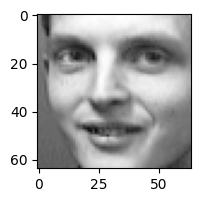

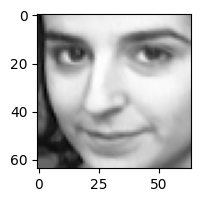

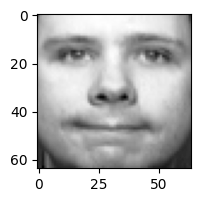

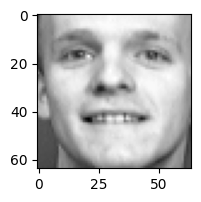

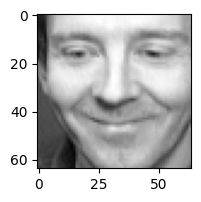

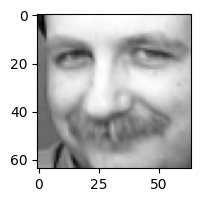

array([[0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752],
       [0.09917355, 0.0661157 , 0.32231405, ..., 0.5       , 0.5289256 ,
        0.553719  ],
       [0.4090909 , 0.59090906, 0.6570248 , ..., 0.2520661 , 0.2768595 ,
        0.28512397],
       [0.3264463 , 0.46280992, 0.553719  , ..., 0.3305785 , 0.35950413,
        0.36363637],
       [0.17355372, 0.16115703, 0.16115703, ..., 0.49173555, 0.43801653,
        0.34710744],
       [0.19008264, 0.19421488, 0.11157025, ..., 0.38016528, 0.338843  ,
        0.33471075]], dtype=float32)

In [423]:
show_worst(model_clustered_net, X_val, y_val, 6, from_logits=True)

2/2 [==============================] - 0s 2ms/step
Epoch 1/200
2/2 [==============================] - 4s 1s/step - loss: 3.8531 - sparse_categorical_accuracy: 0.0500 - val_loss: 3.7020 - val_sparse_categorical_accuracy: 0.0250
Epoch 2/200
2/2 [==============================] - 2s 645ms/step - loss: 2.2801 - sparse_categorical_accuracy: 0.4929 - val_loss: 3.8005 - val_sparse_categorical_accuracy: 0.0500
Epoch 3/200
2/2 [==============================] - 2s 613ms/step - loss: 2.0162 - sparse_categorical_accuracy: 0.6214 - val_loss: 3.7516 - val_sparse_categorical_accuracy: 0.0250
Epoch 4/200
2/2 [==============================] - 2s 637ms/step - loss: 1.8175 - sparse_categorical_accuracy: 0.7393 - val_loss: 3.7351 - val_sparse_categorical_accuracy: 0.0250
Epoch 5/200
2/2 [==============================] - 2s 635ms/step - loss: 1.7046 - sparse_categorical_accuracy: 0.7571 - val_loss: 3.8956 - val_sparse_categorical_accuracy: 0.0250
Epoch 6/200
2/2 [==============================] - 2s 633

2/2 [==============================] - 2s 635ms/step - loss: 0.1691 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.1700 - val_sparse_categorical_accuracy: 0.1750
Epoch 47/200
2/2 [==============================] - 2s 614ms/step - loss: 0.1655 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.1557 - val_sparse_categorical_accuracy: 0.1750
Epoch 48/200
2/2 [==============================] - 2s 737ms/step - loss: 0.1611 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.1463 - val_sparse_categorical_accuracy: 0.1750
Epoch 49/200
2/2 [==============================] - 2s 747ms/step - loss: 0.1750 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.1258 - val_sparse_categorical_accuracy: 0.1750
Epoch 50/200
2/2 [==============================] - 2s 613ms/step - loss: 0.1609 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.1323 - val_sparse_categorical_accuracy: 0.1500
Epoch 51/200
2/2 [==============================] - 2s 737ms/step - loss: 0.1545 - sparse_categorical_accuracy: 1

2/2 [==============================] - 2s 721ms/step - loss: 0.0556 - sparse_categorical_accuracy: 1.0000 - val_loss: 2.2045 - val_sparse_categorical_accuracy: 0.5500
Epoch 92/200
2/2 [==============================] - 2s 742ms/step - loss: 0.0536 - sparse_categorical_accuracy: 1.0000 - val_loss: 2.1960 - val_sparse_categorical_accuracy: 0.5250
Epoch 93/200
2/2 [==============================] - 2s 727ms/step - loss: 0.0522 - sparse_categorical_accuracy: 1.0000 - val_loss: 2.1683 - val_sparse_categorical_accuracy: 0.5500
Epoch 94/200
2/2 [==============================] - 2s 617ms/step - loss: 0.0525 - sparse_categorical_accuracy: 1.0000 - val_loss: 2.1706 - val_sparse_categorical_accuracy: 0.5750
Epoch 95/200
2/2 [==============================] - 2s 711ms/step - loss: 0.0500 - sparse_categorical_accuracy: 1.0000 - val_loss: 2.1273 - val_sparse_categorical_accuracy: 0.5750
Epoch 96/200
2/2 [==============================] - 2s 721ms/step - loss: 0.0480 - sparse_categorical_accuracy: 1

2/2 [==============================] - 2s 713ms/step - loss: 0.0239 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.0688 - val_sparse_categorical_accuracy: 0.8000
Epoch 137/200
2/2 [==============================] - 2s 724ms/step - loss: 0.0246 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.0498 - val_sparse_categorical_accuracy: 0.8000
Epoch 138/200
2/2 [==============================] - 2s 729ms/step - loss: 0.0245 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.0224 - val_sparse_categorical_accuracy: 0.8000
Epoch 139/200
2/2 [==============================] - 2s 718ms/step - loss: 0.0242 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.0085 - val_sparse_categorical_accuracy: 0.8000
Epoch 140/200
2/2 [==============================] - 2s 707ms/step - loss: 0.0250 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.9909 - val_sparse_categorical_accuracy: 0.8000
Epoch 141/200
2/2 [==============================] - 2s 711ms/step - loss: 0.0241 - sparse_categorical_accura

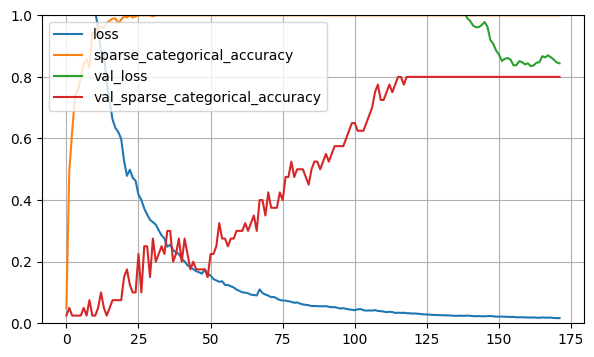

In [414]:
from keras import layers
from keras.layers import Multiply
from keras.optimizers import Nadam

def super_noisify_activation(x, omega=9999):
    K1 = noisify_activation(x)
    K2 = noisify_activation(tf.math.tanh(math.pi * x / 2.25))
    K3 = (tf.math.sqrt(tf.math.square(K1) + tf.math.square(K2)) / tf.math.exp(1.0 / (x - 9999))) - (math.e / 10.0)
    
    return (K1 + K2 + K3) / 3

# model with clusters + preprocessing
def model_with_clusters(n_clusters: int, encoder_dim=AUTOENCODER_ENCODING_DIM):
    cluster_input_layer = Input(shape=(encoder_dim,))
    
    branch = Dense(n_clusters, kernel_initializer="glorot_uniform", use_bias=False)(cluster_input_layer)
    branch = BatchNormalization()(branch)
    branch = Activation("sigmoid")(branch)
    
    branch = Dense(IMG_PX*IMG_PX, kernel_initializer="he_uniform", use_bias=False)(branch)
    branch = BatchNormalization()(branch)
    branch = Activation("relu")(branch)
    
    branch_future = Dense(IMG_PX // 2.25, kernel_initializer="glorot_uniform", use_bias=False)(branch)
    branch_future = BatchNormalization()(branch_future)
    branch_future = Activation("sigmoid")(branch_future)
    
    input_data_layer = Input(shape=(IMG_PX*IMG_PX,))
    standardized_data = BatchNormalization()(input_data_layer)
    
    hl0 = Dense((IMG_PX*IMG_PX), kernel_initializer="he_uniform", use_bias=False, activation="linear")(standardized_data)
    hl0 = BatchNormalization()(hl0)
    
    # Integrate branch
    hl = Dense((IMG_PX*IMG_PX), kernel_initializer="he_uniform", use_bias=False)(layers.concatenate([hl0, branch]))
    hl = BatchNormalization()(hl)
    hl = AlphaDropout(0.2)(hl)
    hl = Activation("relu")(hl)
    
    hl2D = Reshape((IMG_PX, IMG_PX, 1))(hl)
    
    hl2D = SeparableConv2D(filters=8, kernel_size=(2, 2), strides=(1, 1), depthwise_initializer="glorot_normal", use_bias=False)(hl2D)
    hl2D = BatchNormalization()(hl2D)
    hl2D = AlphaDropout(0.2)(hl2D)
    hl2D = Activation("tanh")(hl2D)
    
    hl2D = SeparableConv2D(filters=16, kernel_size=(2, 2), strides=(1, 1), depthwise_initializer="he_normal", use_bias=False)(hl2D)
    hl2D = BatchNormalization()(hl2D)
    hl2D = Activation("relu")(hl2D)
    
    hl1D = Flatten()(hl2D)
    
    hl1D = Dense(IMG_PX // 2.25, kernel_initializer="he_uniform")(hl1D)
    hl1D = BatchNormalization()(hl1D)
    
    hl1D_gate = Multiply()([hl1D, branch_future])

    hl1D_act = Activation(noisify_activation)(layers.concatenate([hl1D_gate, hl1D]))
    
    output_layer = Dense(NUM_CLASSES, activation="linear", kernel_initializer="glorot_uniform")(hl1D_act)
    
    model_with_clusters_ = keras.Model(inputs=[input_data_layer, cluster_input_layer], outputs=[output_layer])
    
    model_with_clusters_.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer=Nadam(learning_rate=0.001),
                                 metrics=[SparseCategoricalAccuracy()])
    
    return model_with_clusters_

class UnionClusterEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, cluster_encoder):
        super().__init__()
        self.cluster_encoder = cluster_encoder
    
    def fit(self, X, y=None):
        self.cluster_encoder.fit(X)
        return self
    
    def transform(self, X):
        encoded_clusters = self.cluster_encoder.transform(X)
        
        return [X, encoded_clusters]
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)
    
class ClusteredNeuralNetwork(BaseEstimator, TransformerMixin):
    def __init__(self, preprocessor, model):
        super().__init__()
        self.preprocessor = preprocessor
        self.model = model
    
    def fit(self, X, y=None, batch_size=32, epochs=1, callbacks=[], validation_data=None):
        X_transformed = self.transform(X)
        
        if validation_data is not None:
            X_valid = validation_data[0]
            y_valid = validation_data[1]
            
            X_valid = self.transform(X_valid)
            validation_data = (X_valid, y_valid)
        
        return self.model.fit(X_transformed, y, batch_size=batch_size, epochs=epochs, callbacks=callbacks, validation_data=validation_data)
    
    def transform(self, X):
        return self.preprocessor.transform(X)
    
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)
    
    def predict(self, X):
        inputs = self.transform(X)
        
        return self.model.predict(inputs)
    
    def fit_predict(self, X, y=None, batch_size=32, epochs=1, callbacks=[], validagtion_data=None):
        self.fit(X, y, batch_size, epochs, callbacks, validation_data)
        return self.predict(X)

union_cluster_preprocessor = UnionClusterEncoder(cluster_encoding_preprocessor)

model_with_clusters_ = model_with_clusters(n_clusters=50)

model_clustered_net = ClusteredNeuralNetwork(union_cluster_preprocessor, model_with_clusters_)
clustered_history = model_clustered_net.fit(X_train, y_train, batch_size=256, epochs=200, 
                                            validation_data=(X_val, y_val),
                                            callbacks=[EarlyStopping(patience=10, restore_best_weights=True)])
# Plot history
pd.DataFrame(clustered_history.history).plot(figsize=(7, 4))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

2/2 [==============================] - 0s 1ms/step
Epoch 1/50
3/3 [==============================] - 3s 475ms/step - loss: 0.0015 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.1483 - val_sparse_categorical_accuracy: 0.8000
Epoch 2/50
3/3 [==============================] - 1s 322ms/step - loss: 0.0014 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.1631 - val_sparse_categorical_accuracy: 0.8000
Epoch 3/50
3/3 [==============================] - 1s 316ms/step - loss: 0.0013 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.1781 - val_sparse_categorical_accuracy: 0.8000
Epoch 4/50
3/3 [==============================] - 1s 309ms/step - loss: 0.0012 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.1995 - val_sparse_categorical_accuracy: 0.8000
Epoch 5/50
3/3 [==============================] - 1s 314ms/step - loss: 0.0013 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.2290 - val_sparse_categorical_accuracy: 0.8000
Epoch 6/50
3/3 [==============================] - 1s 302ms/

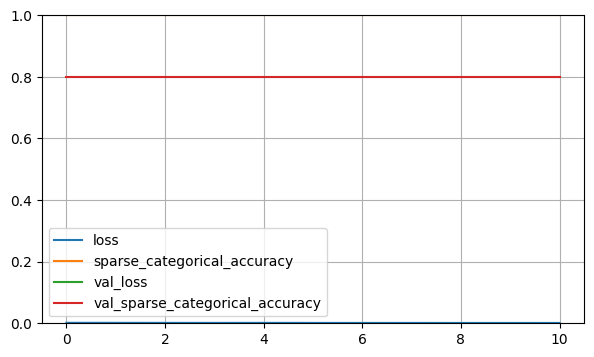

In [412]:
from keras.optimizers import Adamax, SGD

# Recompile
model_clustered_net.model.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer=Adam(learning_rate=0.001), metrics=[SparseCategoricalAccuracy()])

clustered_history = model_clustered_net.fit(X_train, y_train, batch_size=128, epochs=50, 
                                            validation_data=(X_val, y_val),
                                            callbacks=[EarlyStopping(patience=10, restore_best_weights=True)])
# Plot history
pd.DataFrame(clustered_history.history).plot(figsize=(7, 4))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

2/2 [==============================] - 0s 1ms/step
Epoch 1/30
2/2 [==============================] - 2s 815ms/step - loss: 0.0015 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.1436 - val_sparse_categorical_accuracy: 0.8000
Epoch 2/30
2/2 [==============================] - 2s 768ms/step - loss: 0.0016 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.1372 - val_sparse_categorical_accuracy: 0.8000
Epoch 3/30
2/2 [==============================] - 2s 690ms/step - loss: 0.0014 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.1417 - val_sparse_categorical_accuracy: 0.8000
Epoch 4/30
2/2 [==============================] - 2s 664ms/step - loss: 0.0015 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.1525 - val_sparse_categorical_accuracy: 0.8000
Epoch 5/30
2/2 [==============================] - 2s 674ms/step - loss: 0.0013 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.1561 - val_sparse_categorical_accuracy: 0.8000
Epoch 6/30
2/2 [==============================] - 2s 635ms/

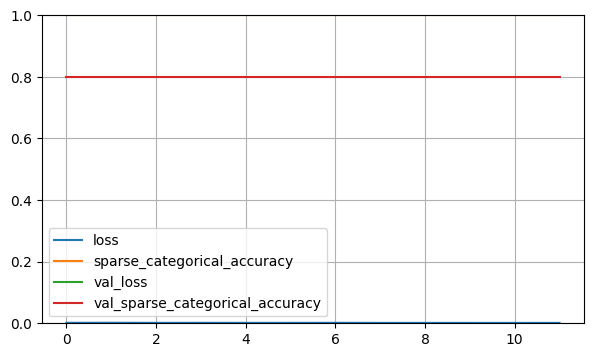

In [411]:
clustered_history = model_clustered_net.fit(X_train, y_train, batch_size=256, epochs=30, 
                                            validation_data=(X_val, y_val),
                                            callbacks=[EarlyStopping(patience=10, restore_best_weights=True)])
# Plot history
pd.DataFrame(clustered_history.history).plot(figsize=(7, 4))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [424]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=0.95)

X_train_dr = pca.fit_transform(X_train)

print(X_train.shape)
print(X_train_dr.shape)

(280, 4096)
(280, 104)


In [426]:
len(pca.components_)

104

In [427]:
pca.explained_variance_

array([18.718868  , 11.518155  ,  6.299174  ,  3.9151003 ,  3.0385427 ,
        2.4928794 ,  2.0196307 ,  1.6575242 ,  1.5222886 ,  1.368003  ,
        1.2615345 ,  1.1779437 ,  1.0179968 ,  0.9296884 ,  0.86882436,
        0.78117913,  0.7064866 ,  0.65376306,  0.6224056 ,  0.57764083,
        0.5617425 ,  0.5157304 ,  0.4911579 ,  0.46349588,  0.45563164,
        0.42288324,  0.41142634,  0.38442564,  0.35928997,  0.34543377,
        0.31653014,  0.31175292,  0.2930083 ,  0.27951303,  0.2683266 ,
        0.2575151 ,  0.2497493 ,  0.23298451,  0.22741087,  0.22669296,
        0.21718235,  0.21194936,  0.19990763,  0.19899537,  0.19023089,
        0.1875722 ,  0.17951372,  0.1686612 ,  0.16538619,  0.16428971,
        0.15769699,  0.15701239,  0.15324605,  0.15060346,  0.14259072,
        0.14000377,  0.13662443,  0.13169865,  0.13108961,  0.12990583,
        0.12907565,  0.12338931,  0.12215053,  0.11826097,  0.11768169,
        0.1145756 ,  0.11211275,  0.10881587,  0.10613944,  0.10

In [428]:
pca.explained_variance_ratio_

array([0.23592602, 0.14517076, 0.07939257, 0.04934455, 0.03829672,
       0.03141937, 0.02545471, 0.02089085, 0.01918639, 0.01724183,
       0.01589994, 0.01484639, 0.01283047, 0.01171746, 0.01095036,
       0.00984571, 0.00890431, 0.0082398 , 0.00784458, 0.00728038,
       0.00708   , 0.00650008, 0.00619038, 0.00584174, 0.00574262,
       0.00532987, 0.00518547, 0.00484517, 0.00452836, 0.00435373,
       0.00398943, 0.00392922, 0.00369297, 0.00352288, 0.00338189,
       0.00324563, 0.00314775, 0.00293645, 0.00286621, 0.00285716,
       0.00273729, 0.00267134, 0.00251957, 0.00250807, 0.0023976 ,
       0.00236409, 0.00226253, 0.00212575, 0.00208447, 0.00207065,
       0.00198756, 0.00197893, 0.00193146, 0.00189815, 0.00179716,
       0.00176456, 0.00172197, 0.00165988, 0.00165221, 0.00163729,
       0.00162682, 0.00155516, 0.00153954, 0.00149052, 0.00148322,
       0.00144407, 0.00141303, 0.00137148, 0.00133774, 0.00132058,
       0.00130432, 0.00129094, 0.00126029, 0.00124065, 0.00123

In [429]:
sum(pca.explained_variance_ratio_)

0.9501003106706776

In [443]:
pca = PCA(n_components=0.99)
X_train_dr = pca.fit_transform(X_train)

#plotrandom(3, 3, X_train_dr)
X_train_dr.shape

(280, 200)

In [444]:
X_train.shape

(280, 4096)

In [447]:
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

populations = NUM_CLASSES
gaussian_mixture_model = GaussianMixture(n_components=populations, n_init=3)

gaussian_mixture_model.fit(X_train)

ValueError: shapes (9,4096) and (200,4096) not aligned: 4096 (dim 1) != 200 (dim 0)

In [484]:
(X_new_dr, y_new_dr) = gaussian_mixture_model.sample(200)

X_new = pca.inverse_transform(X_new_dr)
plotrandom(X_1D=X_new, cols=3, rows=3)

ValueError: shapes (200,4096) and (200,4096) not aligned: 4096 (dim 1) != 200 (dim 0)

In [ ]:
plt.imshow(X_new[15].reshape(IMG_PX, IMG_PX), cmap="gray")

In [450]:
# Linear Algebra 2D Linear Transformations
def identity_matrix():
    return np.array([[1, 0],
                     [0, 1]])

def rotation_matrix(theta):
    return np.array([[math.cos(theta), -math.sin(theta)],
                     [math.sin(theta), math.cos(theta)]])

def mirror_matrix_traditional(x=False, y=False):
    if x and y:
        return np.array([[0, 1],
                         [1, 0]])
    
    if x:
        return np.array([[1, 0],
                         [0, -1]])
    
    if y:
        return np.array([[-1, 0],
                         [0, 1]])
    
    return np.array([[1, 0],
                     [0, 1]])

In [490]:
scores_new = gaussian_mixture_model.score_samples(X_new_dr)
scores_new

array([22354.66330904, 22349.32513263, 22482.0587084 , 22358.04003105,
       22368.60367924, 22333.95340544, 22344.08513904, 22358.30007926,
       22406.2711386 , 22332.03489464, 22464.06510837, 22451.59624579,
       22384.25563915, 22444.49235625, 22425.91196314, 22356.81733593,
       22422.90623053, 22344.77088643, 22498.95501584, 22477.95331385,
       22429.37971648, 22433.99409399, 22432.42382191, 22443.82137903,
       22453.97757481, 22474.79519458, 22372.91064891, 22376.79782188,
       22404.28365851, 22424.87589257, 22401.29286288, 22407.05590002,
       22361.32729272, 22470.33313653, 22499.62153811, 22436.83964593,
       22415.25183421, 22465.77922943, 22438.437837  , 22405.43350551,
       22408.00957624, 22345.34408967, 22363.52997176, 22360.95570142,
       22366.9166821 , 22310.65950821, 22342.94998031, 22374.23404312,
       22538.08266862, 22395.5122839 , 22470.21900151, 22521.85724939,
       22422.37840933, 22463.77608821, 22511.53912419, 22439.36885134,
      

In [ ]:
X_new.shape

In [ ]:
def mess_up_dataset(X):
    (m, n) = X.shape
    X_2D = X.reshape(m, IMG_PX, IMG_PX)
    
    def transform(x):
        CHOICES = 3
        
        ROTATE = 1
        MIRROR = 2
        NOISE = 3
        
        rnd = int(np.random.rand() * CHOICES)
        
        if rnd == ROTATE:
            max_rotations = 4  # 90 degree rotations
            num_rotations = np.random.rand() * max_rotations
            
            return np.rot90(x, k=num_rotations)
        elif rnd == MIRROR:
            threshold = 0.5
            (flip_x, flip_y) = (np.random.rand() > threshold, np.random.rand() > threshold)
            
            x_transformed = x.copy()
            
            if flip_x:
                x_transformed = np.fliplr(x_transformed)
            
            if flip_y:
                x_transformed = np.flipud(x_transformed)
            
            return x_transformed
        elif rnd == NOISE:
            extent = np.random.rand()
            
            return np.clip(x + (np.random.randn(IMG_PX, IMG_PX) * extent), 0.0, 1.0)
        
        return x
    
    # put it all together
    messed_up_dataset = np.array([transform(X_2D[i]) for i in range(m)])
    
    # get it back to 1D
    return messed_up_dataset.reshape(m, -1)

X_messed_up = mess_up_dataset(X_new)
X_messed_up.shape

In [ ]:
plotrandom(X_1D=X_messed_up, rows=3, cols=3)

In [488]:
scores_new_messed_up = gaussian_mixture_model.score_samples(X_messed_up)
scores_new_messed_up

array([-22804054.16525537, -50493658.40883074, -54816133.95002487, ...,
       -16646447.90635683, -15218980.88733259, -15292618.17072659])

In [489]:
# A: Oh shit! these scores are ass!!!
# B: Well of course they are genius!!! We just screwed the images up!
# A: Ok, now let's see the reconstruction error since we used dimensionality reduction
print(X_new_dr.shape)
print(X_new.shape)

(200, 4096)
(4096, 4096)


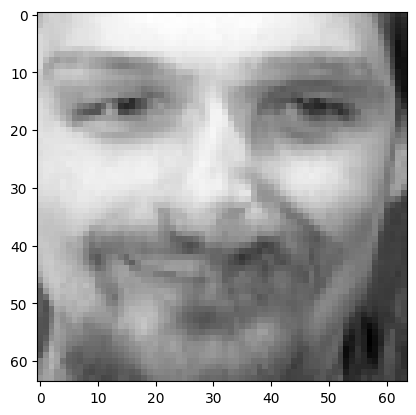

In [515]:
plt.imshow(X_new_dr[33].reshape(IMG_PX, IMG_PX), cmap="gray")

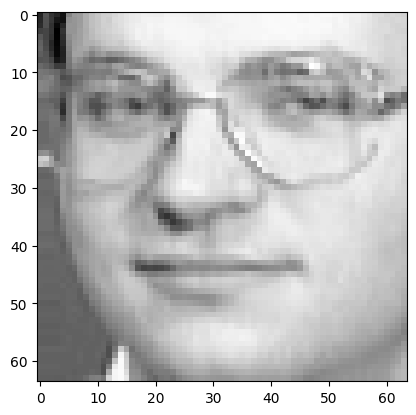

In [495]:
plt.imshow(X_train[38].reshape(IMG_PX, IMG_PX), cmap="gray")